In [1]:
import json

In [2]:
values2 = json.load(open("addons/imr90/coop_matrix.json","r"))
values1 = json.load(open("addons/imr90/coop_matrix_self.json","r"))


In [3]:
import numpy as np
def define_cooperative_net_pos_neg(motif1_only, motif2_only, cooop):
    
    total_sum_th = motif1_only + motif2_only
    total_sum_th1 = np.max([motif1_only,motif2_only])
    
    total_diff_th = np.abs(motif1_only - motif2_only)
    total_diff_th1 = np.max([motif1_only,motif2_only])
    
    pos_coop_score = (np.max(cooop) - total_sum_th)/total_sum_th
    pos_coop_score1 = (np.max(cooop) - total_sum_th1)/total_sum_th1

    neg_coop_score = (np.min(cooop) - total_diff_th)/total_diff_th
    neg_coop_score1 = (np.min(cooop) - total_diff_th1)/total_diff_th1
    
    nmax = total_sum_th
    nmin = total_sum_th1
    
    zscore = (np.max(cooop)-nmin)/(nmax-nmin)
    
    zscores = (cooop-nmin)/(nmax-nmin)
    return pos_coop_score, pos_coop_score1, neg_coop_score, neg_coop_score1, zscores, zscore

In [4]:
import pandas as pd
annotations = pd.read_csv("addons/imr90/imr90.counts.tomtom.motifs_string.tsv",header=0, sep="\t")


In [5]:
annotations.shape


(30, 24)

In [6]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

In [89]:
key="metacluster_0.pattern_0-metacluster_0.pattern_1"
coop_matrix=np.zeros((30,30,4))
coop_matrix_n=np.zeros((30,30))

z_data_rgb=my_array = np.full([30, 30], "white", dtype=np.object)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

#label=values[key][1]

row_names = []
rlables = {}
zscores = {}
for i in range(annotations.shape[0]-1):
    row_names.append(annotations.loc[i,"Label"])
    if annotations.loc[i,"Label"] not in zscores:
        zscores[annotations.loc[i,"Label"]] = []
        rlables[annotations.loc[i,"Label"]] = []
    for j in range(i,annotations.shape[0]):
        
        if i==j:
            values = values1
        else:
            values = values2
            
        label1 = annotations.loc[i,"Pattern"] + "-" + annotations.loc[j,"Pattern"]
        label2 = annotations.loc[i,"Label"] + "-" + annotations.loc[j,"Label"]

        scores = define_cooperative_net_pos_neg(values[label1][0][0][0], values[label1][0][1][0], np.array(values[label1][0][2])[np.array(values[label1][0][3])<0])

        #if row_names[-1] == "FOSB+JUNB":
        rlables[annotations.loc[i,"Label"]].append(annotations.loc[j,"Label"])
        zscores[annotations.loc[i,"Label"]].append(scores[-2].tolist()[::-1])
        if i !=j:
            if annotations.loc[j,"Label"] not in zscores:
                zscores[annotations.loc[j,"Label"]] = []
            if annotations.loc[j,"Label"] not in rlables:
                rlables[annotations.loc[j,"Label"]] = []
            rlables[annotations.loc[j,"Label"]].append(annotations.loc[i,"Label"])
            zscores[annotations.loc[j,"Label"]].append(scores[-2].tolist()[::-1])
            
            
        coop_matrix_n[j,i] = scores[-1]
#         if scores[0] > 0:
#             coop_matrix[i,j] = [255,0,0,scores[0]]
#         elif scores[1] > 0:
#             coop_matrix[i,j] = [255,204,203,scores[0]]
#         elif scores[1] < 0:
#             coop_matrix[i,j] = [0,0,255,abs(scores[0])]
#         else:
#             print("NA")            
#         if scores[1] > 0:
#             coop_matrix_n[i,j] = scores[0]

#             if scores[0] > 0:
#                  coop_matrix[i,j] = [0,255,0,scores[0]]
#             else:
#                  coop_matrix[i,j] = [255,0,0,scores[1]]

            
#         if scores[3] < 0:
#             coop_matrix_n[i,j] = scores[0]

#             if scores[2] < 0:
#                 coop_matrix[i,j] = [0,0,255,np.abs(scores[2])]
#             else:
#                 coop_matrix[i,j] = [0,100,100,np.abs(scores[3])]
            
#         if (scores[1] > 0) and (scores[3] <0) :
            
#             if np.abs(scores[3]) > scores[1]:
#                 coop_matrix_n[i,j] = scores[0]

#                 if scores[2] < 0:
#                     coop_matrix[i,j] = [0,0,255,np.abs(scores[2])]
#                 else:
#                     coop_matrix[i,j] = [0,100,100,np.abs(scores[3])]
#             else:
                
#                 coop_matrix_n[i,j] = scores[0]

#                 if scores[0] > 0:
#                      coop_matrix[i,j] = [0,255,0,scores[0]]
#                 else:
#                      coop_matrix[i,j] = [255,0,0,scores[1]]

 
            
        scores = define_cooperative_net_pos_neg(values[label1][0][0][0], values[label1][0][1][0], np.array(values[label1][0][2])[np.array(values[label1][0][3])>0])
        #if row_names[-1] == "FOSB+JUNB":
        zscores[annotations.loc[i,"Label"]][-1].extend(scores[-2].tolist())
        coop_matrix_n[i,j] = scores[-1]
        if i !=j:
            zscores[annotations.loc[j,"Label"]][-1].extend(scores[-2].tolist())
  
#         coop_matrix_n[j,i] = scores[1]
#         if scores[0] > 0:
#             coop_matrix[j,i] = [255,0,0,scores[0]]
#         elif scores[1] > 0:
#             coop_matrix[j,i] = [255,204,203,scores[0]]
#         elif scores[1] < 0:
#             coop_matrix[j,i] = [0,0,255,abs(scores[0])]
#         else:
#             print("NA")
#  #         if scores[1] > 0:
#             coop_matrix_n[j,i] = scores[0]

#             if scores[0] > 0:
#                  coop_matrix[j,i] = [0,255,0,scores[0]]
#             else:
#                  coop_matrix[j,i] = [255,0,0,scores[1]]

#         if scores[3] < 0:
#             coop_matrix_n[j,i] = scores[0]

#             if scores[2] < 0:
#                 coop_matrix[j,i] = [0,0,255,np.abs(scores[2])]
#             else:
#                 coop_matrix[j,i] = [0,100,100,np.abs(scores[3])]
            
#         if (scores[1] > 0) and (scores[3] <0) :
            
#             if np.abs(scores[3]) > scores[1]:                
#                 coop_matrix_n[j,i] = scores[0]
 
#                 if scores[2] < 0:
#                     coop_matrix[j,i] = [0,0,255,np.abs(scores[2])]
#                 else:
#                     coop_matrix[j,i] = [0,100,100,np.abs(scores[3])]
#             else:
#                 coop_matrix_n[j,i] = scores[0]

#                 if scores[0] > 0:
#                      coop_matrix[j,i] = [0,255,0,scores[0]]
#                 else:
#                      coop_matrix[j,i] = [255,0,0,scores[1]]
  
 
            
row_names.append(annotations.loc[annotations.shape[0]-1,"Label"])

            


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


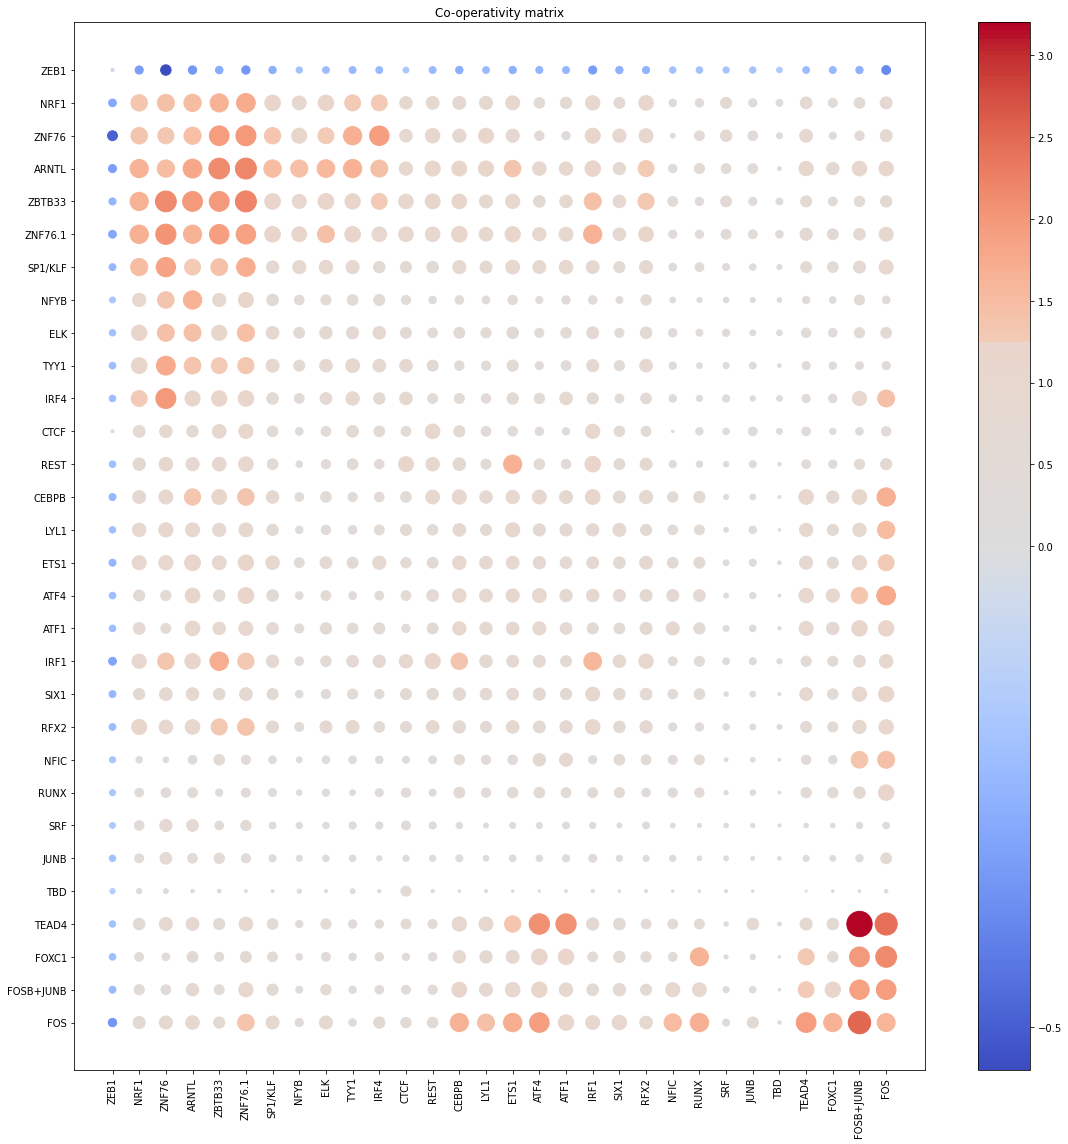

In [90]:
# define the colormap
#cmap = plt.get_cmap('PuOr')
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import BoundaryNorm
from matplotlib import colors
# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(16, 16))


norm = TwoSlopeNorm(vmin=coop_matrix_n.min(), vcenter=0, vmax=coop_matrix_n.max())
inds = cluster_matrix_indices(coop_matrix_n,10)


colors_undersea = plt.cm.coolwarm(np.linspace(0, 0.5, 256))
colors_land = plt.cm.coolwarm(np.append(np.linspace(0.5, 0.55, 100),np.linspace(0.6, 1, 256-100)))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)

#hmap = ax.imshow(coop_matrix_n[inds][:,inds], cmap=terrain_map, norm=norm)
#hmap = ax.imshow(coop_matrix[inds][:,inds,:])
#hmap = ax.imshow(coop_matrix)

# generate coordinates for the image. Note that the image is "top down", so the y coordinate goes from high to low.
ys, xs = np.mgrid[coop_matrix_n.shape[1]:0:-1,0:coop_matrix_n.shape[1]]

# Scatter plots take 1d arrays of xs and ys, and the colour takes a 2d array,
# with the second dimension being RGB
hmap = ax.scatter(xs.flatten(), ys.flatten(), s=np.abs(coop_matrix_n[inds][:,inds])*200,
            c=coop_matrix_n[inds][:,inds], cmap=terrain_map, norm=norm, edgecolor='face')

# plotting
#hmap = plt.imshow(ls.blend_hsv(z_data_rgb, coop_matrix[inds][:, inds]))


# Set axes on heatmap
ax.set_yticks(np.arange(1,len(row_names)+1))
ax.set_yticklabels(np.array(row_names)[inds][::-1])
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(np.array(row_names)[inds], rotation=90)

#Loop over data dimensions and create text annotations.
#for i in range(len(row_names)):
#    for j in range(len(row_names)):
#        if np.round(coop_matrix_n[inds][i, j],2) !=0 :
#            ax.text(j, i, np.round(coop_matrix_n[inds][i, j],2), ha="center", va="center")
fig.colorbar(hmap, orientation="vertical")

ax.set_title("Co-operativity matrix")
fig.tight_layout()
    
plt.savefig("subfigs/motif_cooperativiity_imr90_dotplot.pdf", dpi=300, transparent=True)

plt.show()

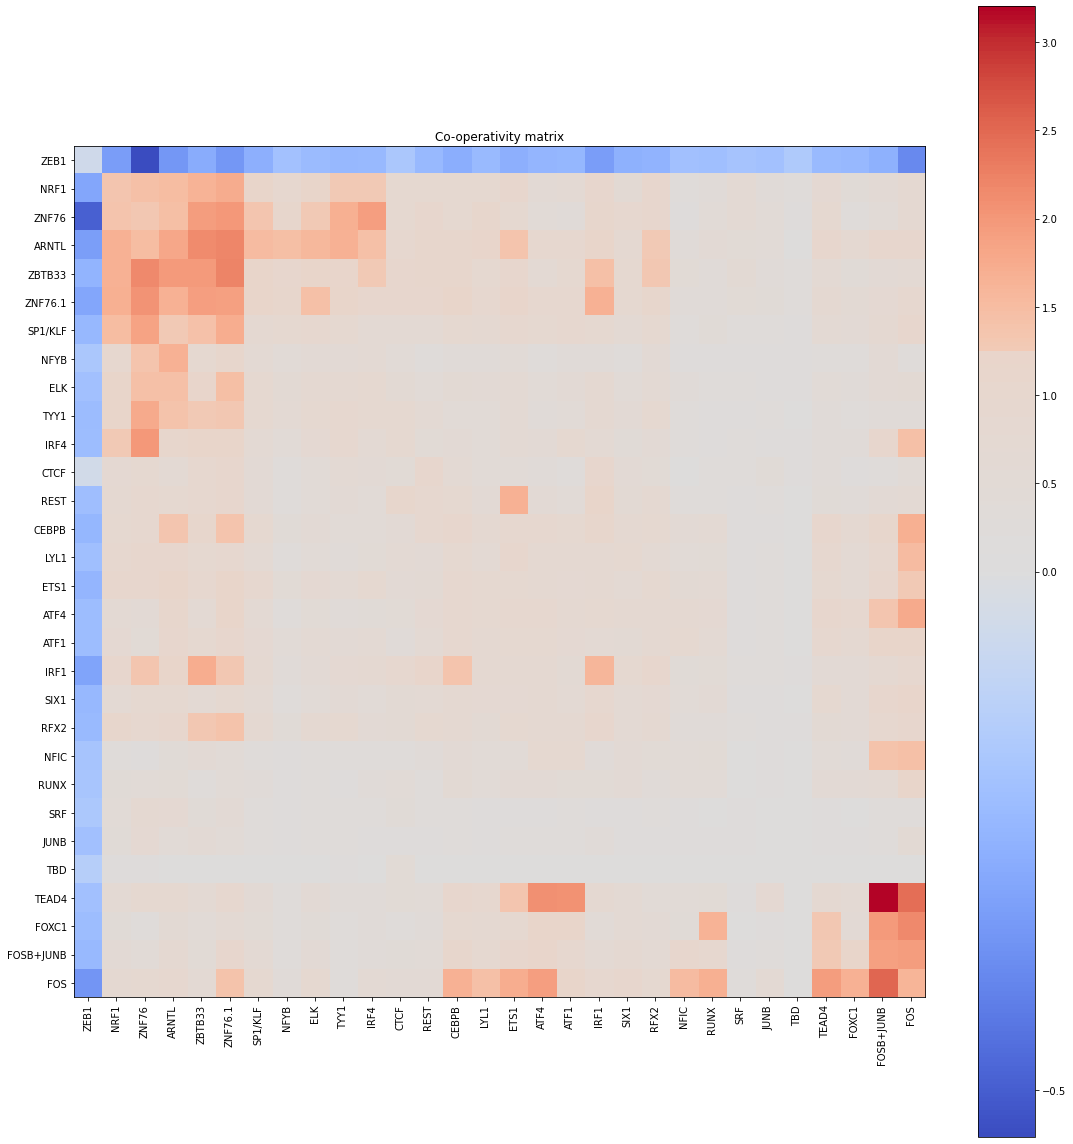

In [91]:

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import BoundaryNorm
from matplotlib import colors
# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(16, 16))


norm = TwoSlopeNorm(vmin=coop_matrix_n.min(), vcenter=0, vmax=coop_matrix_n.max())
#inds = cluster_matrix_indices(coop_matrix_n,10)


colors_undersea = plt.cm.coolwarm(np.linspace(0, 0.5, 256))
colors_land = plt.cm.coolwarm(np.append(np.linspace(0.5, 0.55, 100),np.linspace(0.6, 1, 256-100)))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)

hmap = ax.imshow(coop_matrix_n[inds][:,inds], cmap=terrain_map, norm=norm)
#hmap = ax.imshow(coop_matrix[inds][:,inds,:])
#hmap = ax.imshow(coop_matrix)

# generate coordinates for the image. Note that the image is "top down", so the y coordinate goes from high to low.
#ys, xs = np.mgrid[0:coop_matrix_n.shape[1], 0:coop_matrix_n.shape[1]]

# Scatter plots take 1d arrays of xs and ys, and the colour takes a 2d array,
# with the second dimension being RGB
#ax.scatter(xs.flatten(), ys.flatten(), s=np.abs(coop_matrix_n[inds][:,inds])*200,
#            c=coop_matrix_n[inds][:,inds], cmap=terrain_map, norm=norm, edgecolor='face')

# plotting
#hmap = plt.imshow(ls.blend_hsv(z_data_rgb, coop_matrix[inds][:, inds]))


# Set axes on heatmap
ax.set_yticks(np.arange(len(row_names)))
ax.set_yticklabels(np.array(row_names)[inds])
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(np.array(row_names)[inds], rotation=90)

#Loop over data dimensions and create text annotations.
#for i in range(len(row_names)):
#    for j in range(len(row_names)):
#        if np.round(coop_matrix_n[inds][i, j],2) !=0 :
#            ax.text(j, i, np.round(coop_matrix_n[inds][i, j],2), ha="center", va="center")
plt.colorbar(hmap,orientation="vertical")

ax.set_title("Co-operativity matrix")
fig.tight_layout()
    
plt.savefig("subfigs/motif_cooperativiity_imr90.pdf", dpi=300, transparent=True)

plt.show()

In [92]:
np.array(zscores).shape

distance = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-20,-40,-50,-60,-70,-80,-90,-100,-110,-120,-130,-140,-150]

distance = distance[::-1]+[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,40,50,60,70,80,90,100,110,120,130,140,150]

In [93]:
len(distance)

56

In [94]:
for key in zscores:
    print(np.array(zscores[key]).shape)

(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(30, 56, 1)
(29, 56, 1)


FOS


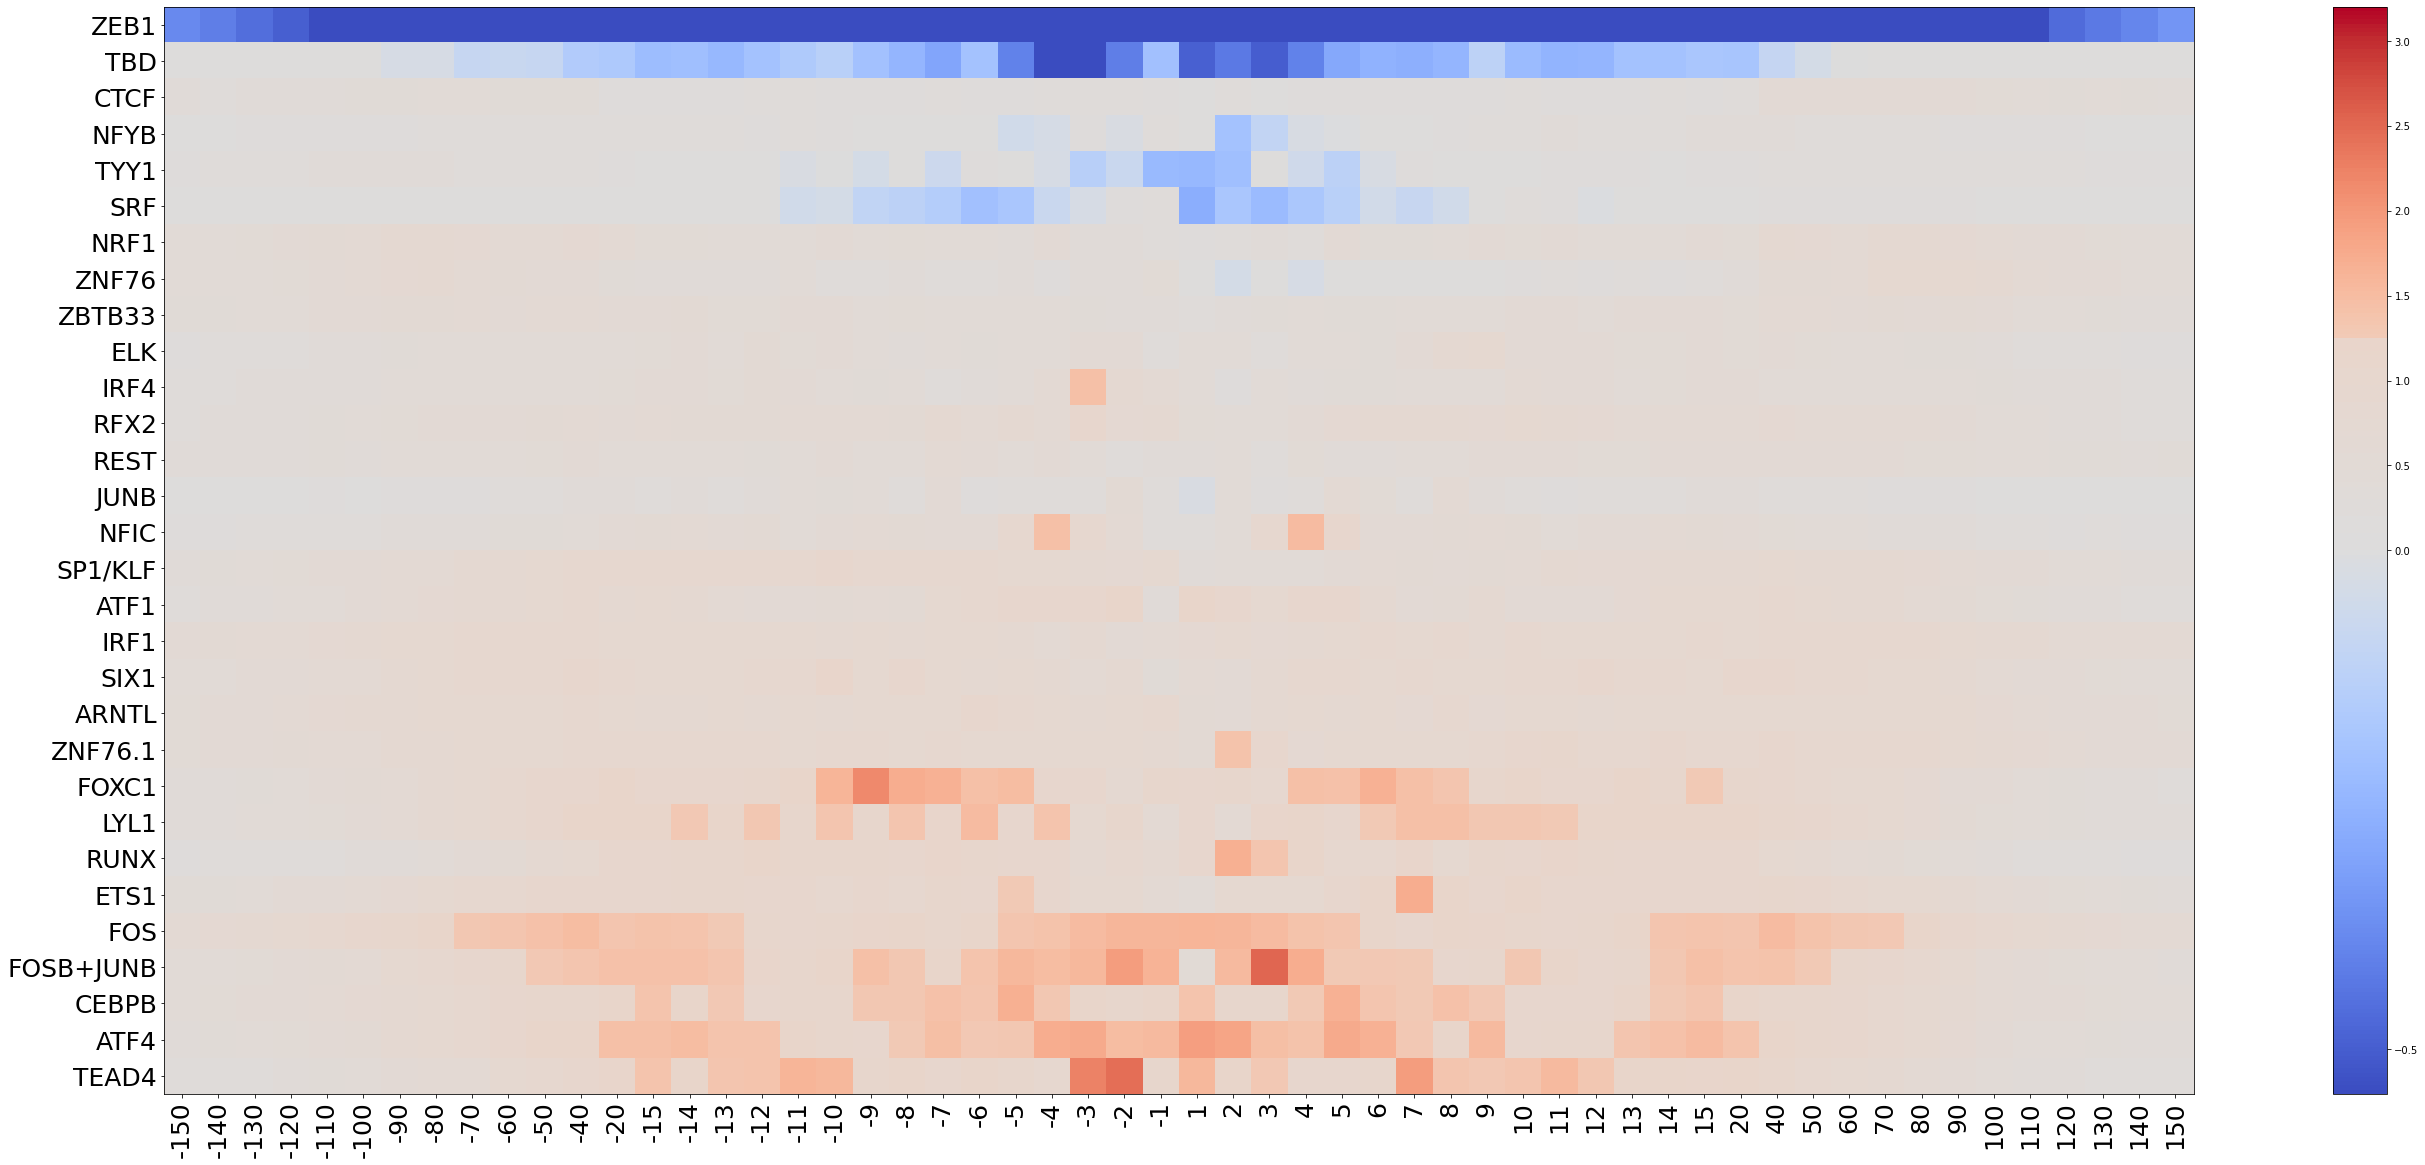

CTCF


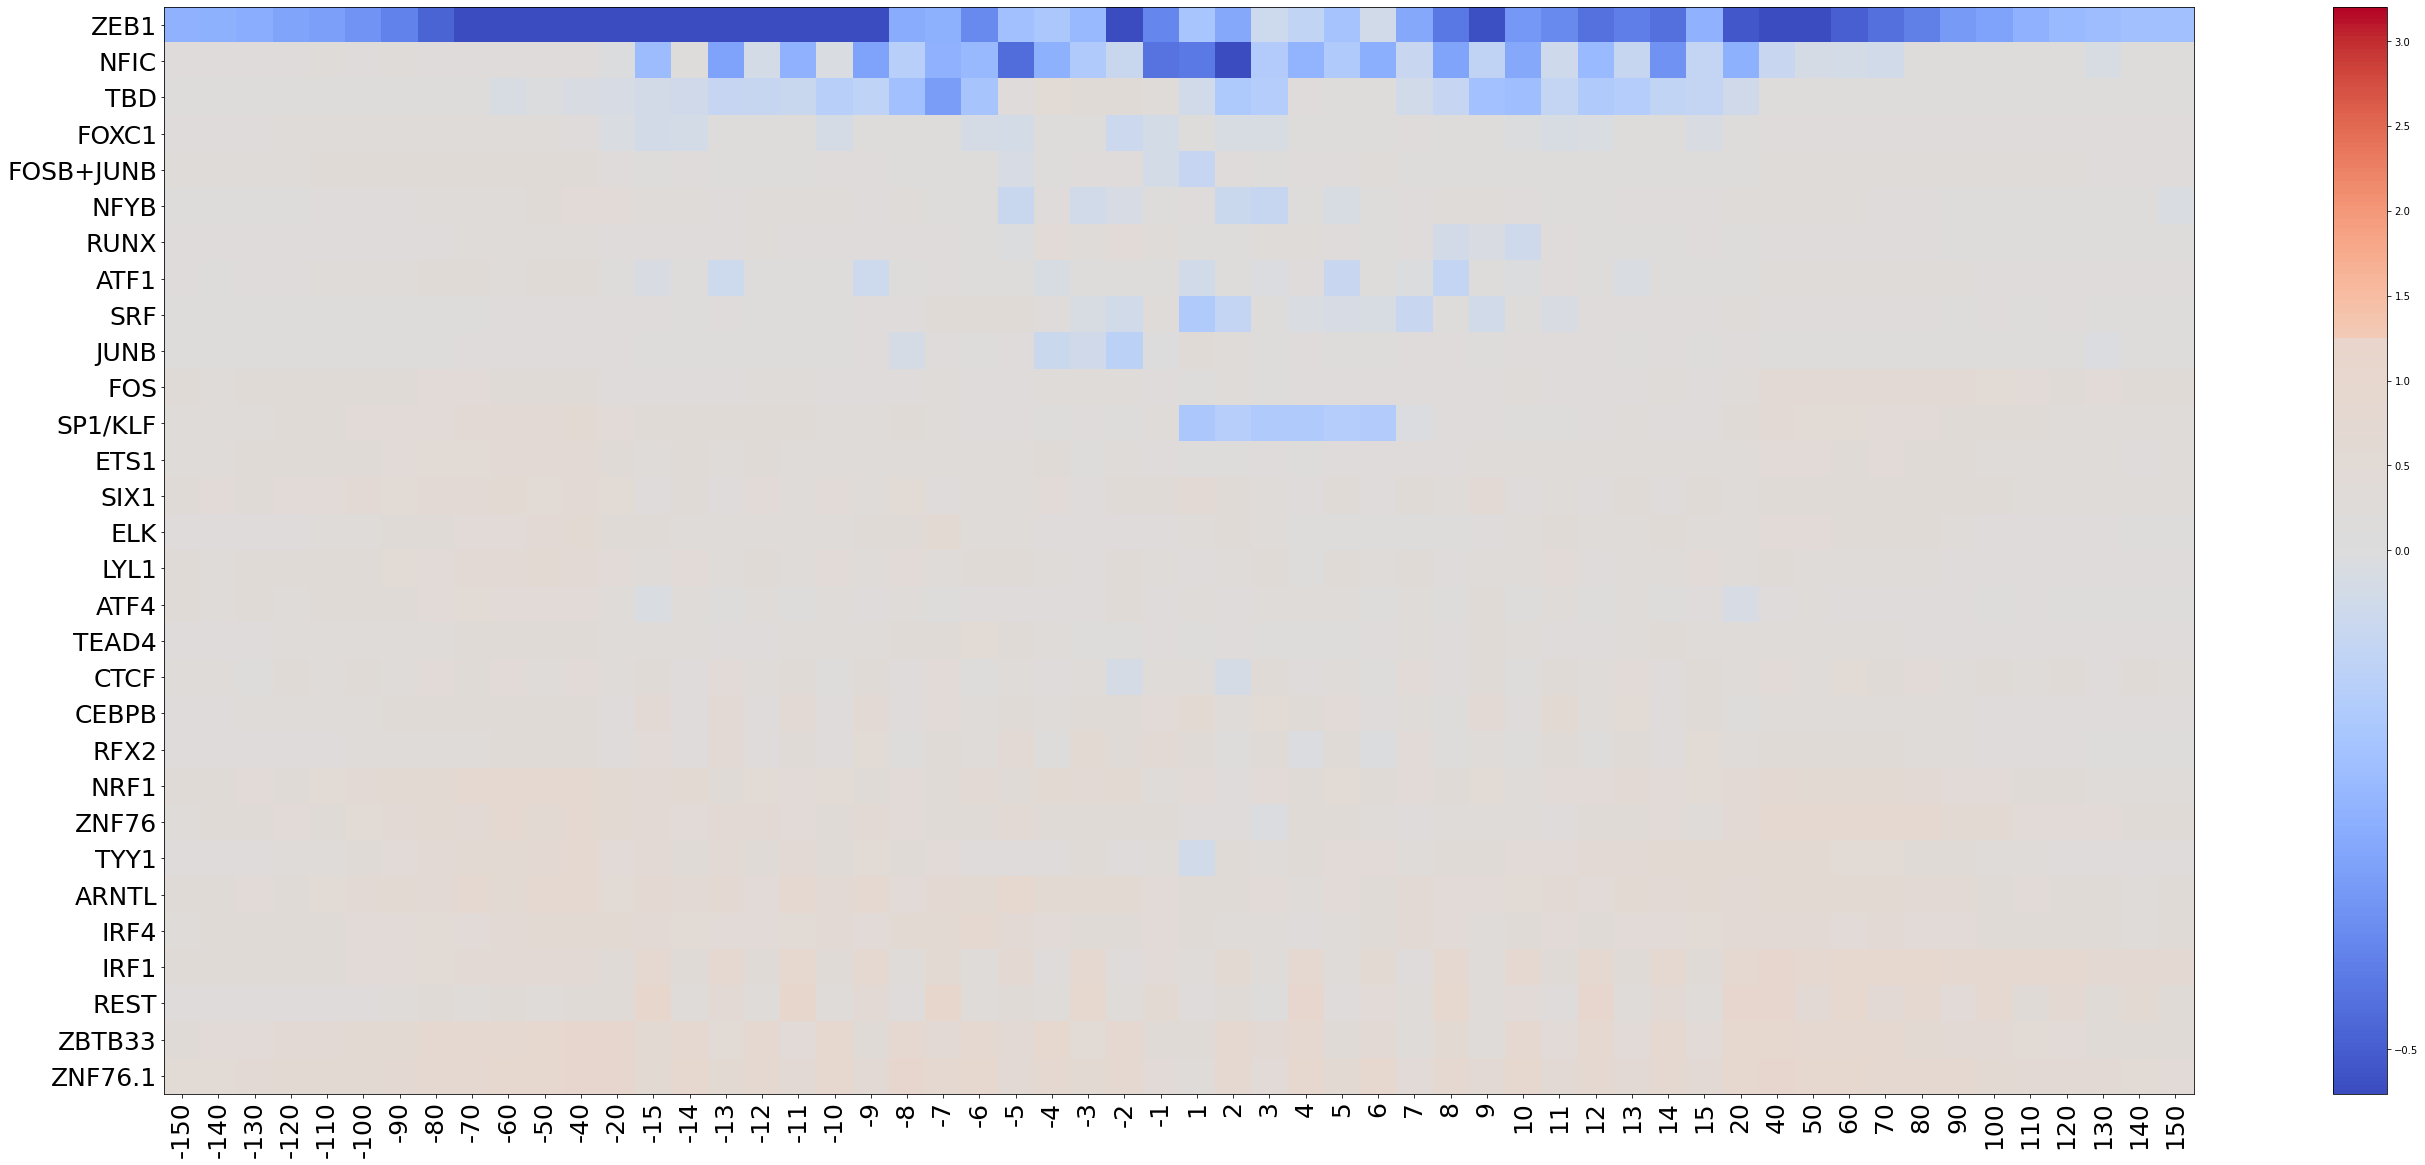

FOXC1


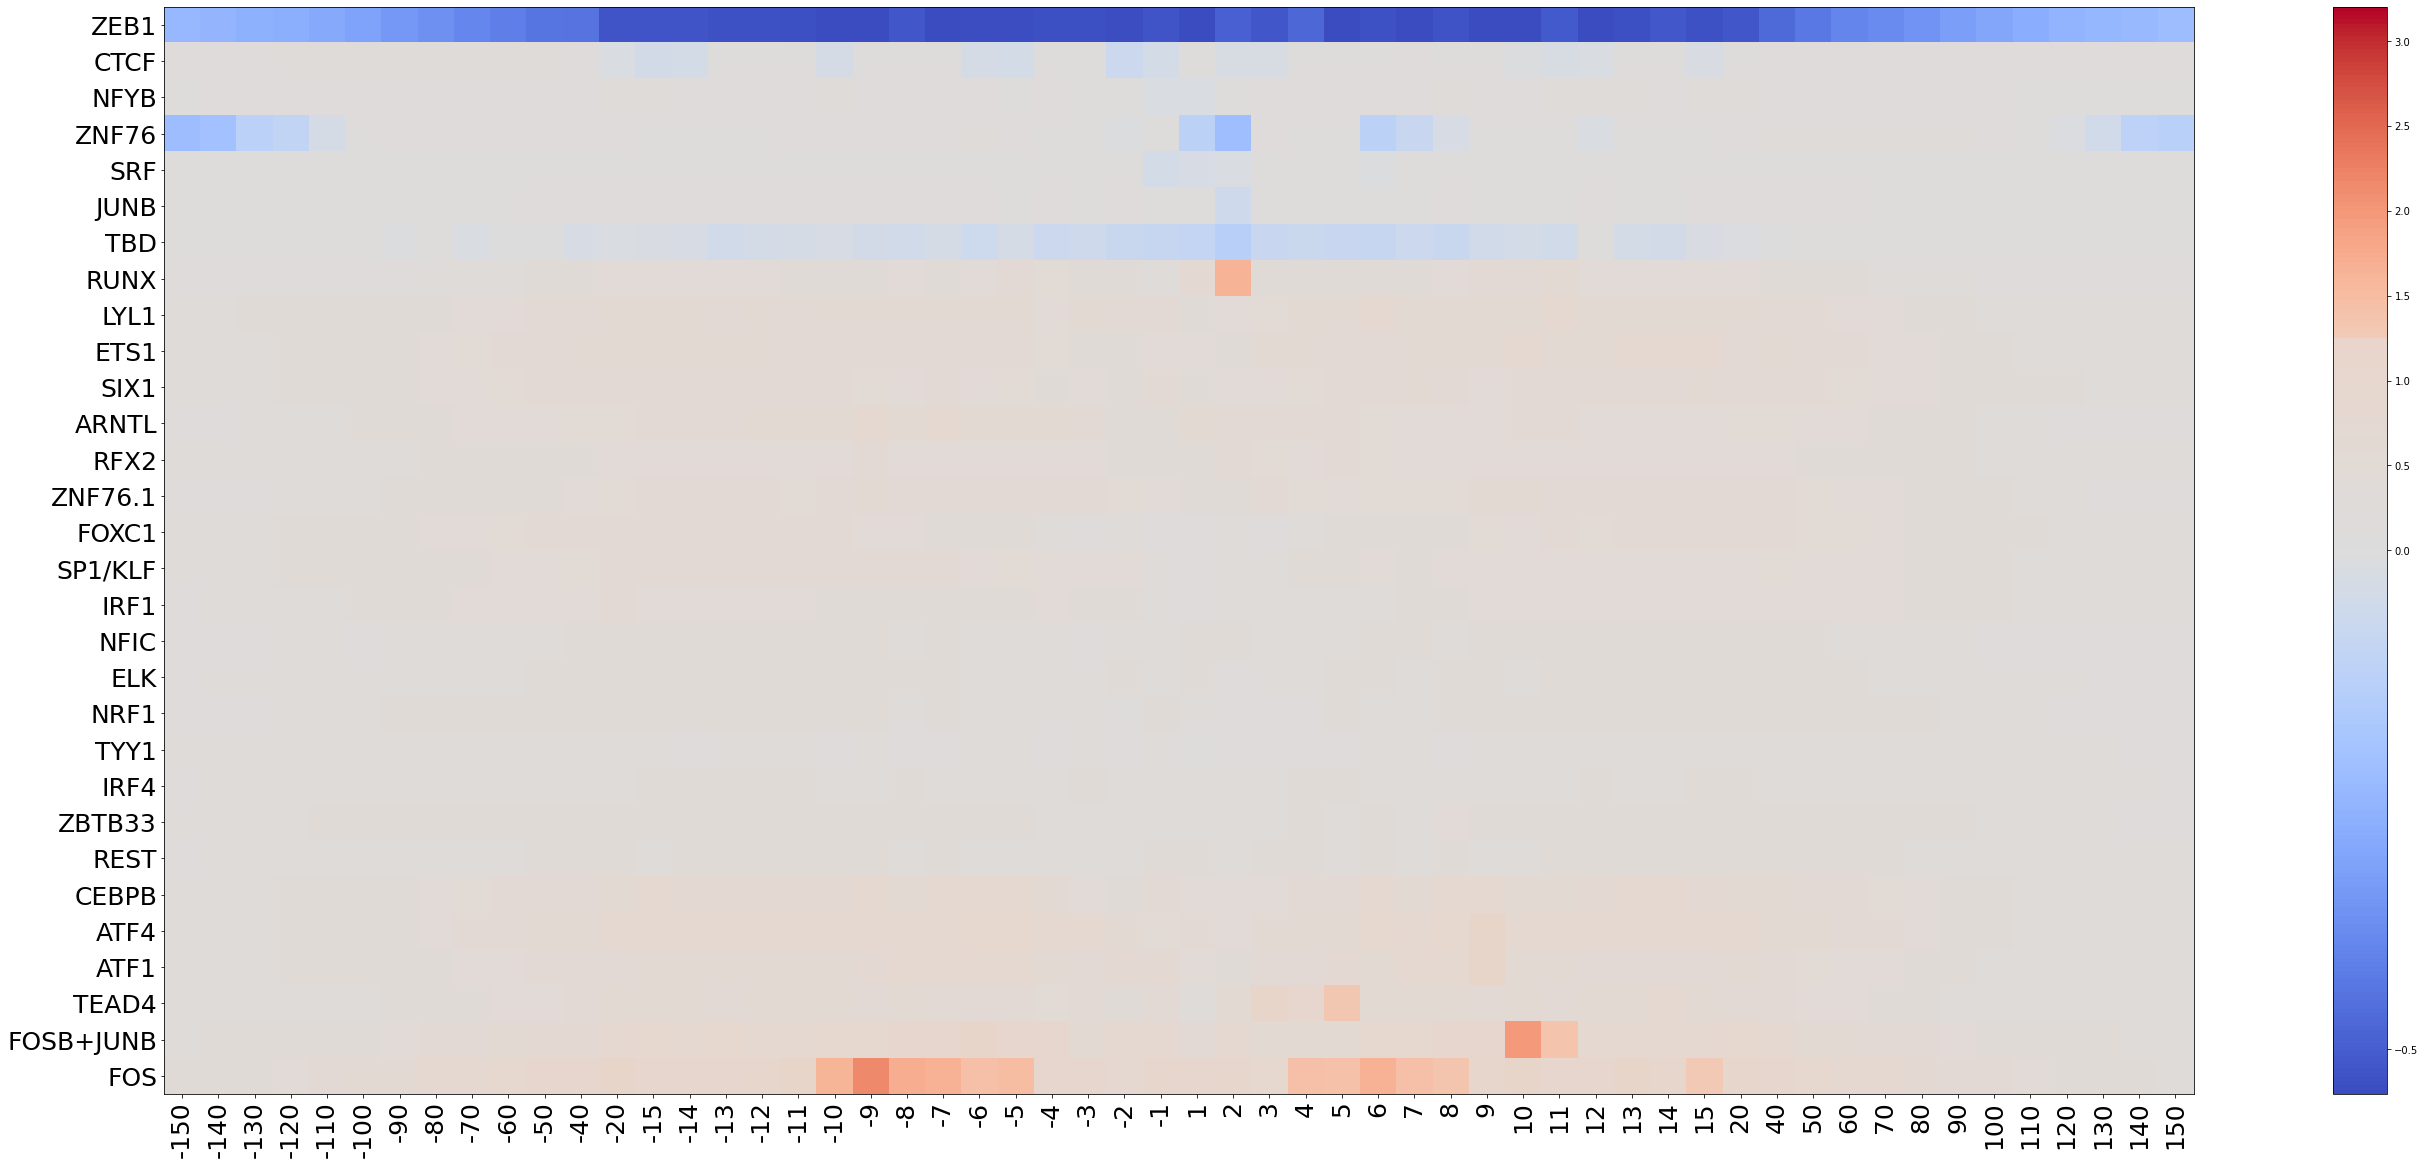

FOSB+JUNB


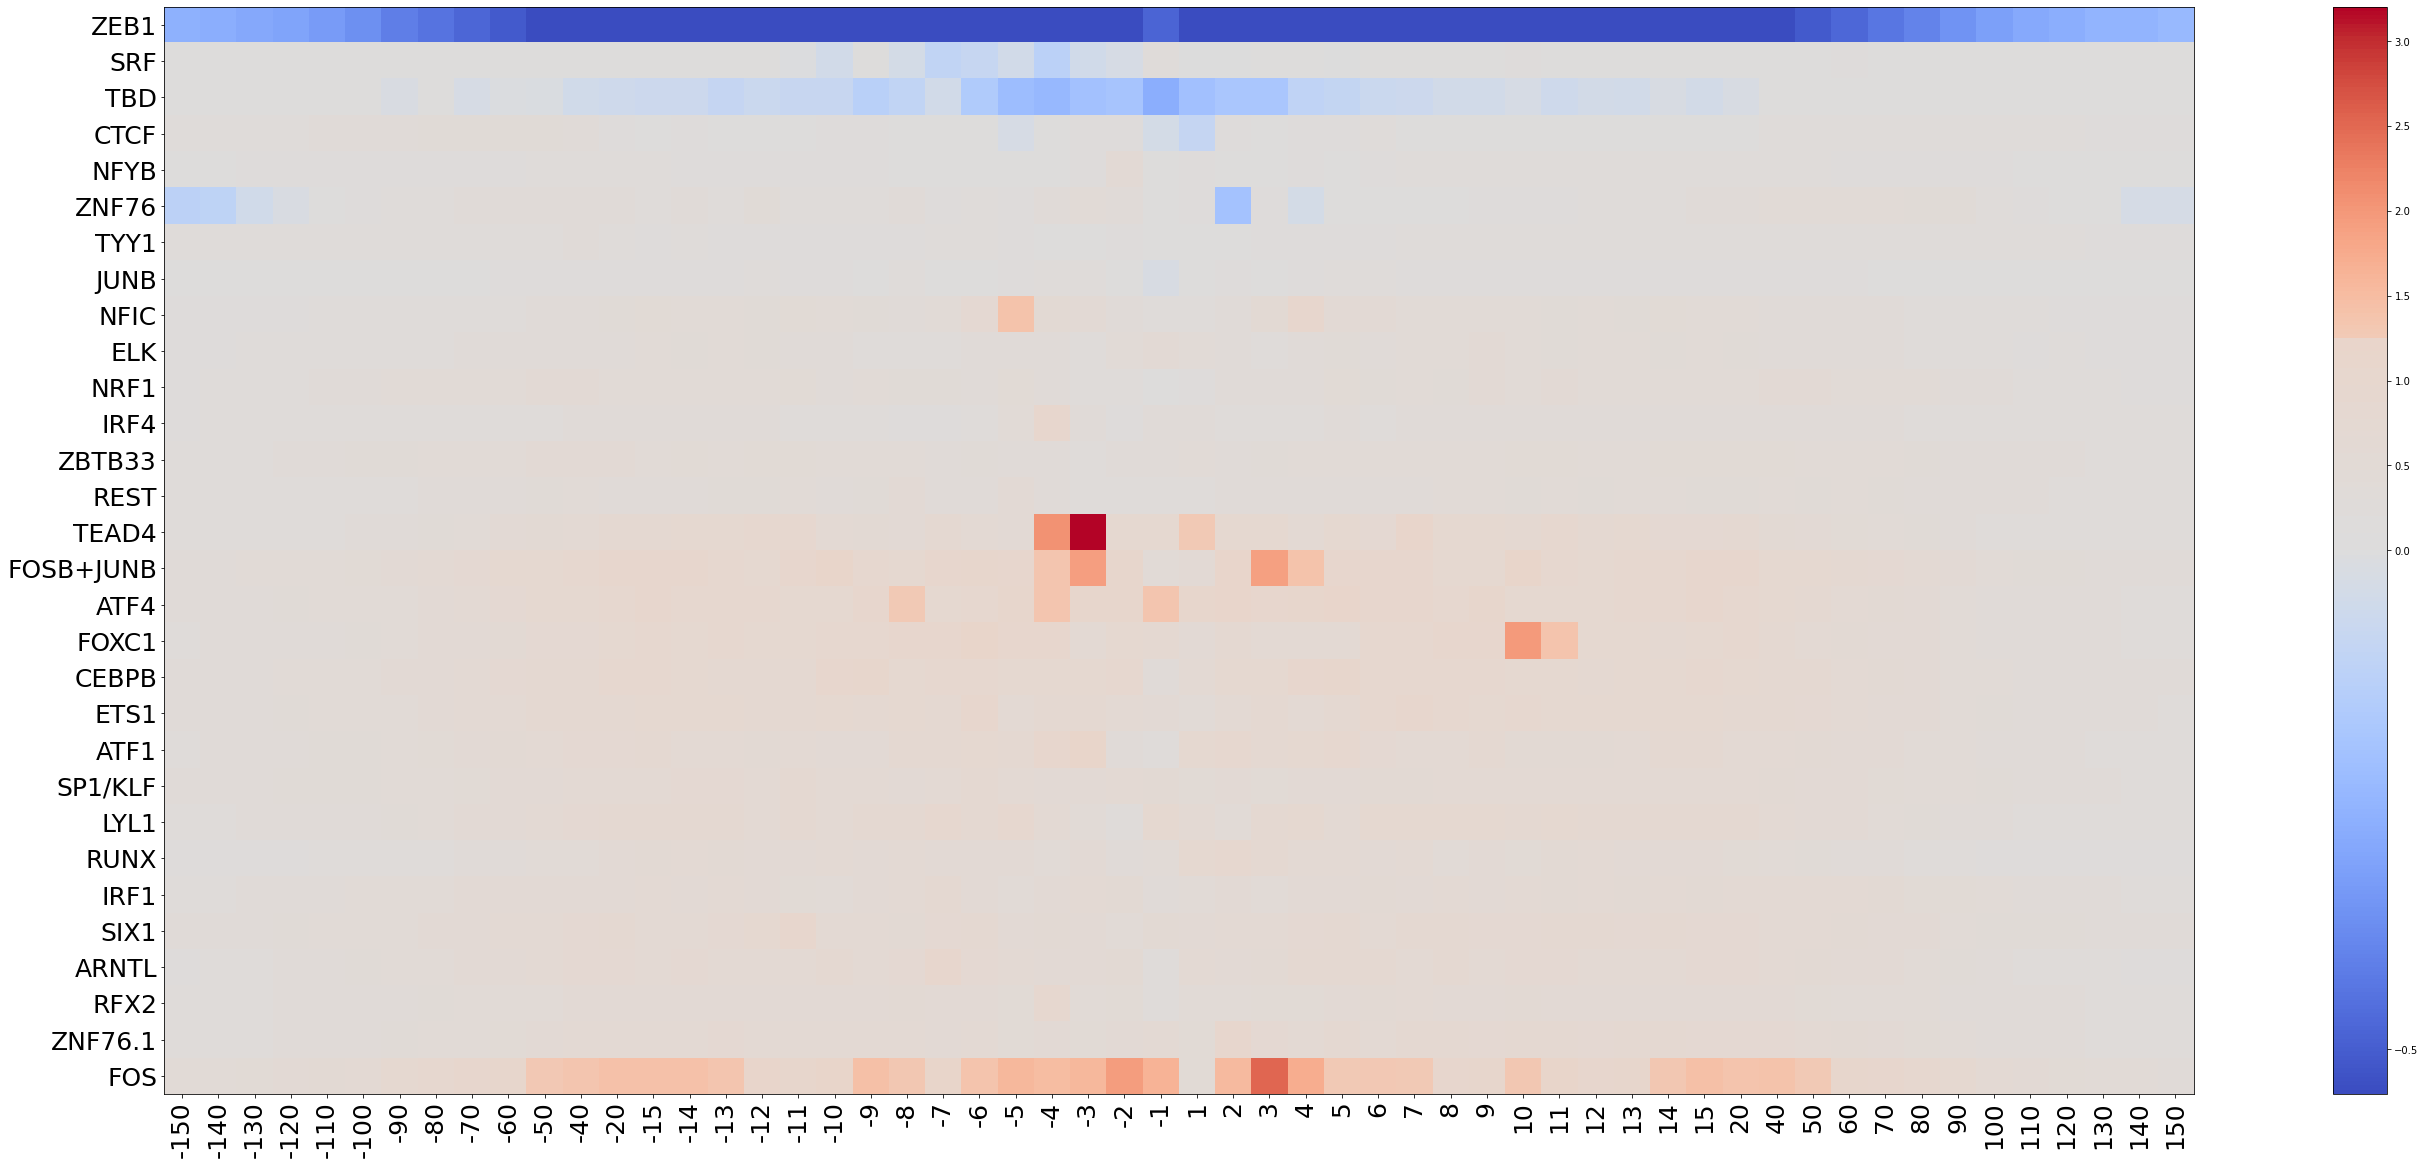

SP1/KLF


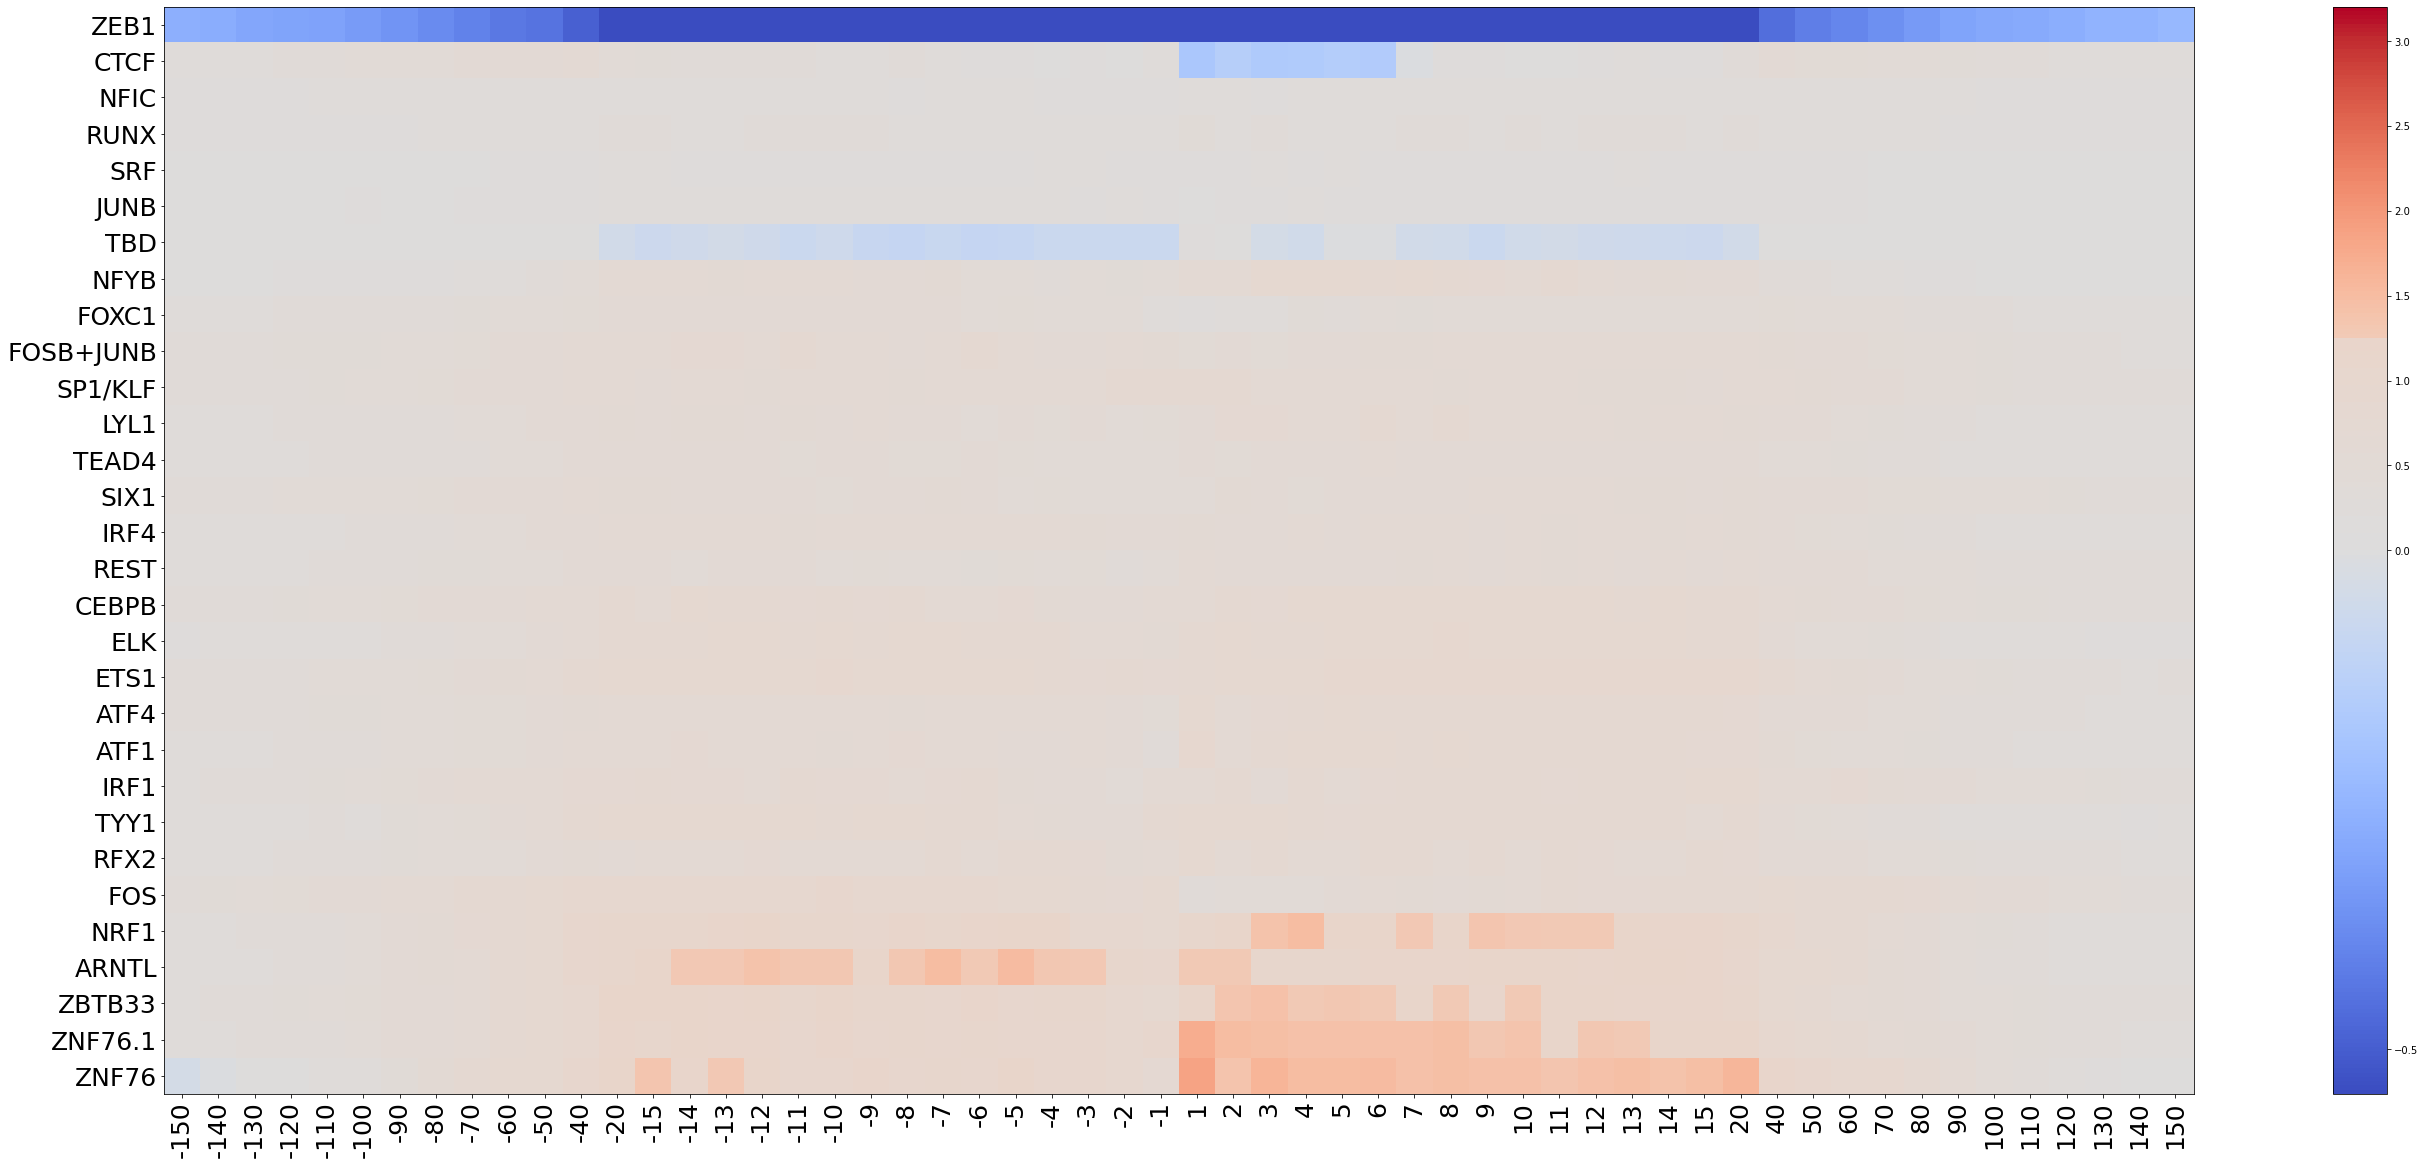

NFIC


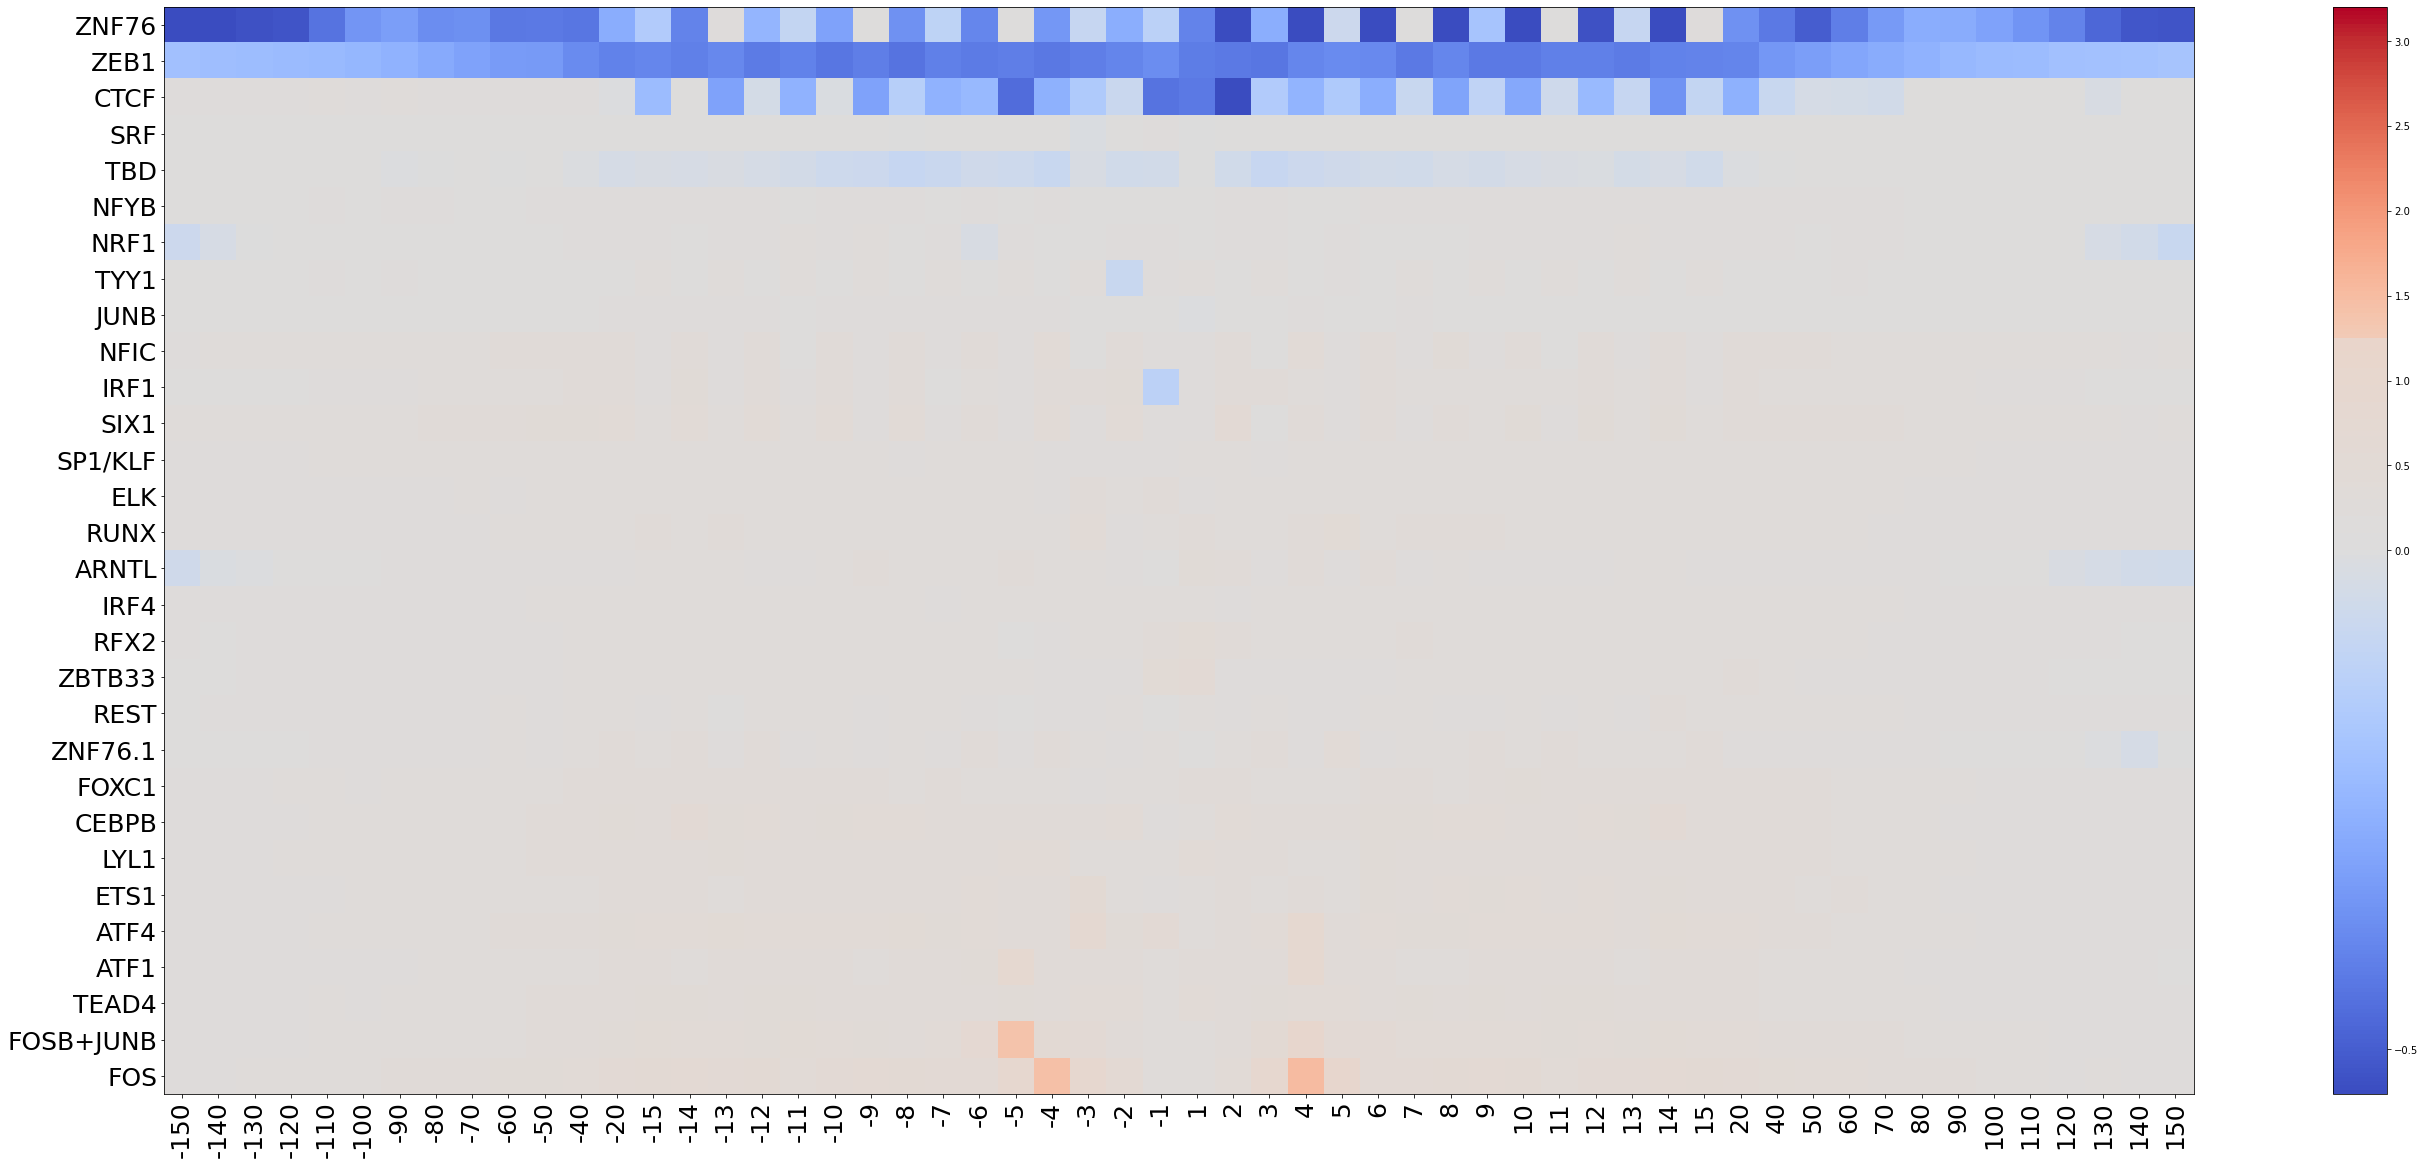

CEBPB


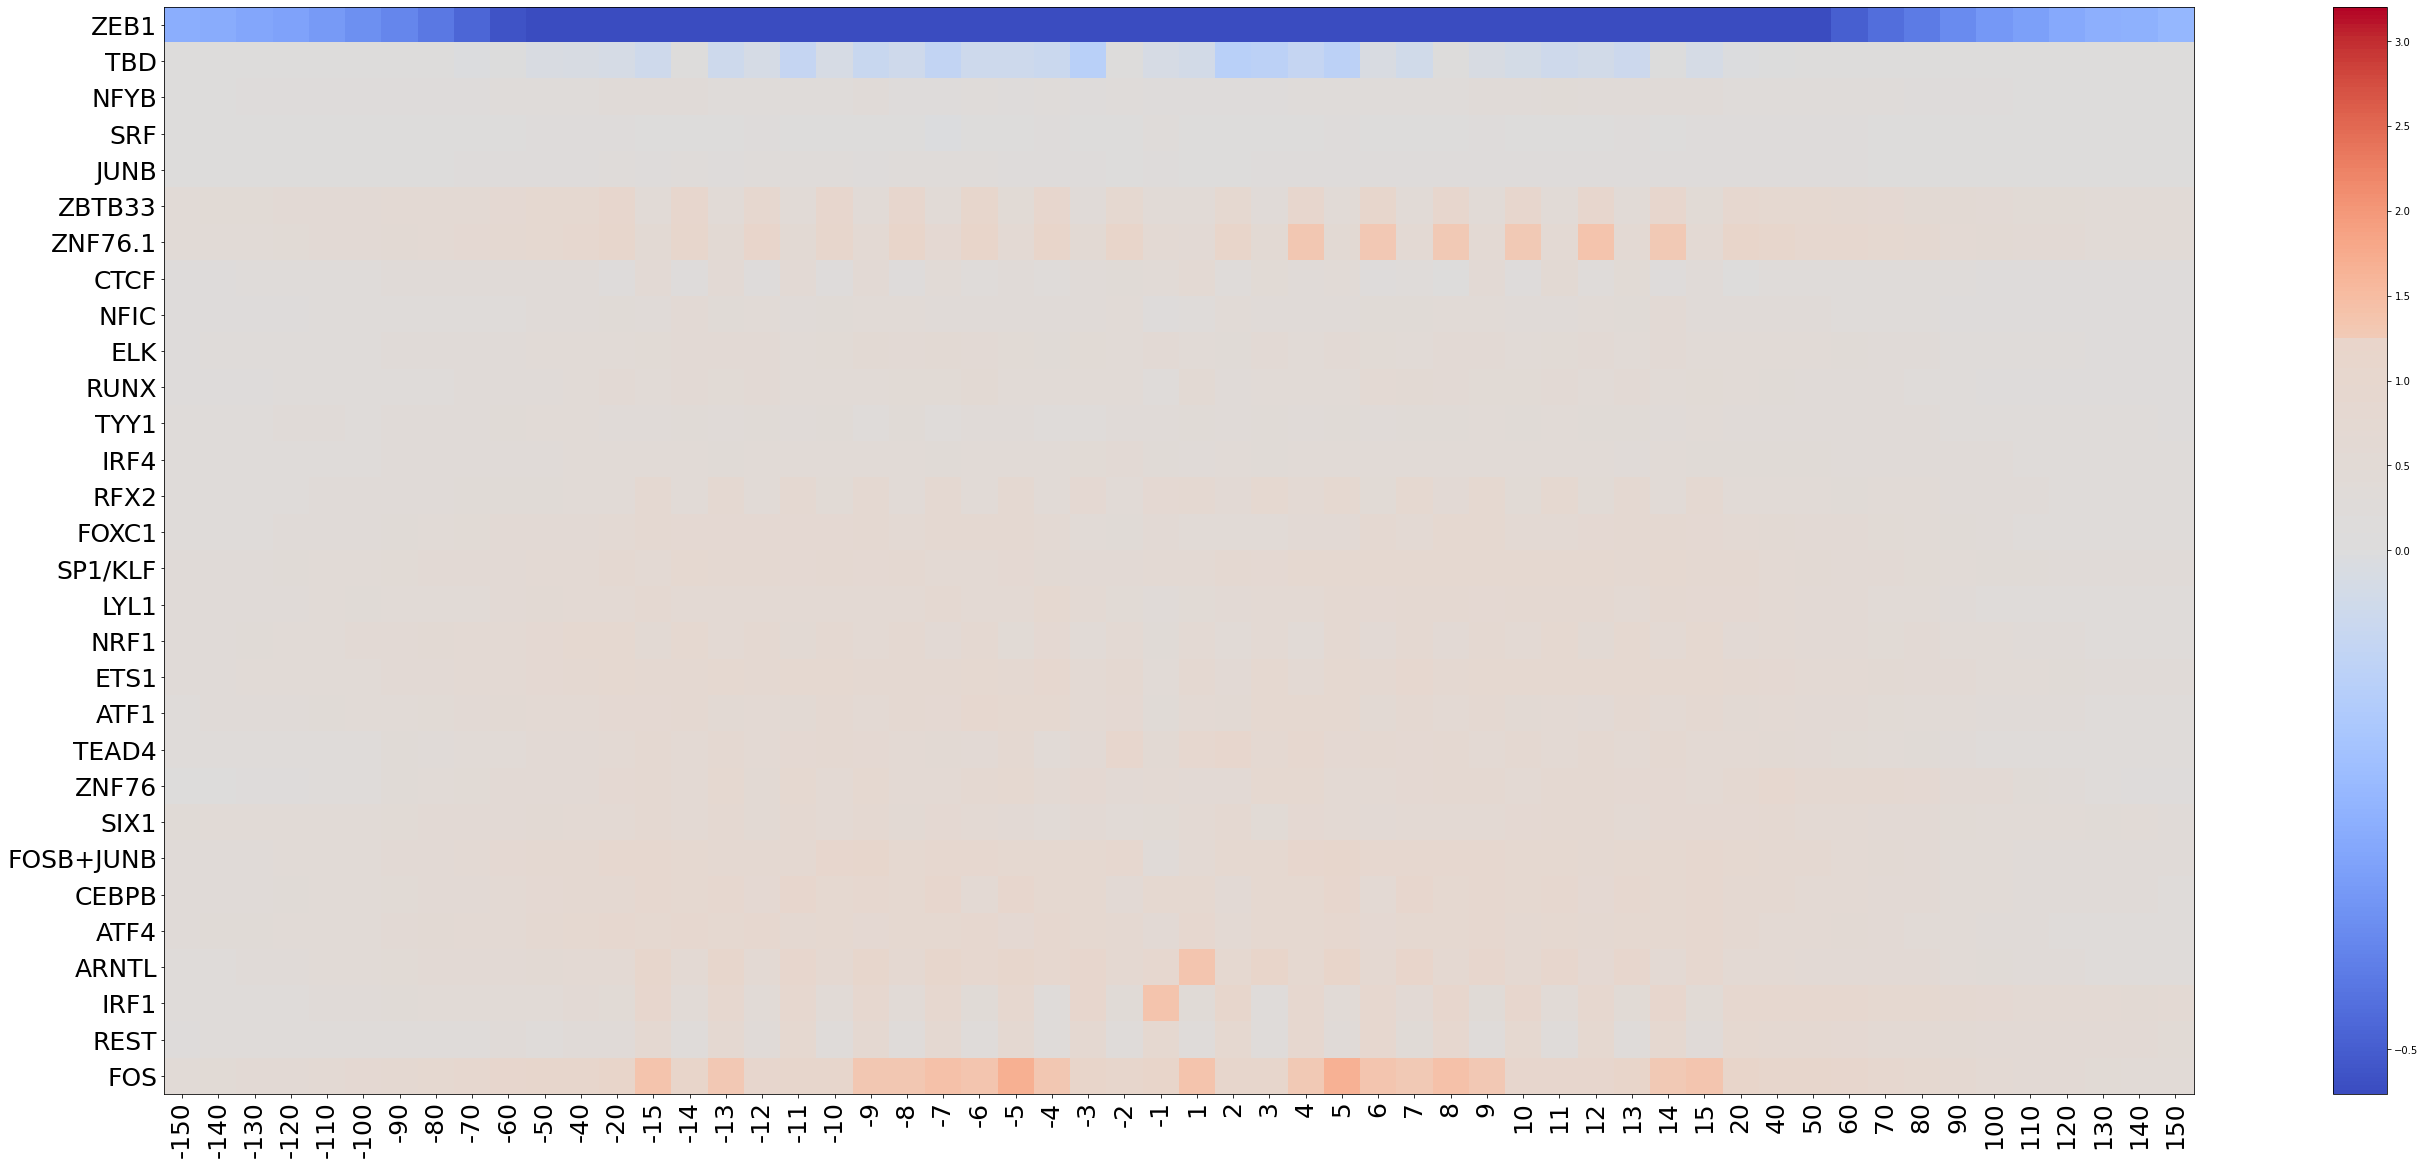

NFYB


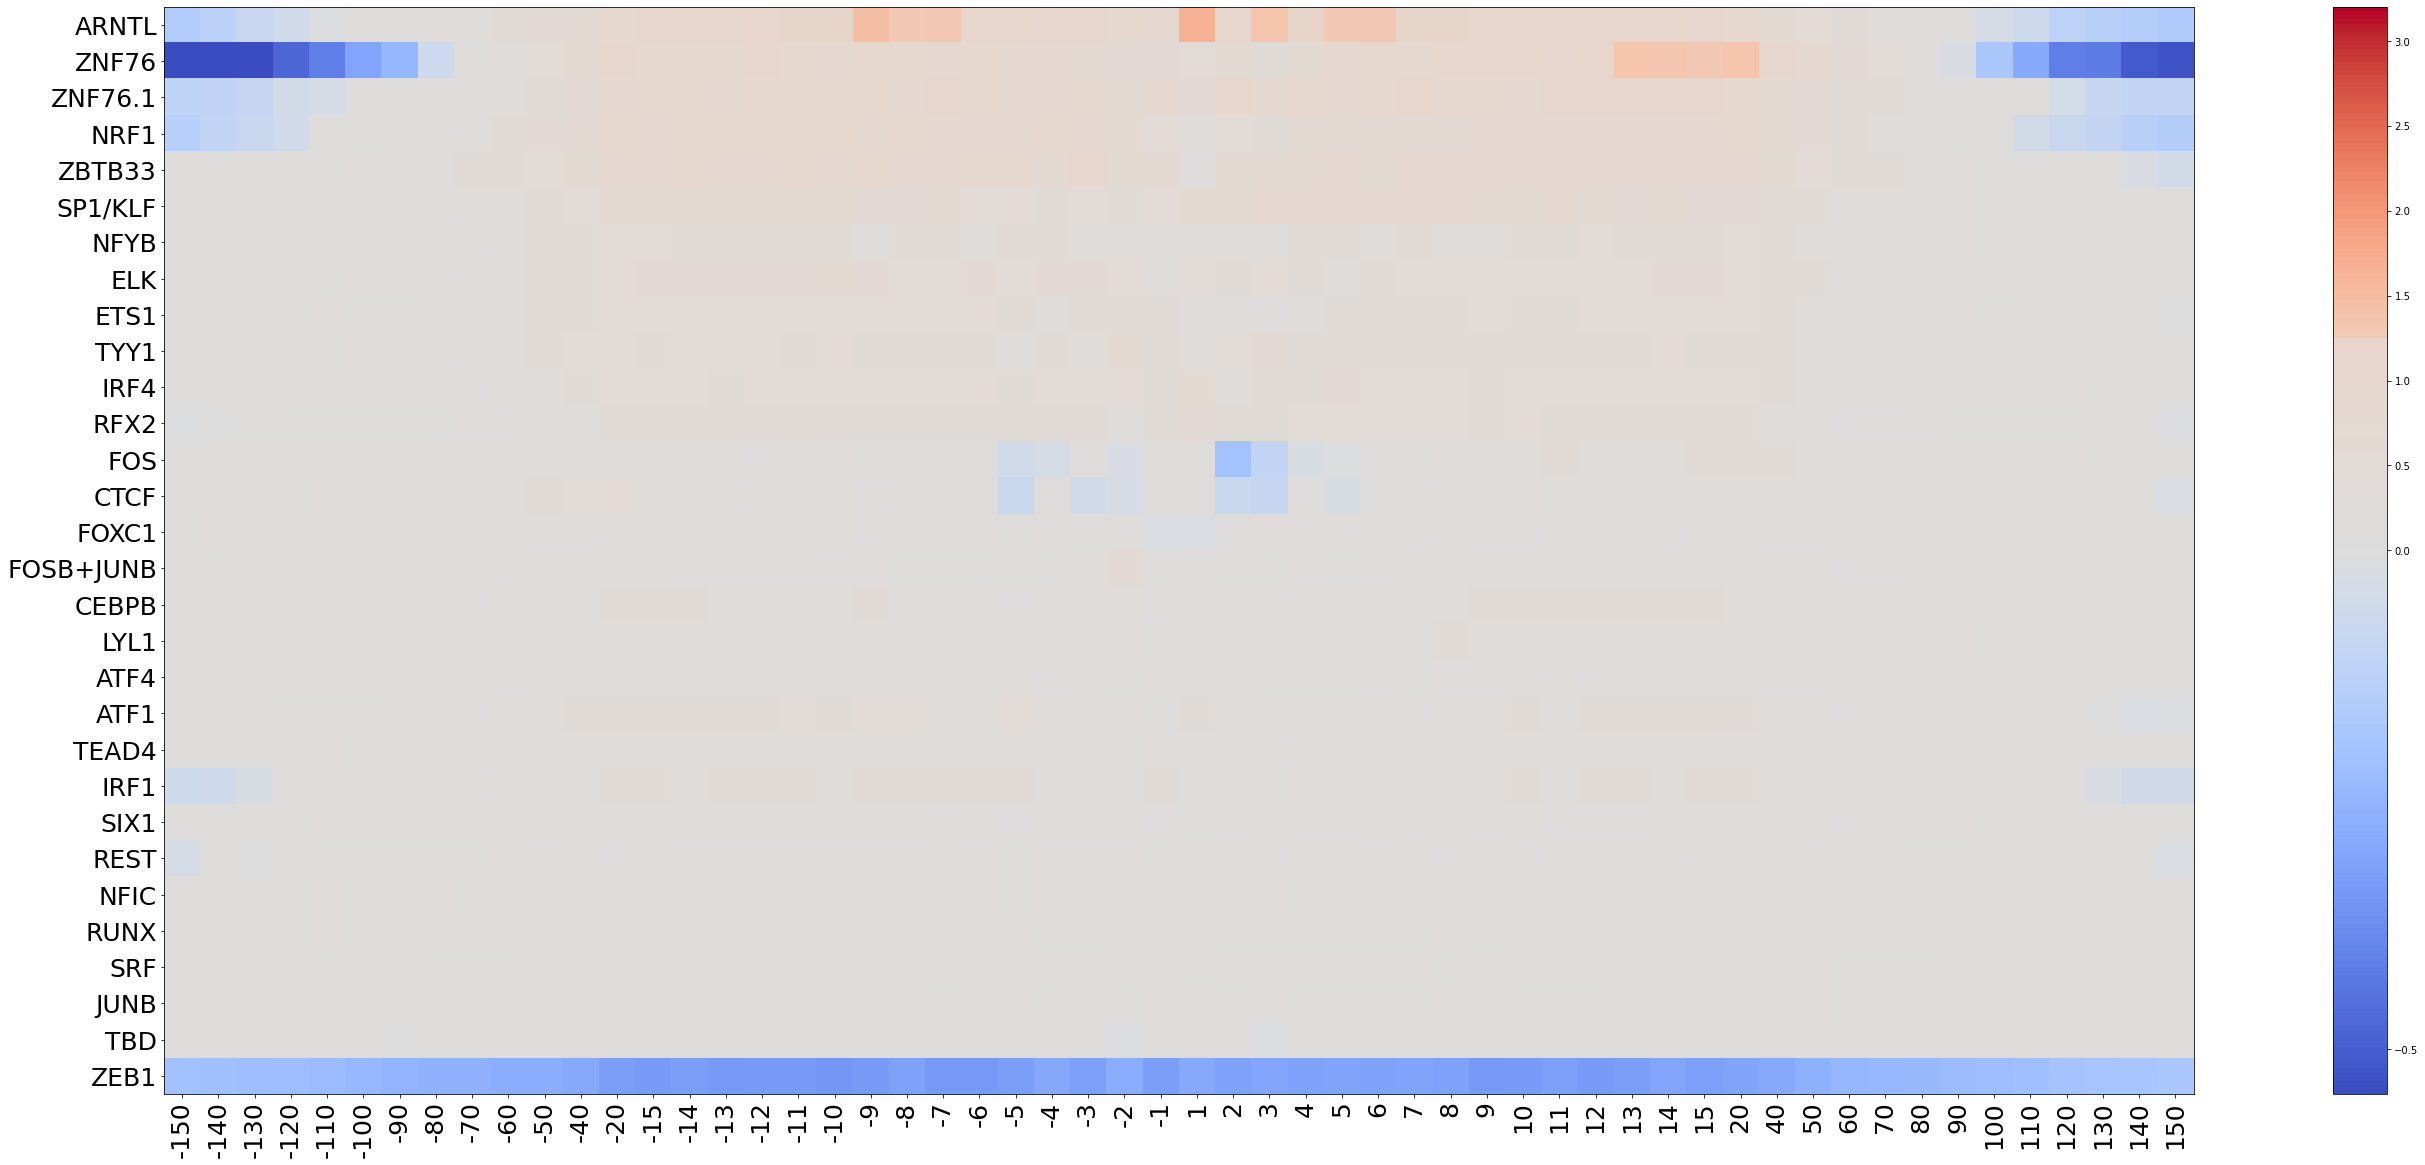

ELK


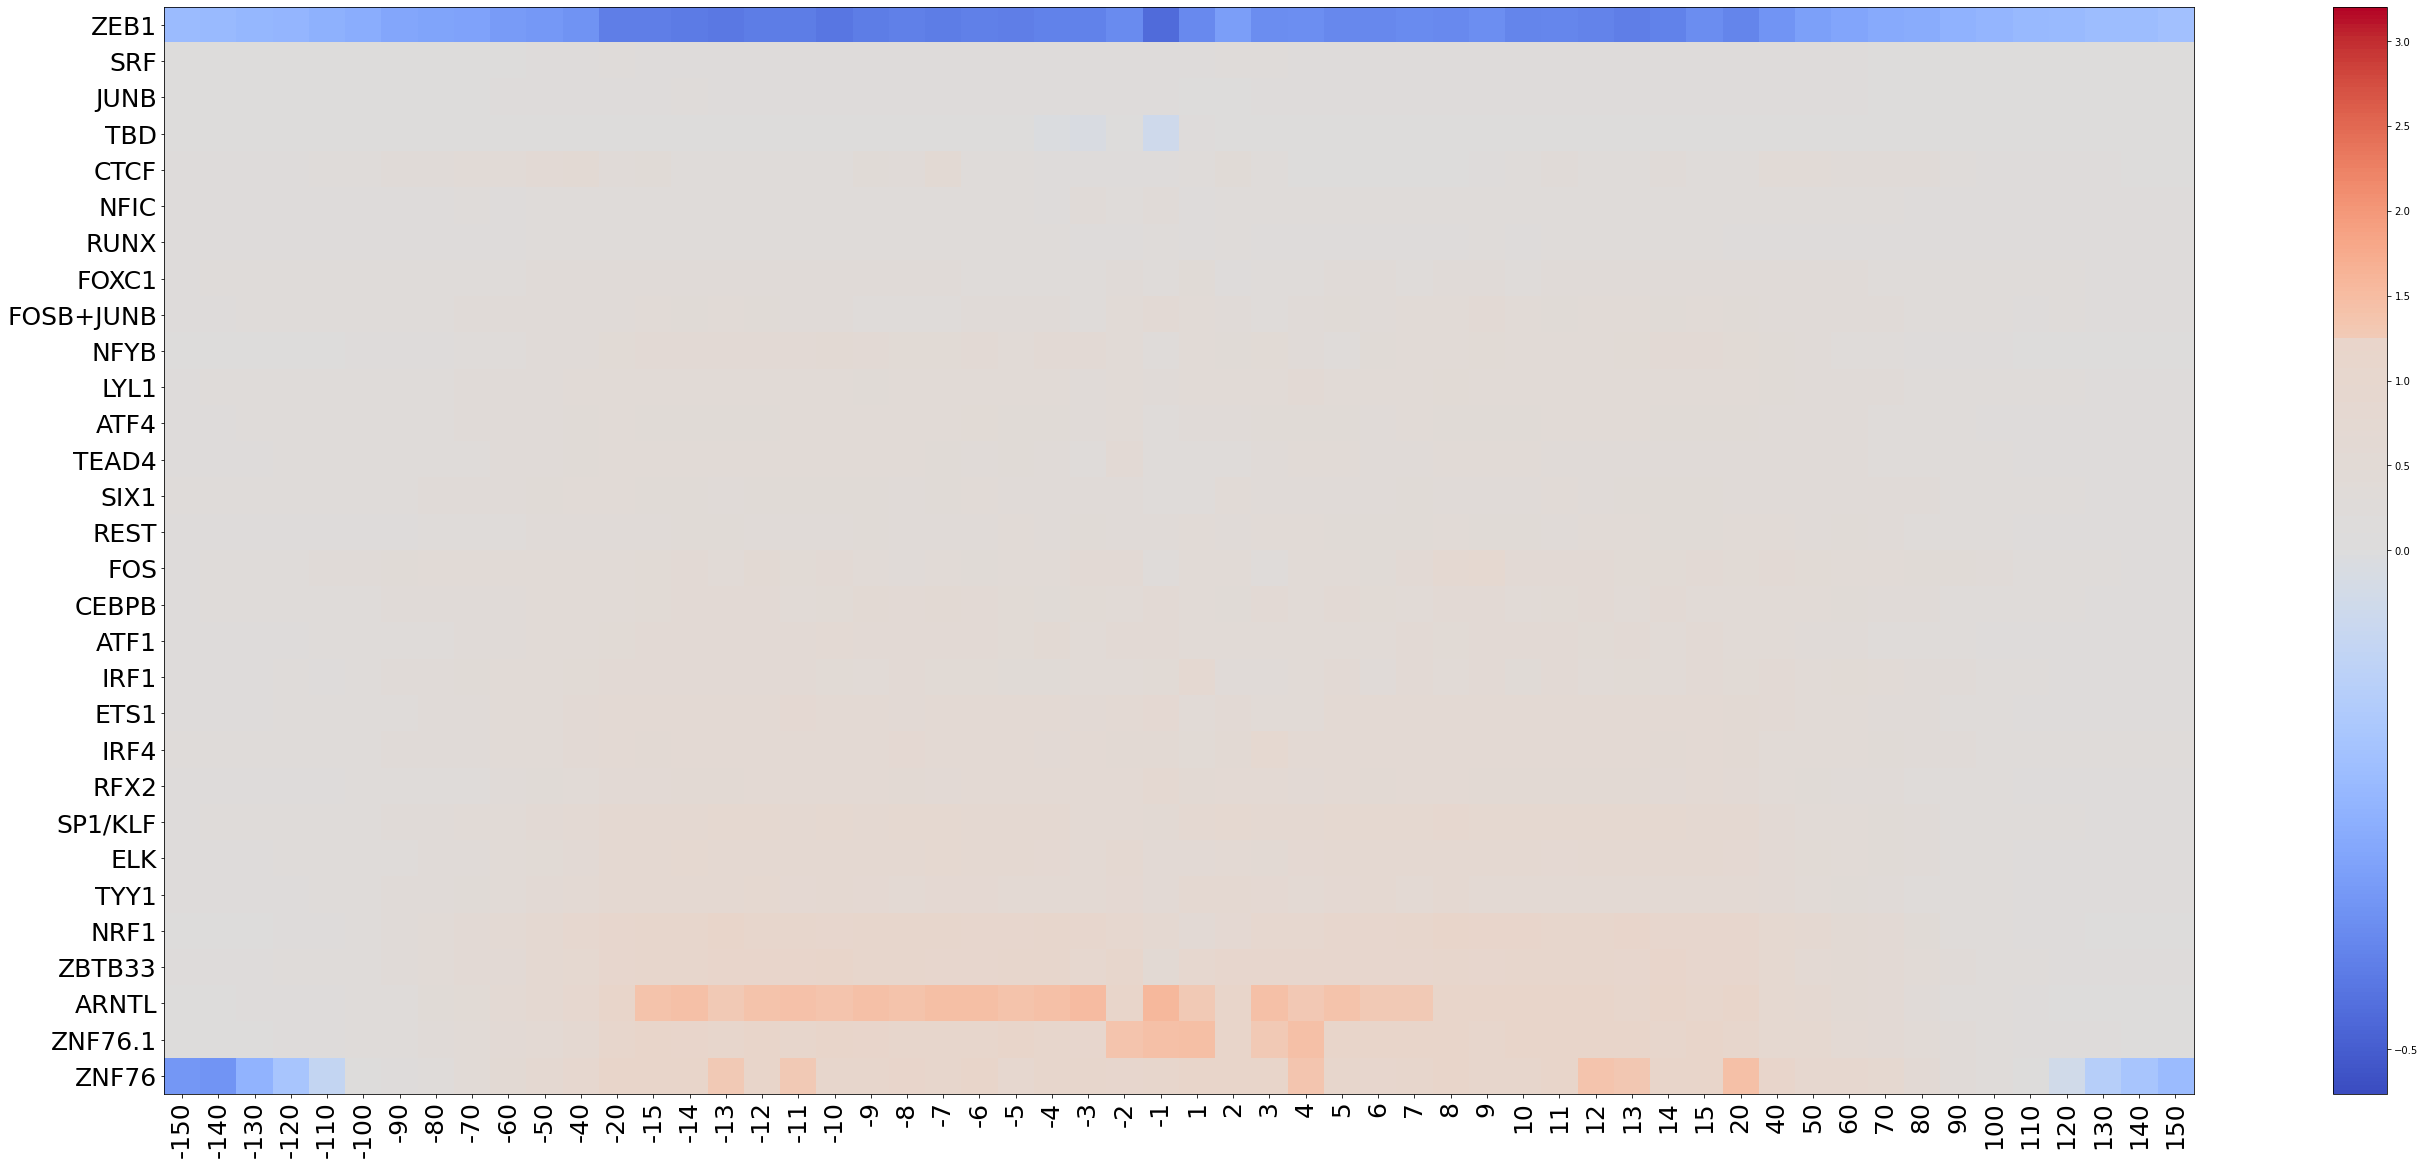

LYL1


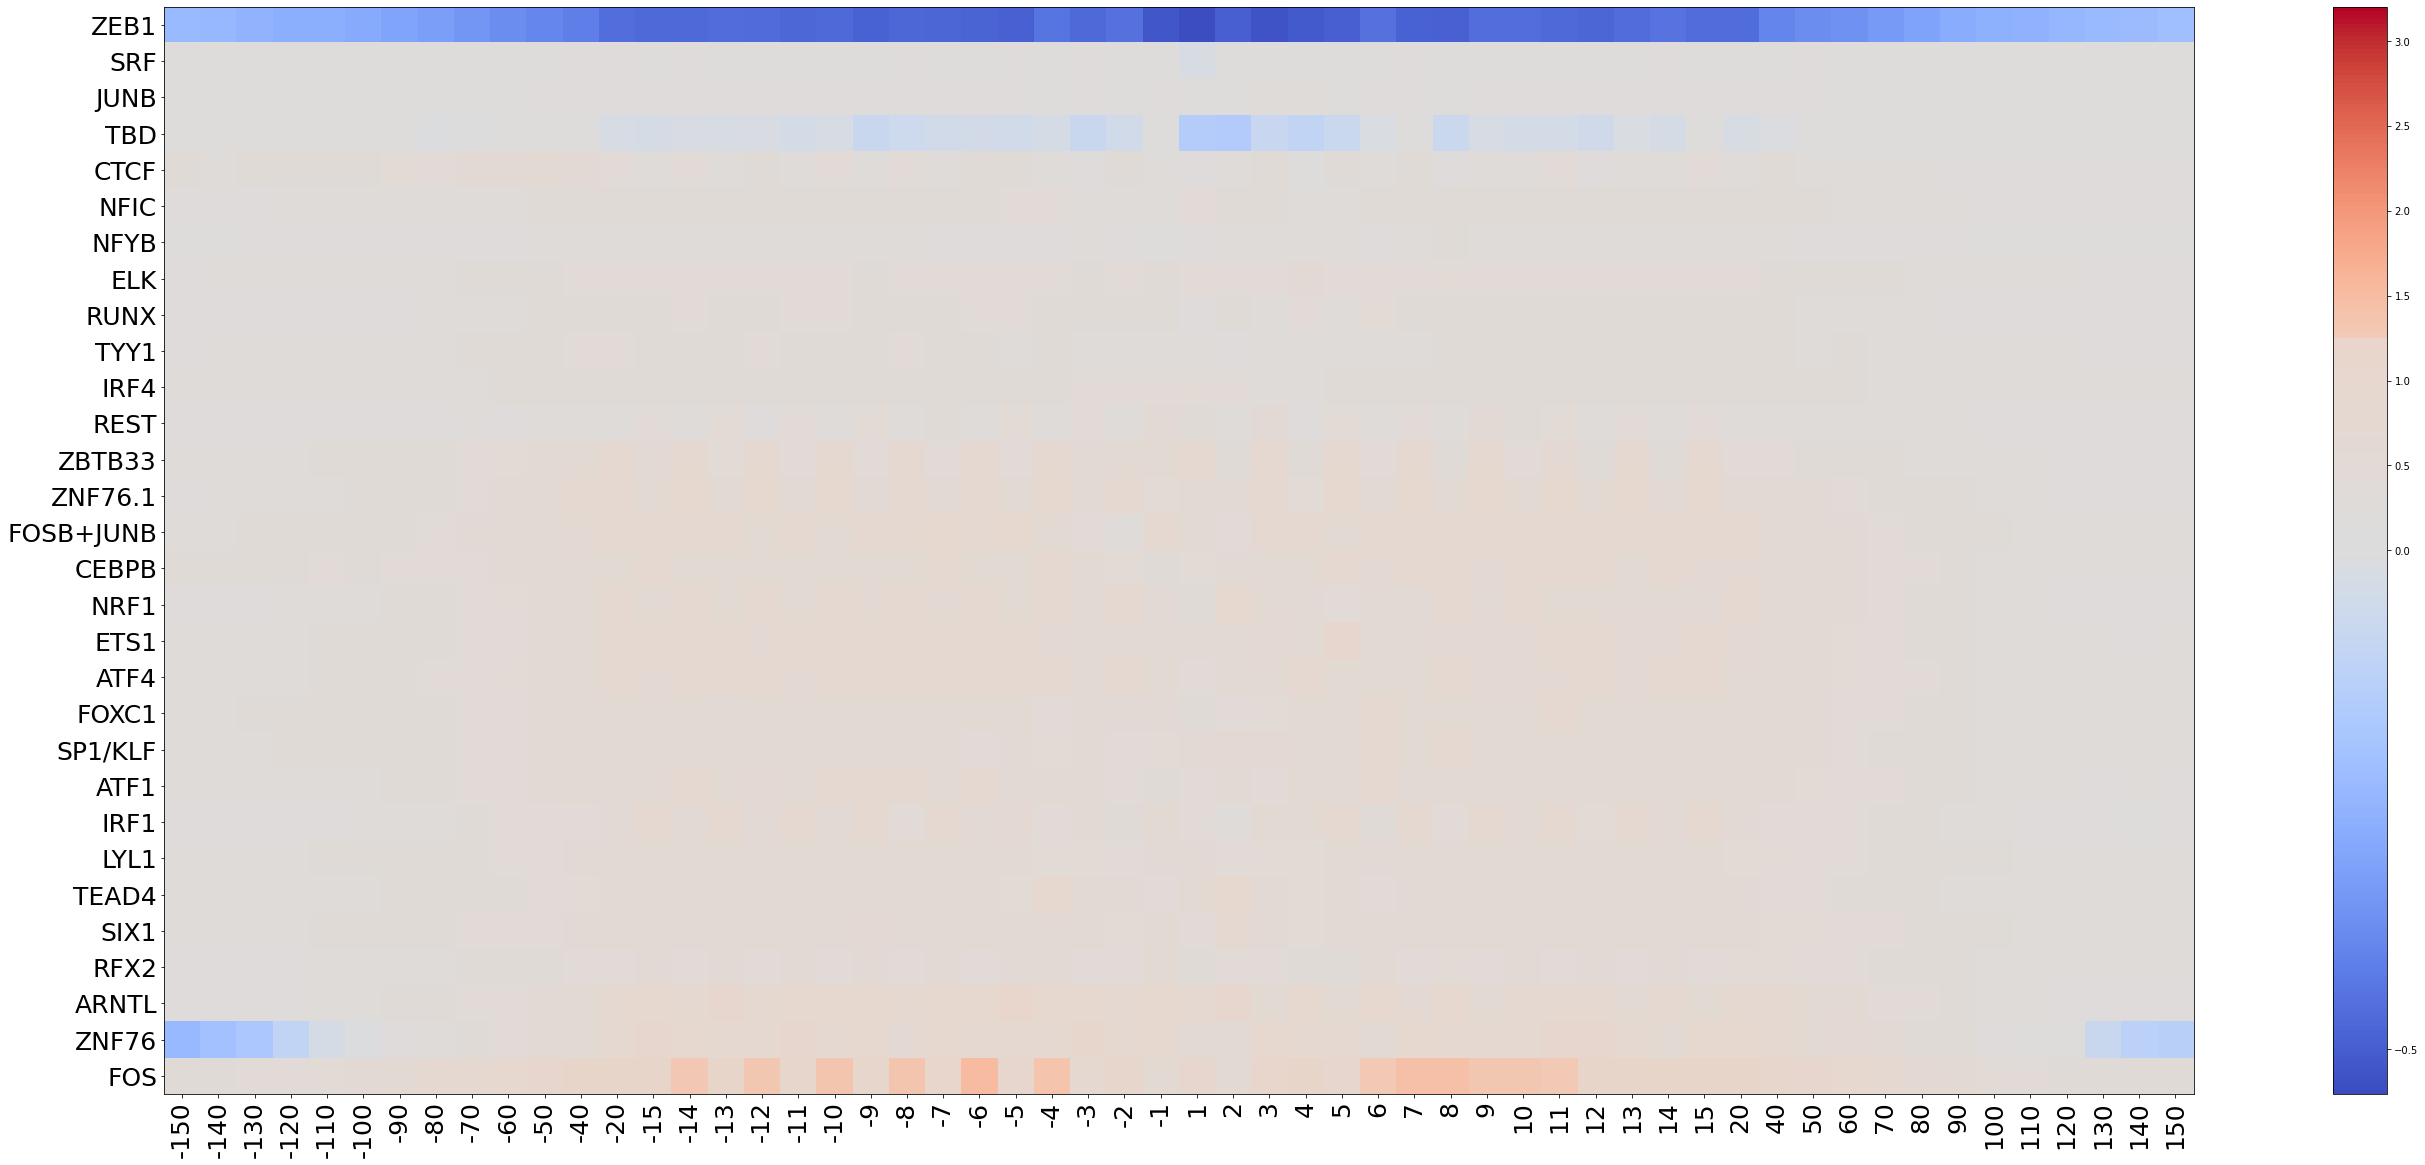

RUNX


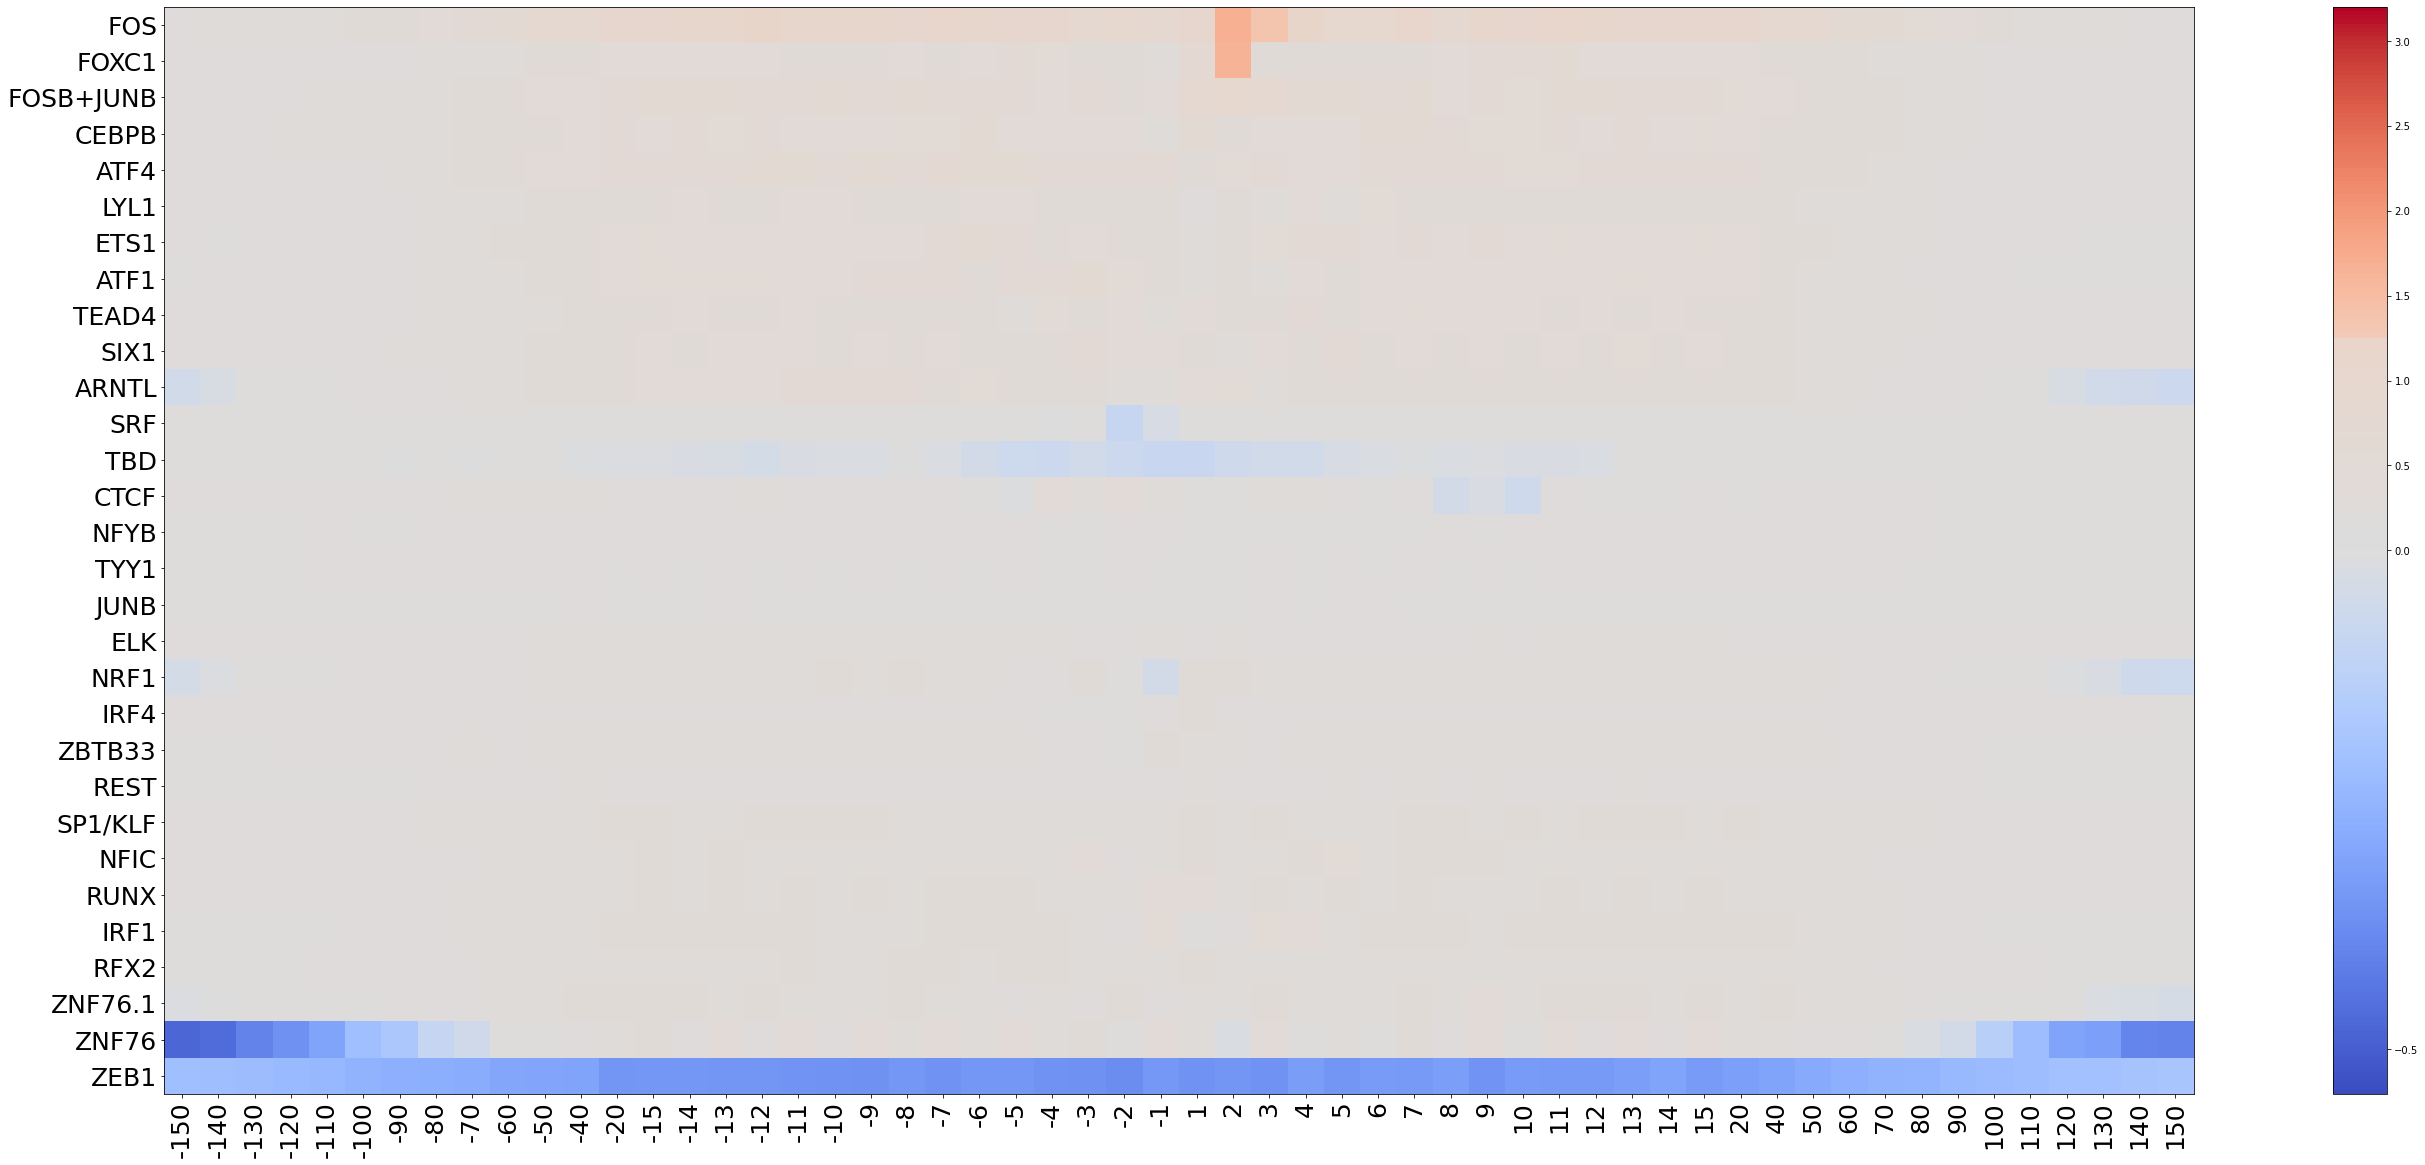

NRF1


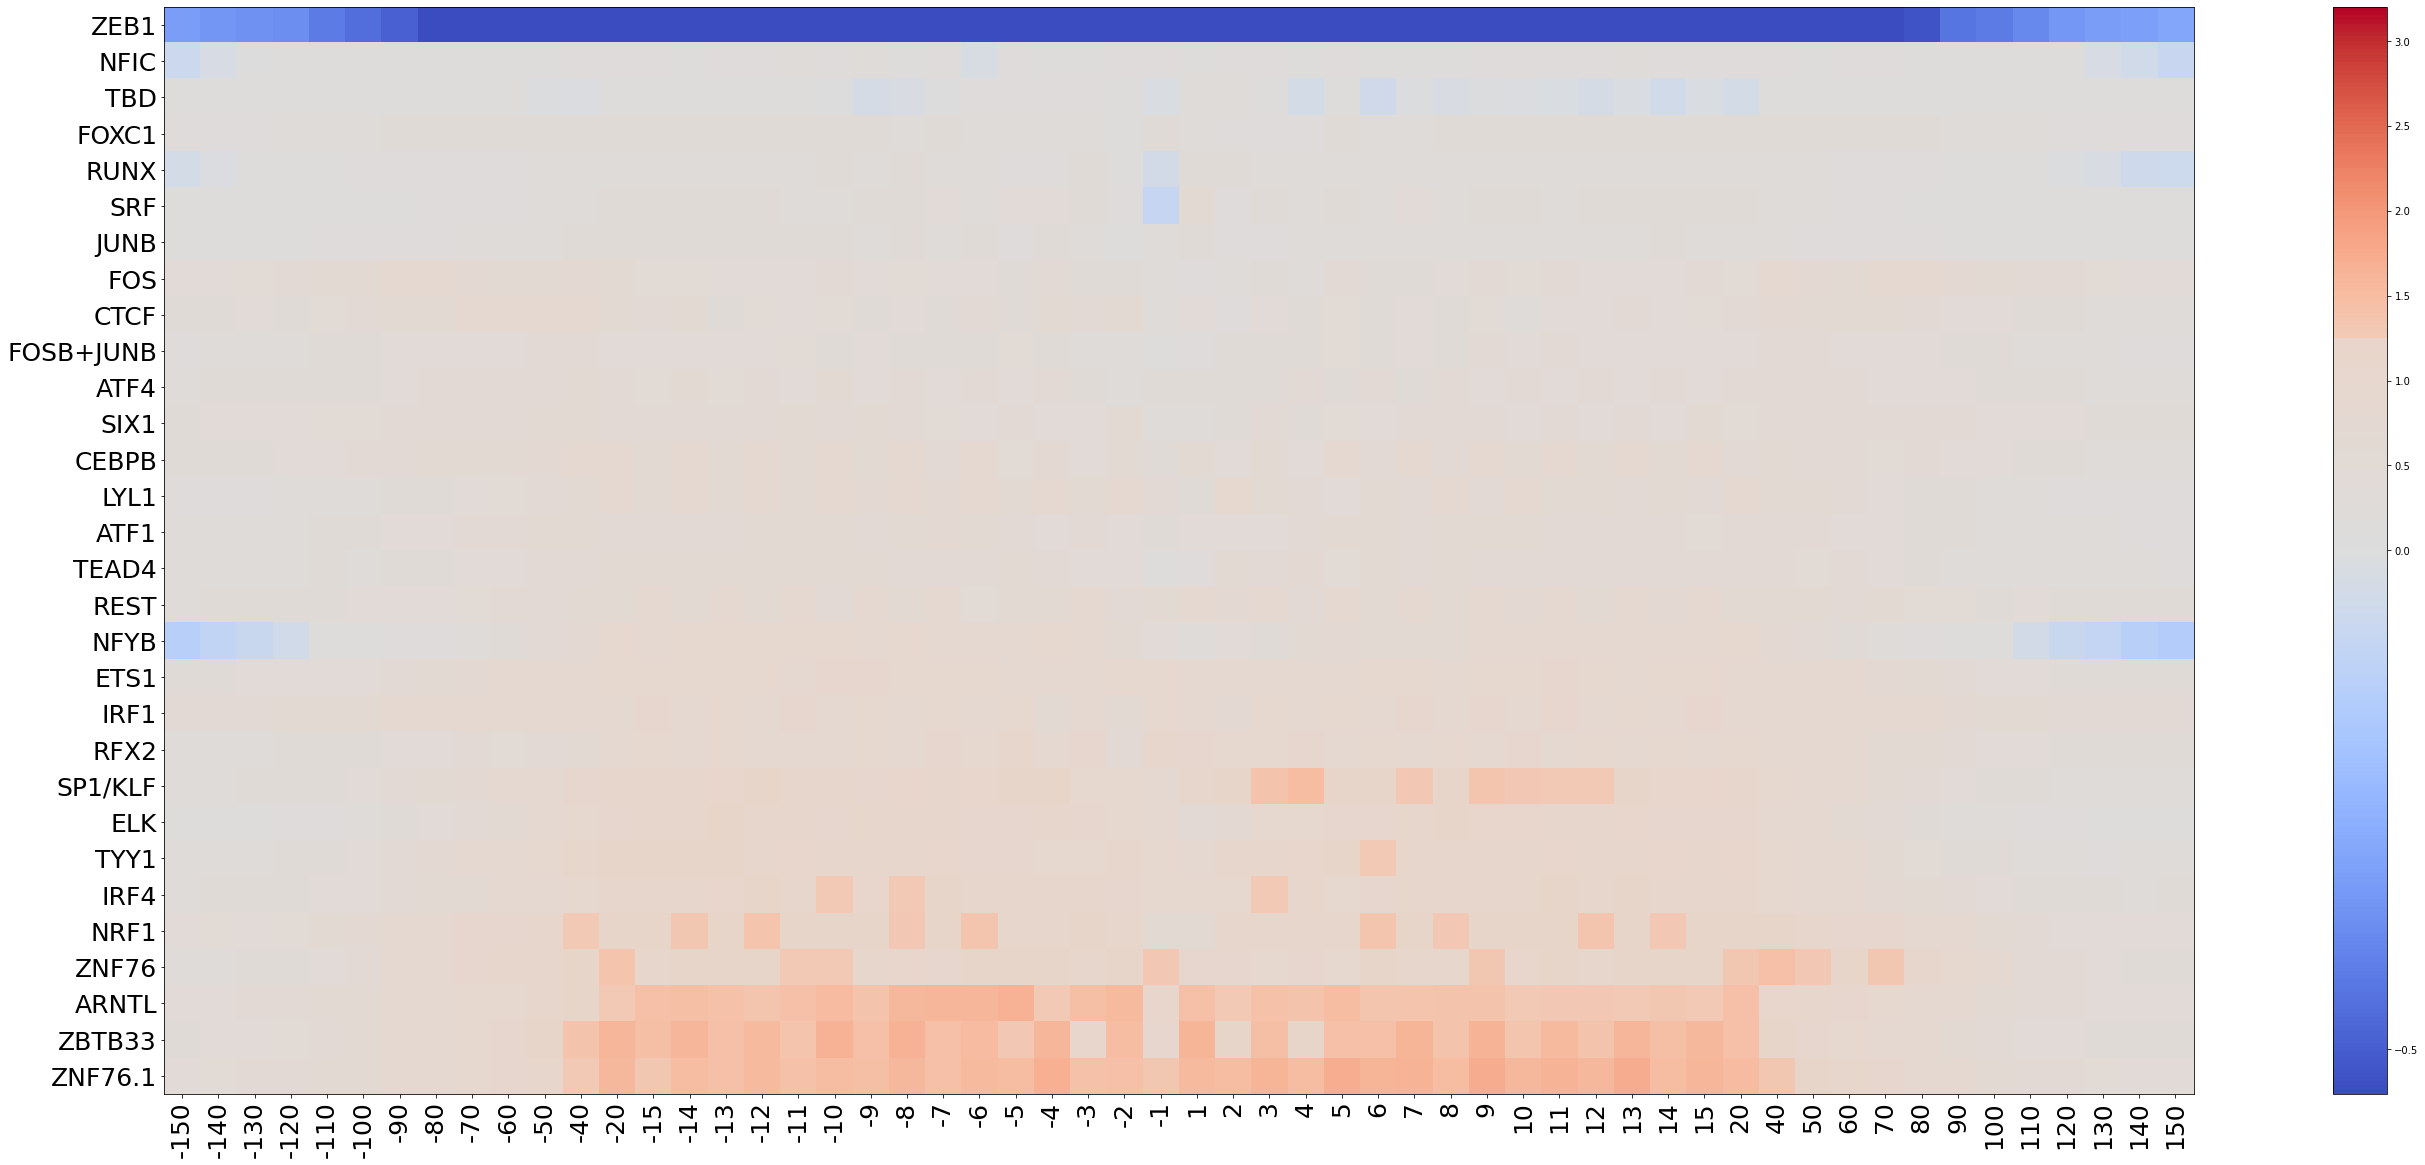

ETS1


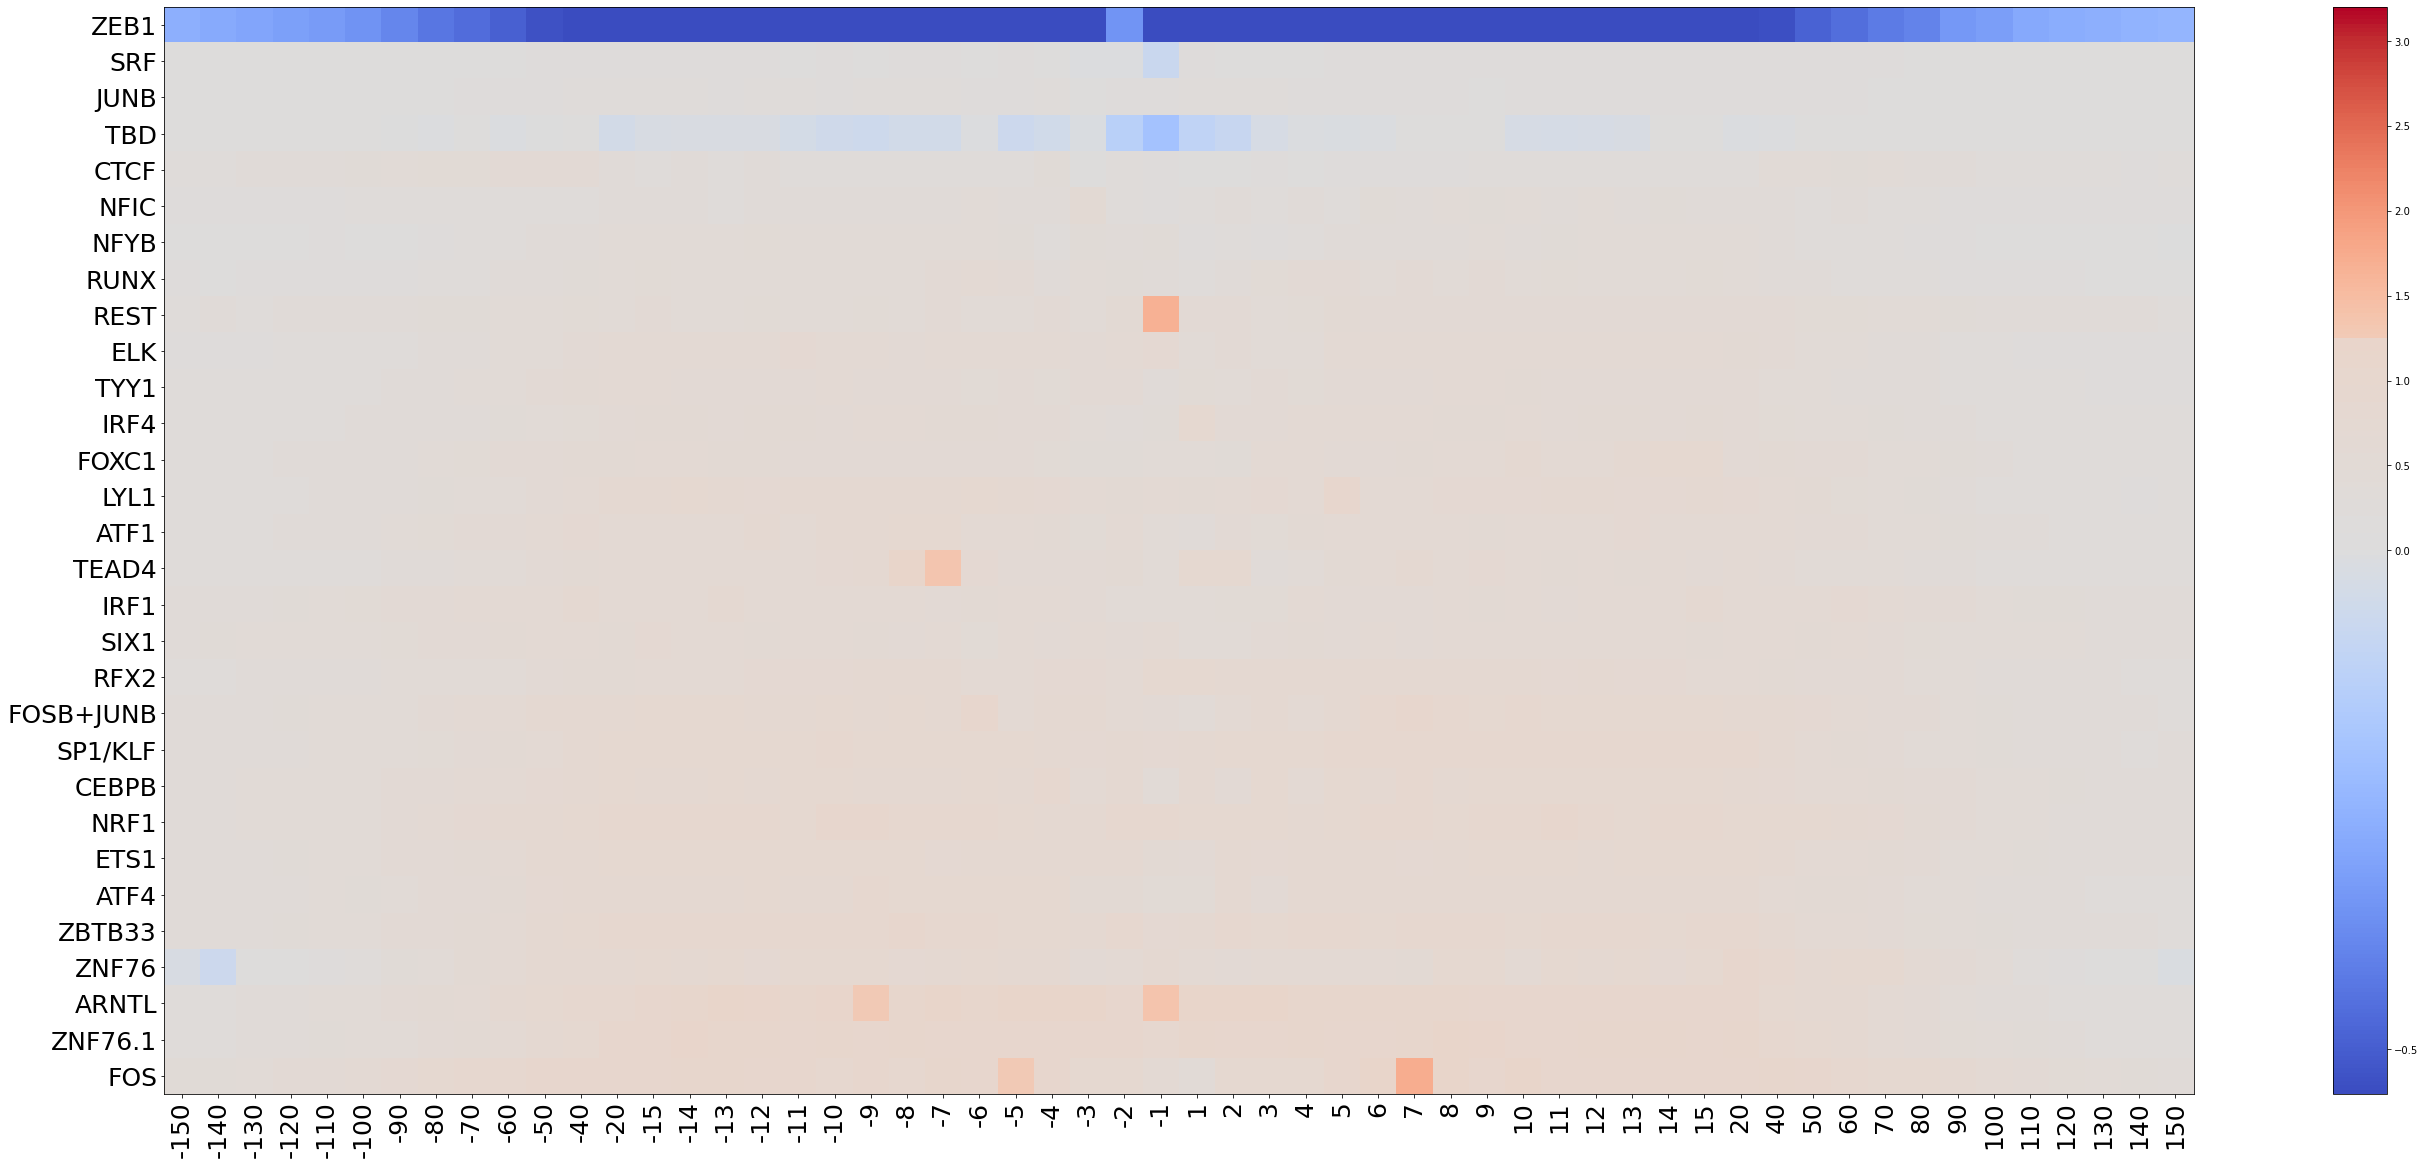

ATF4


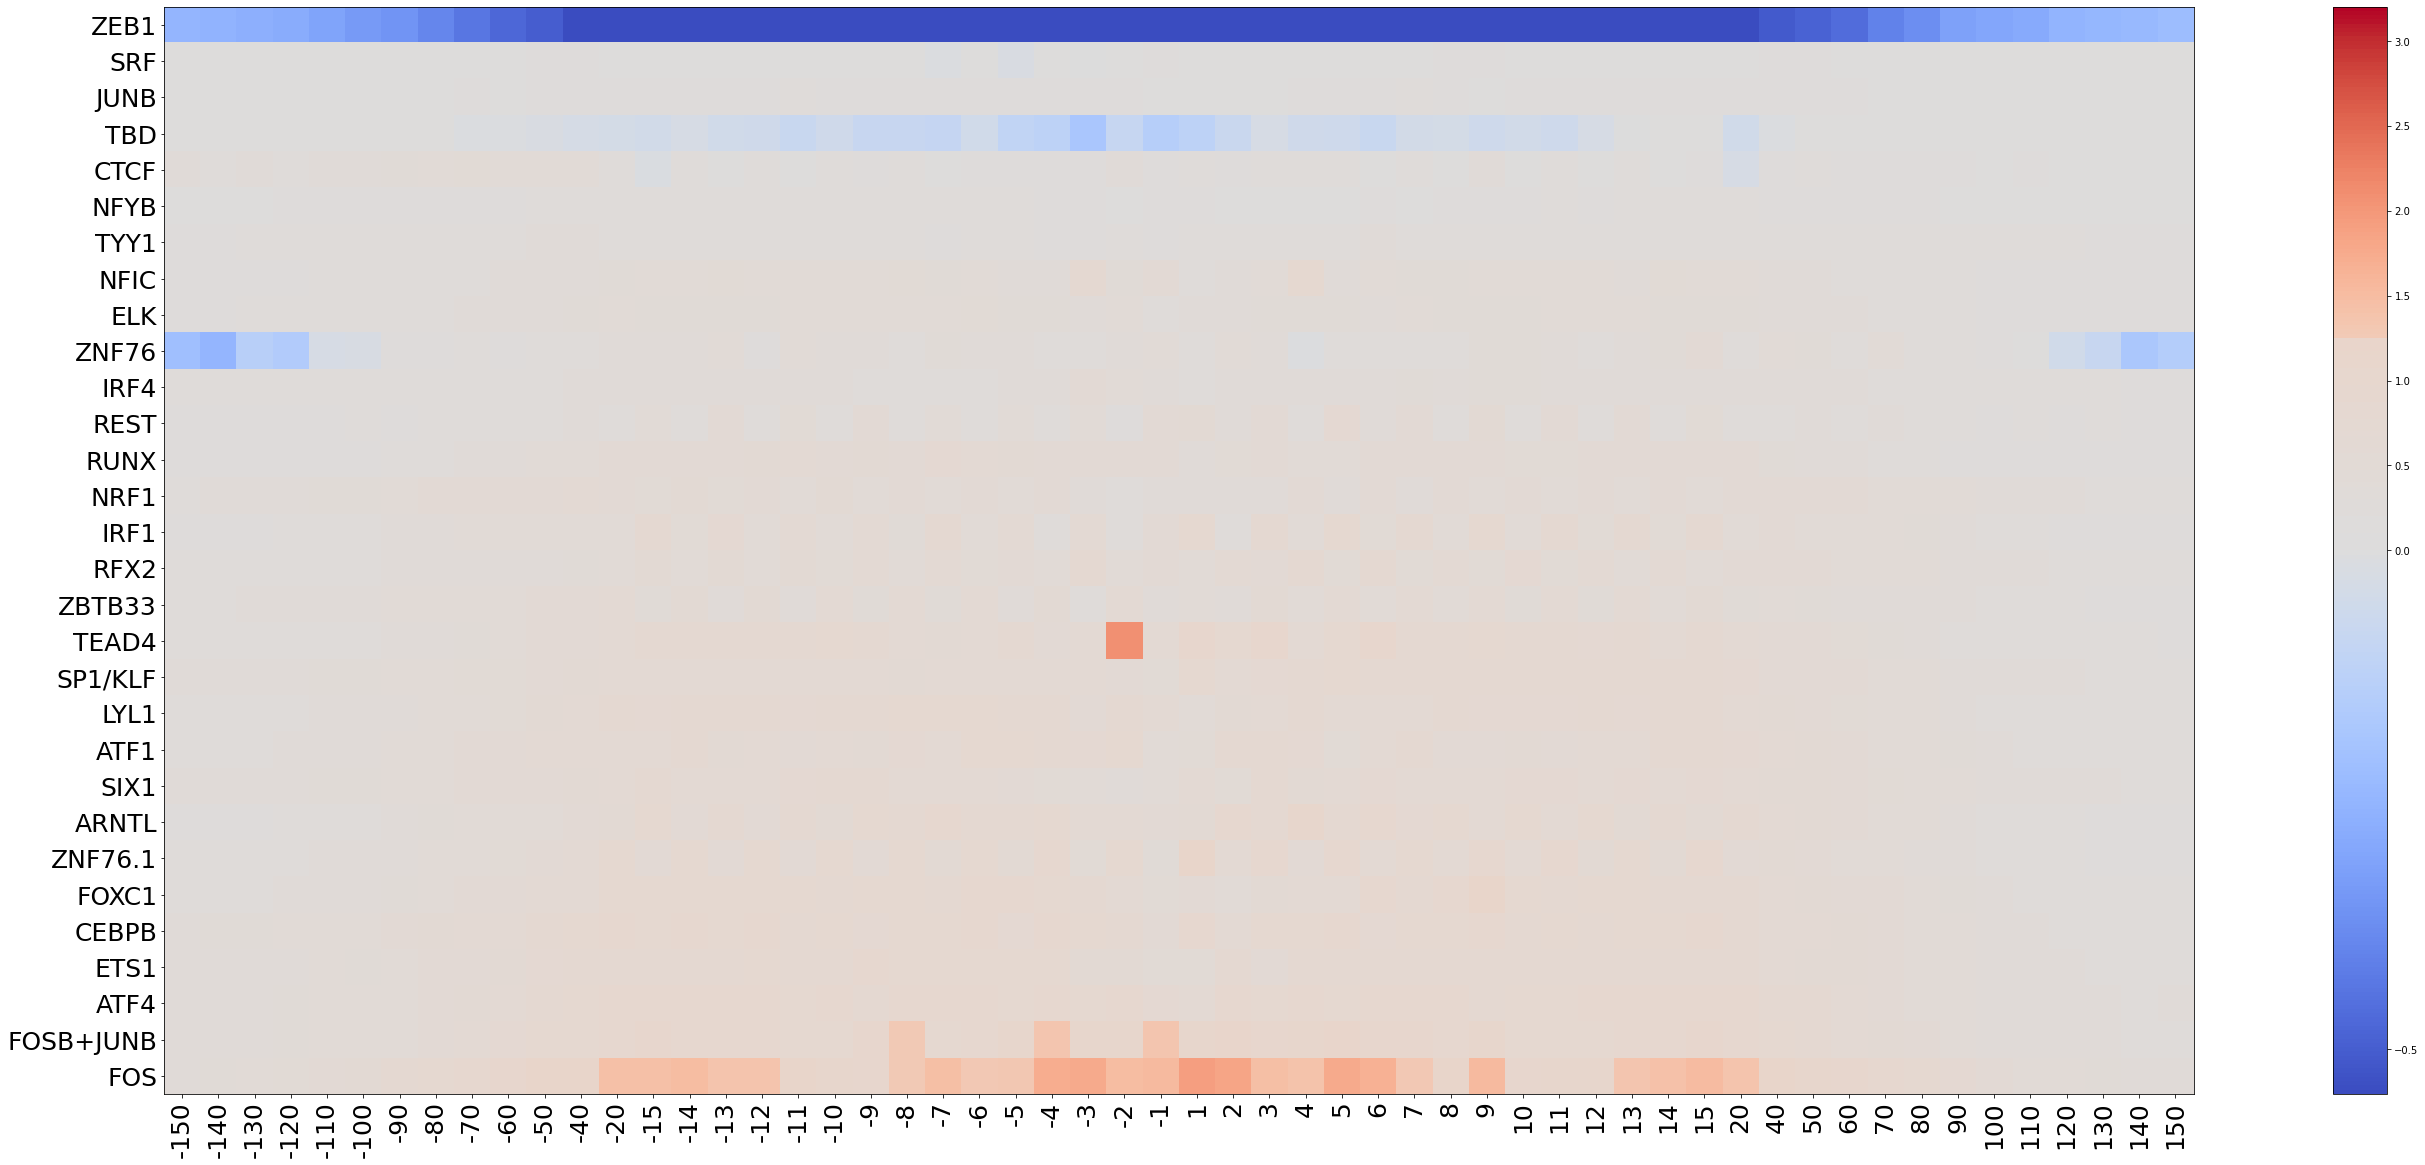

ATF1


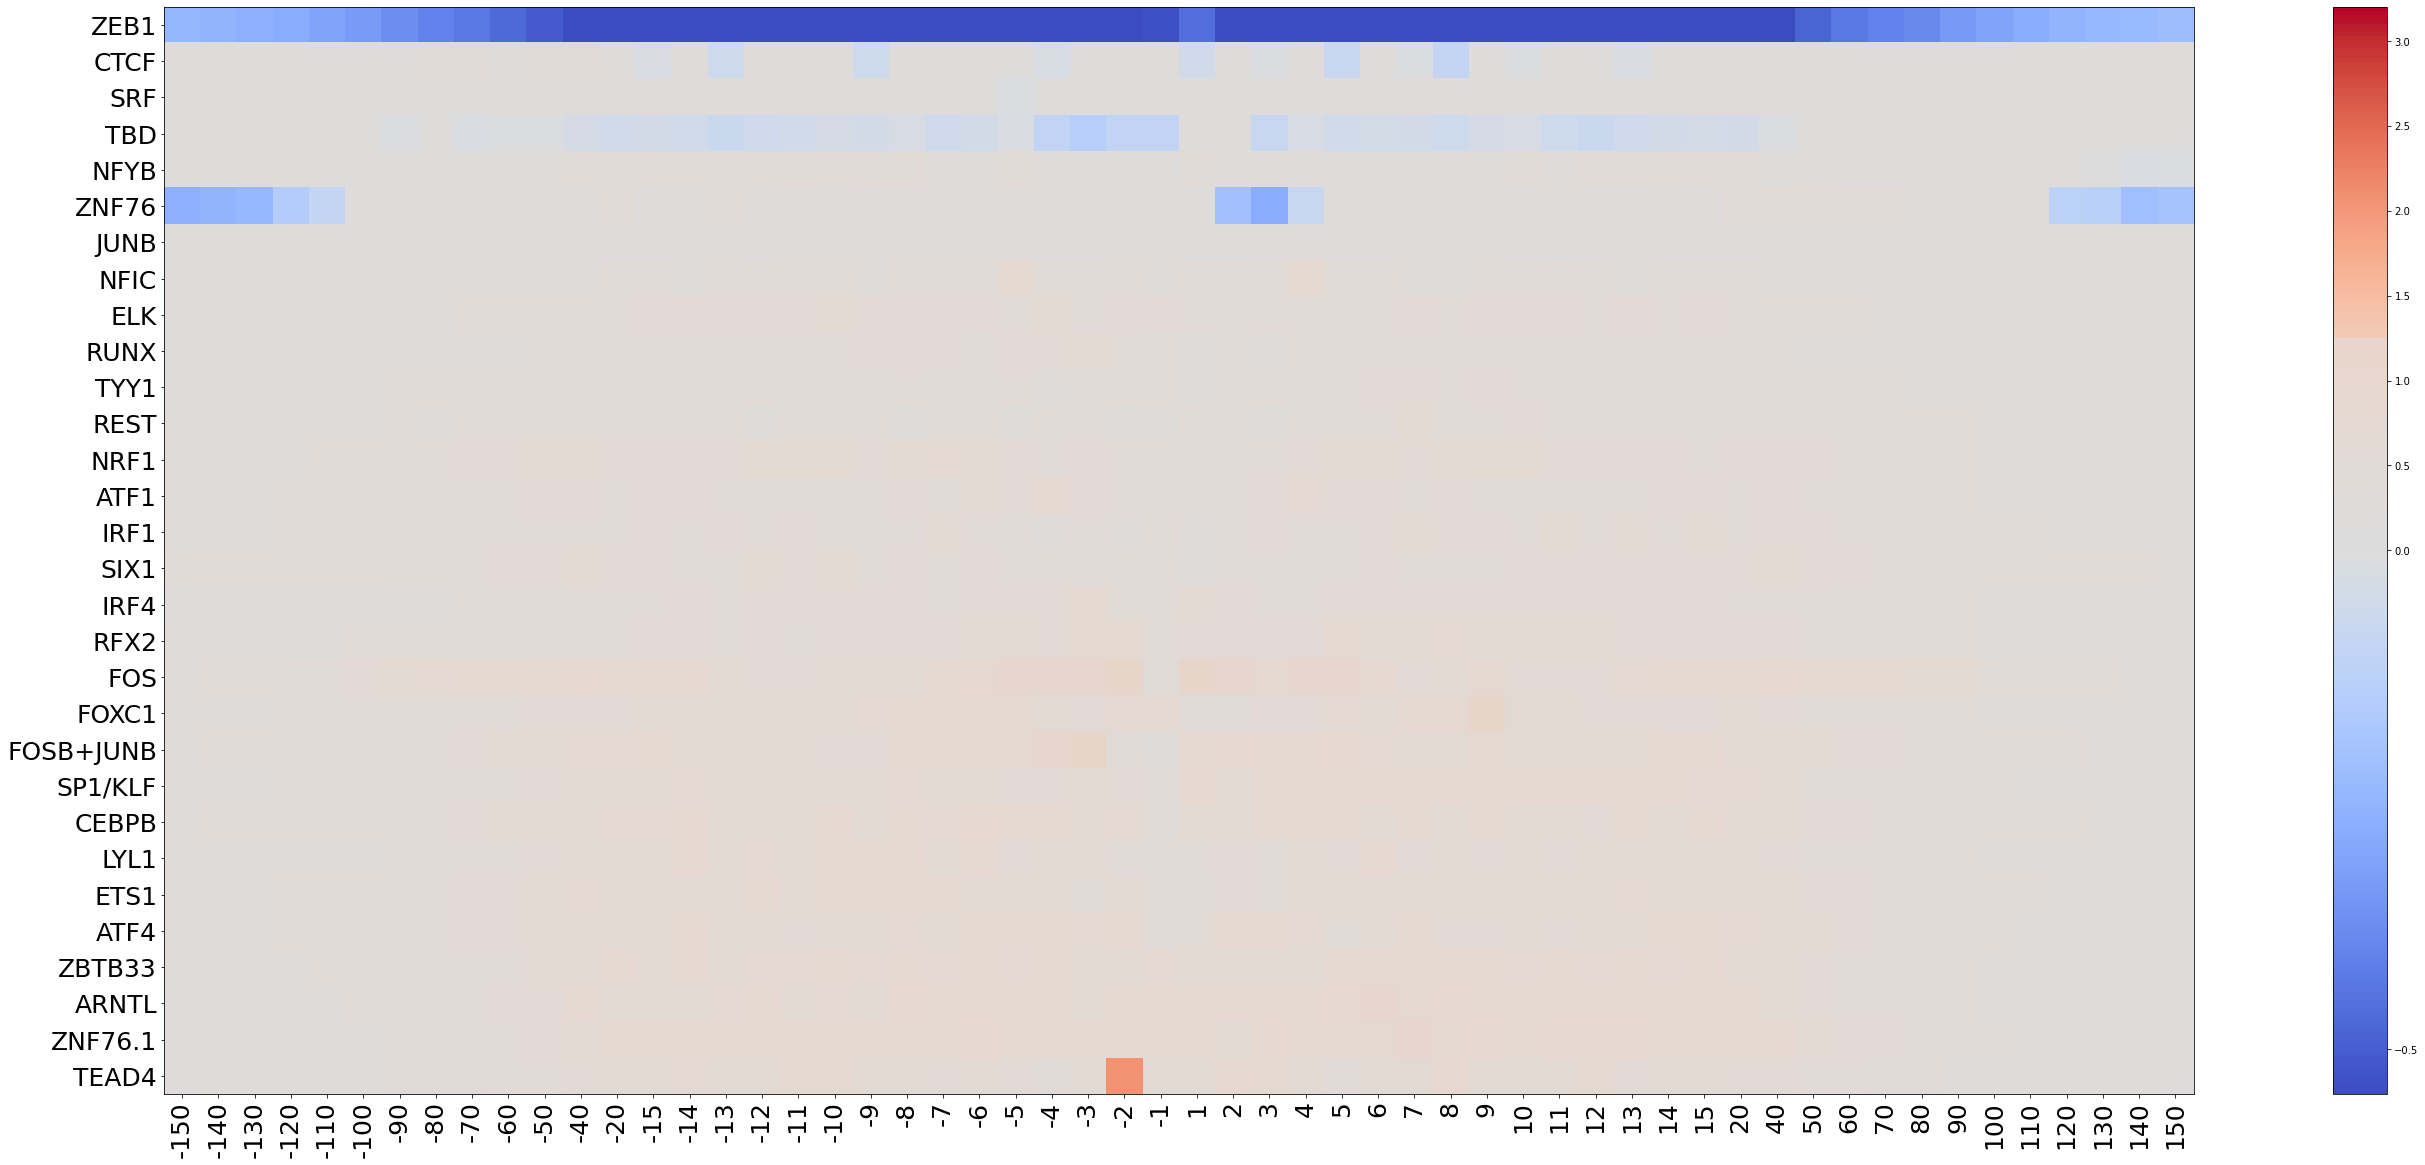

TEAD4


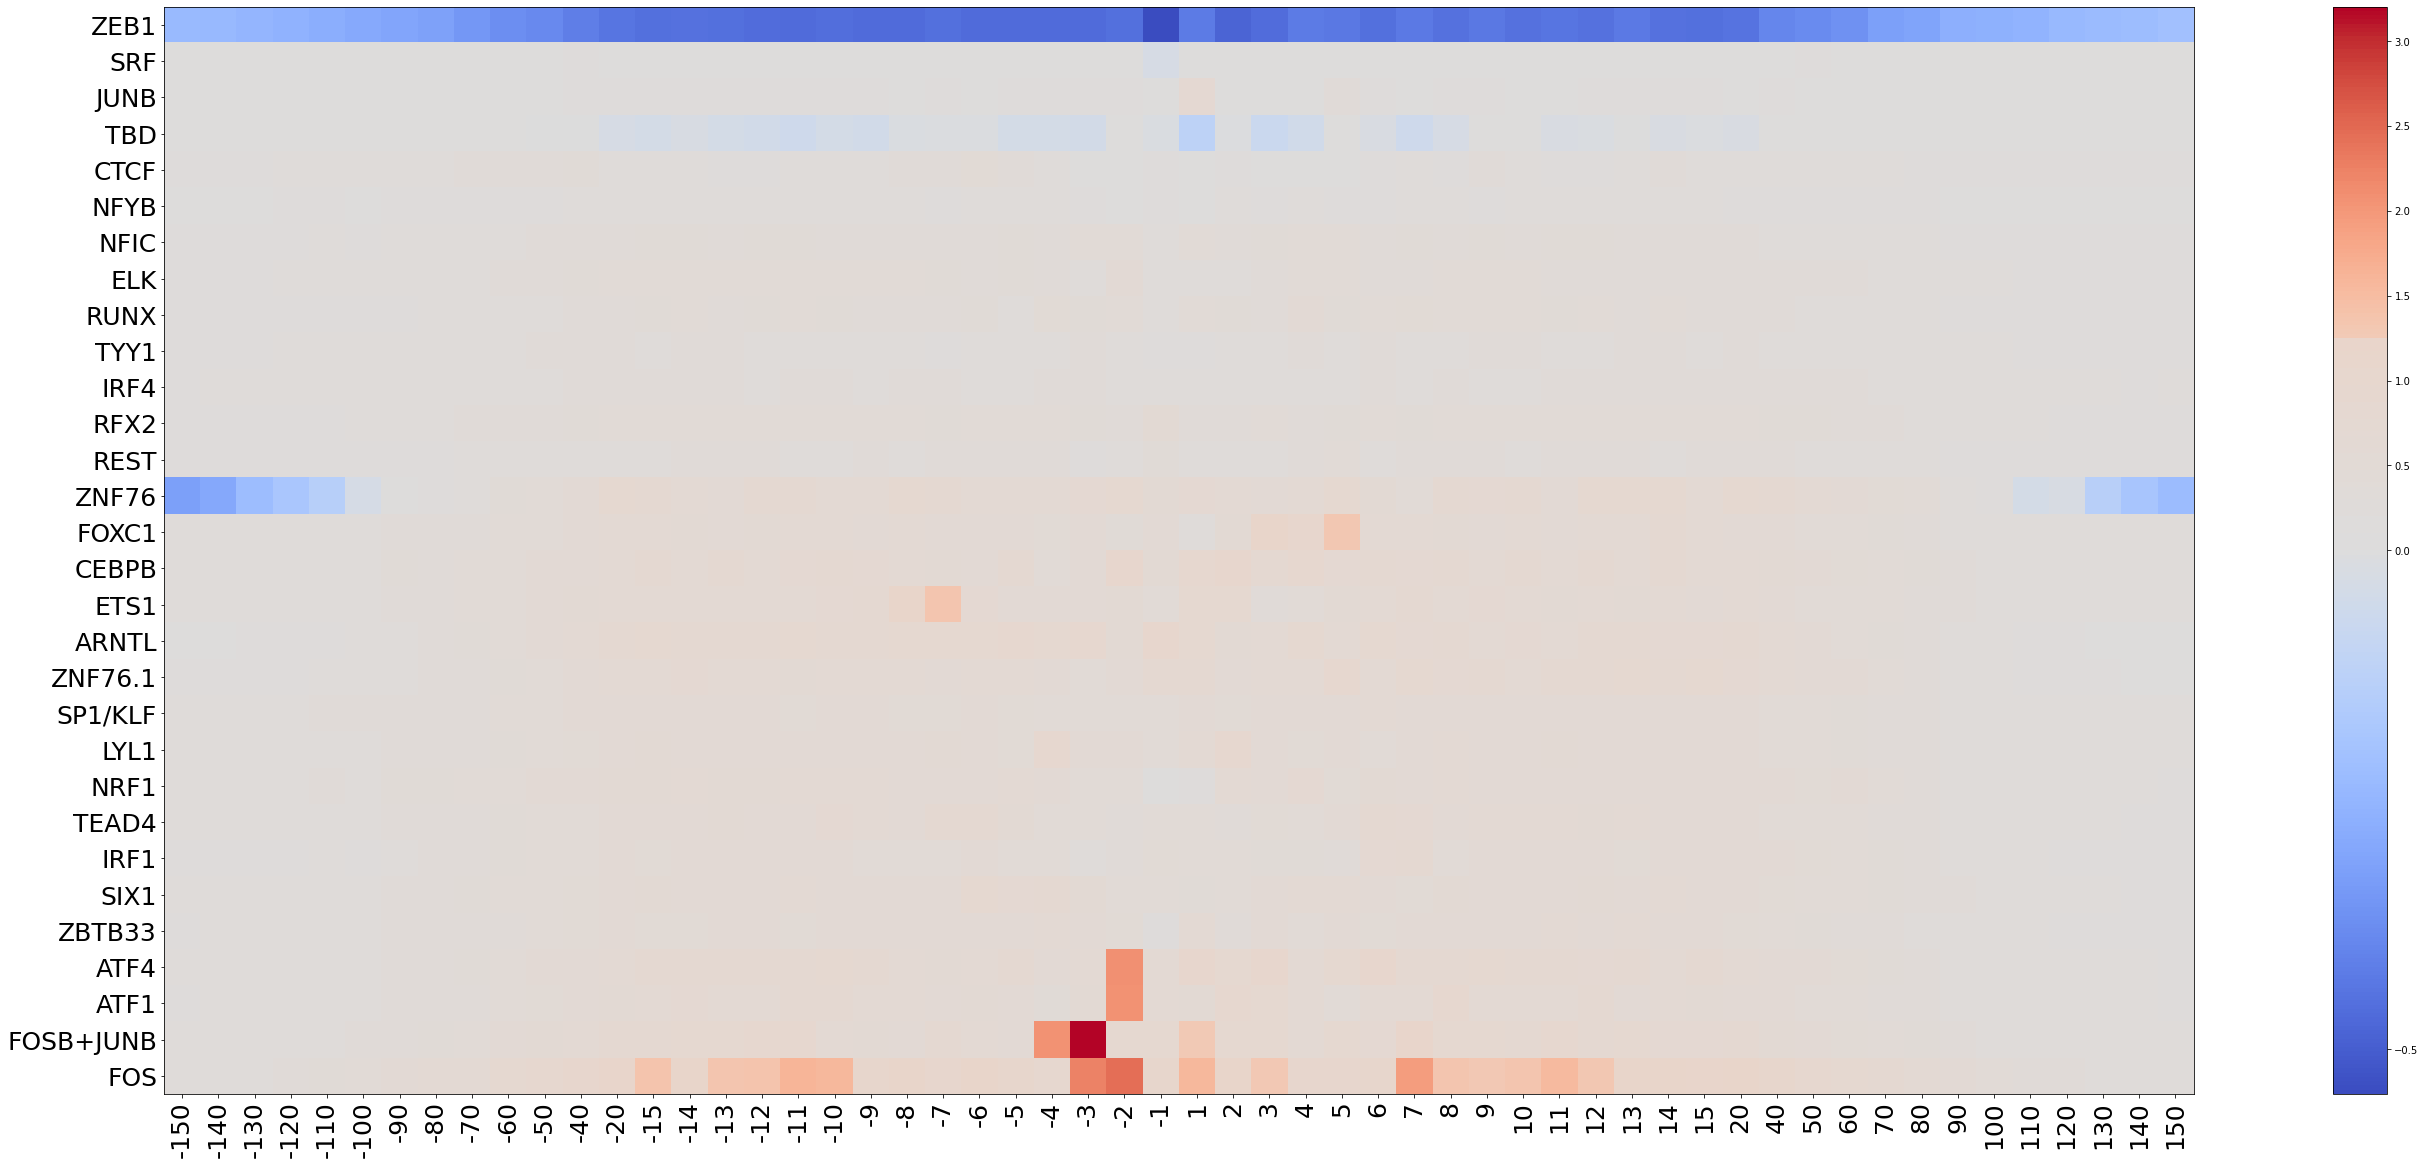

IRF1


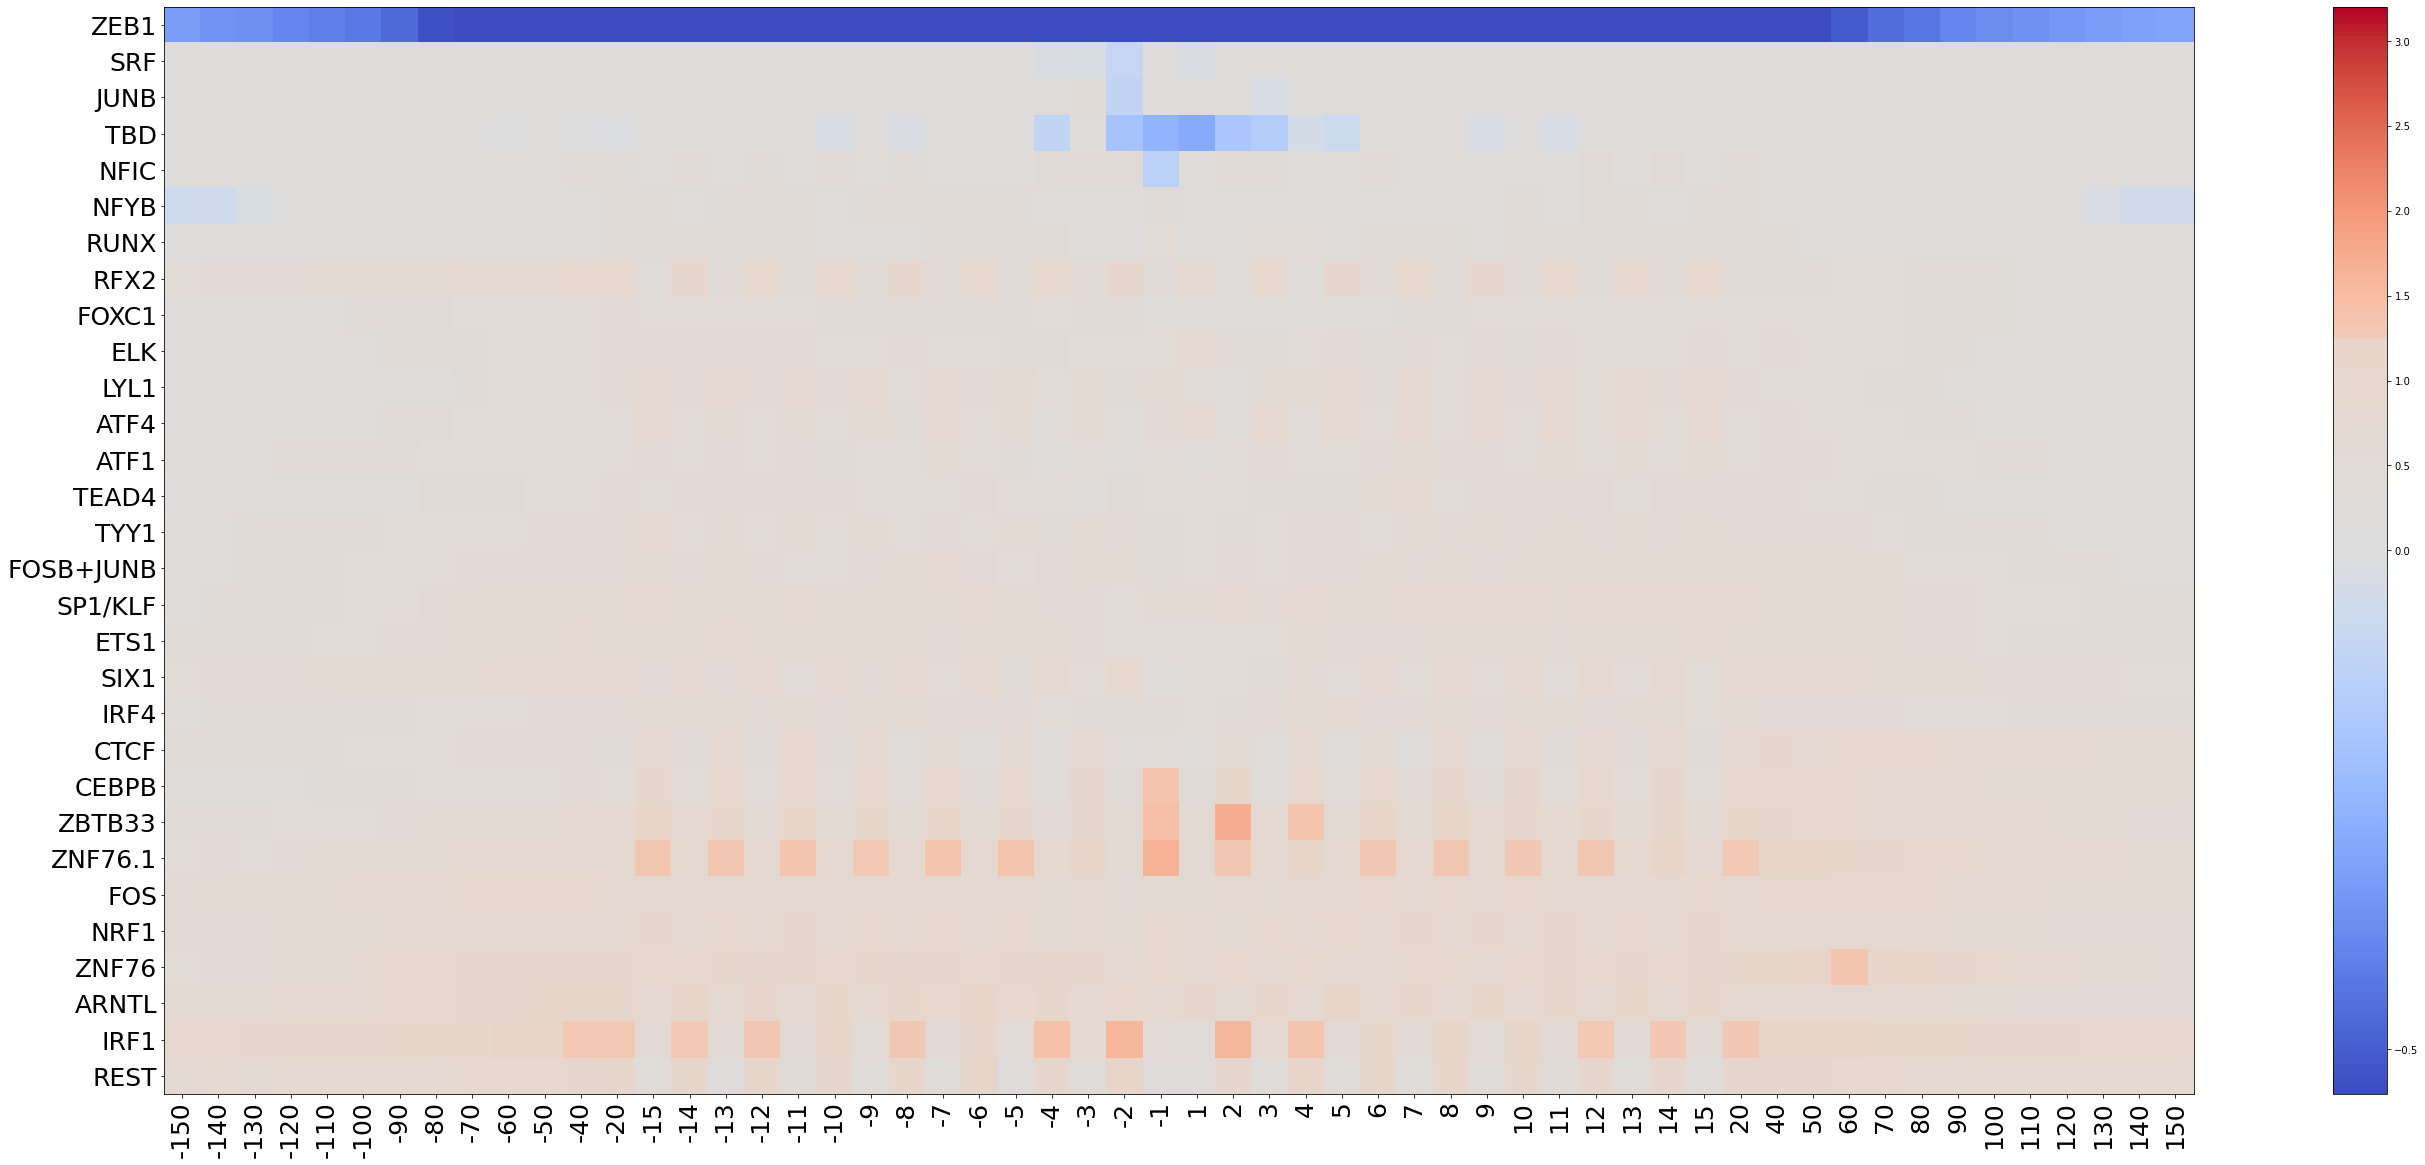

ZNF76


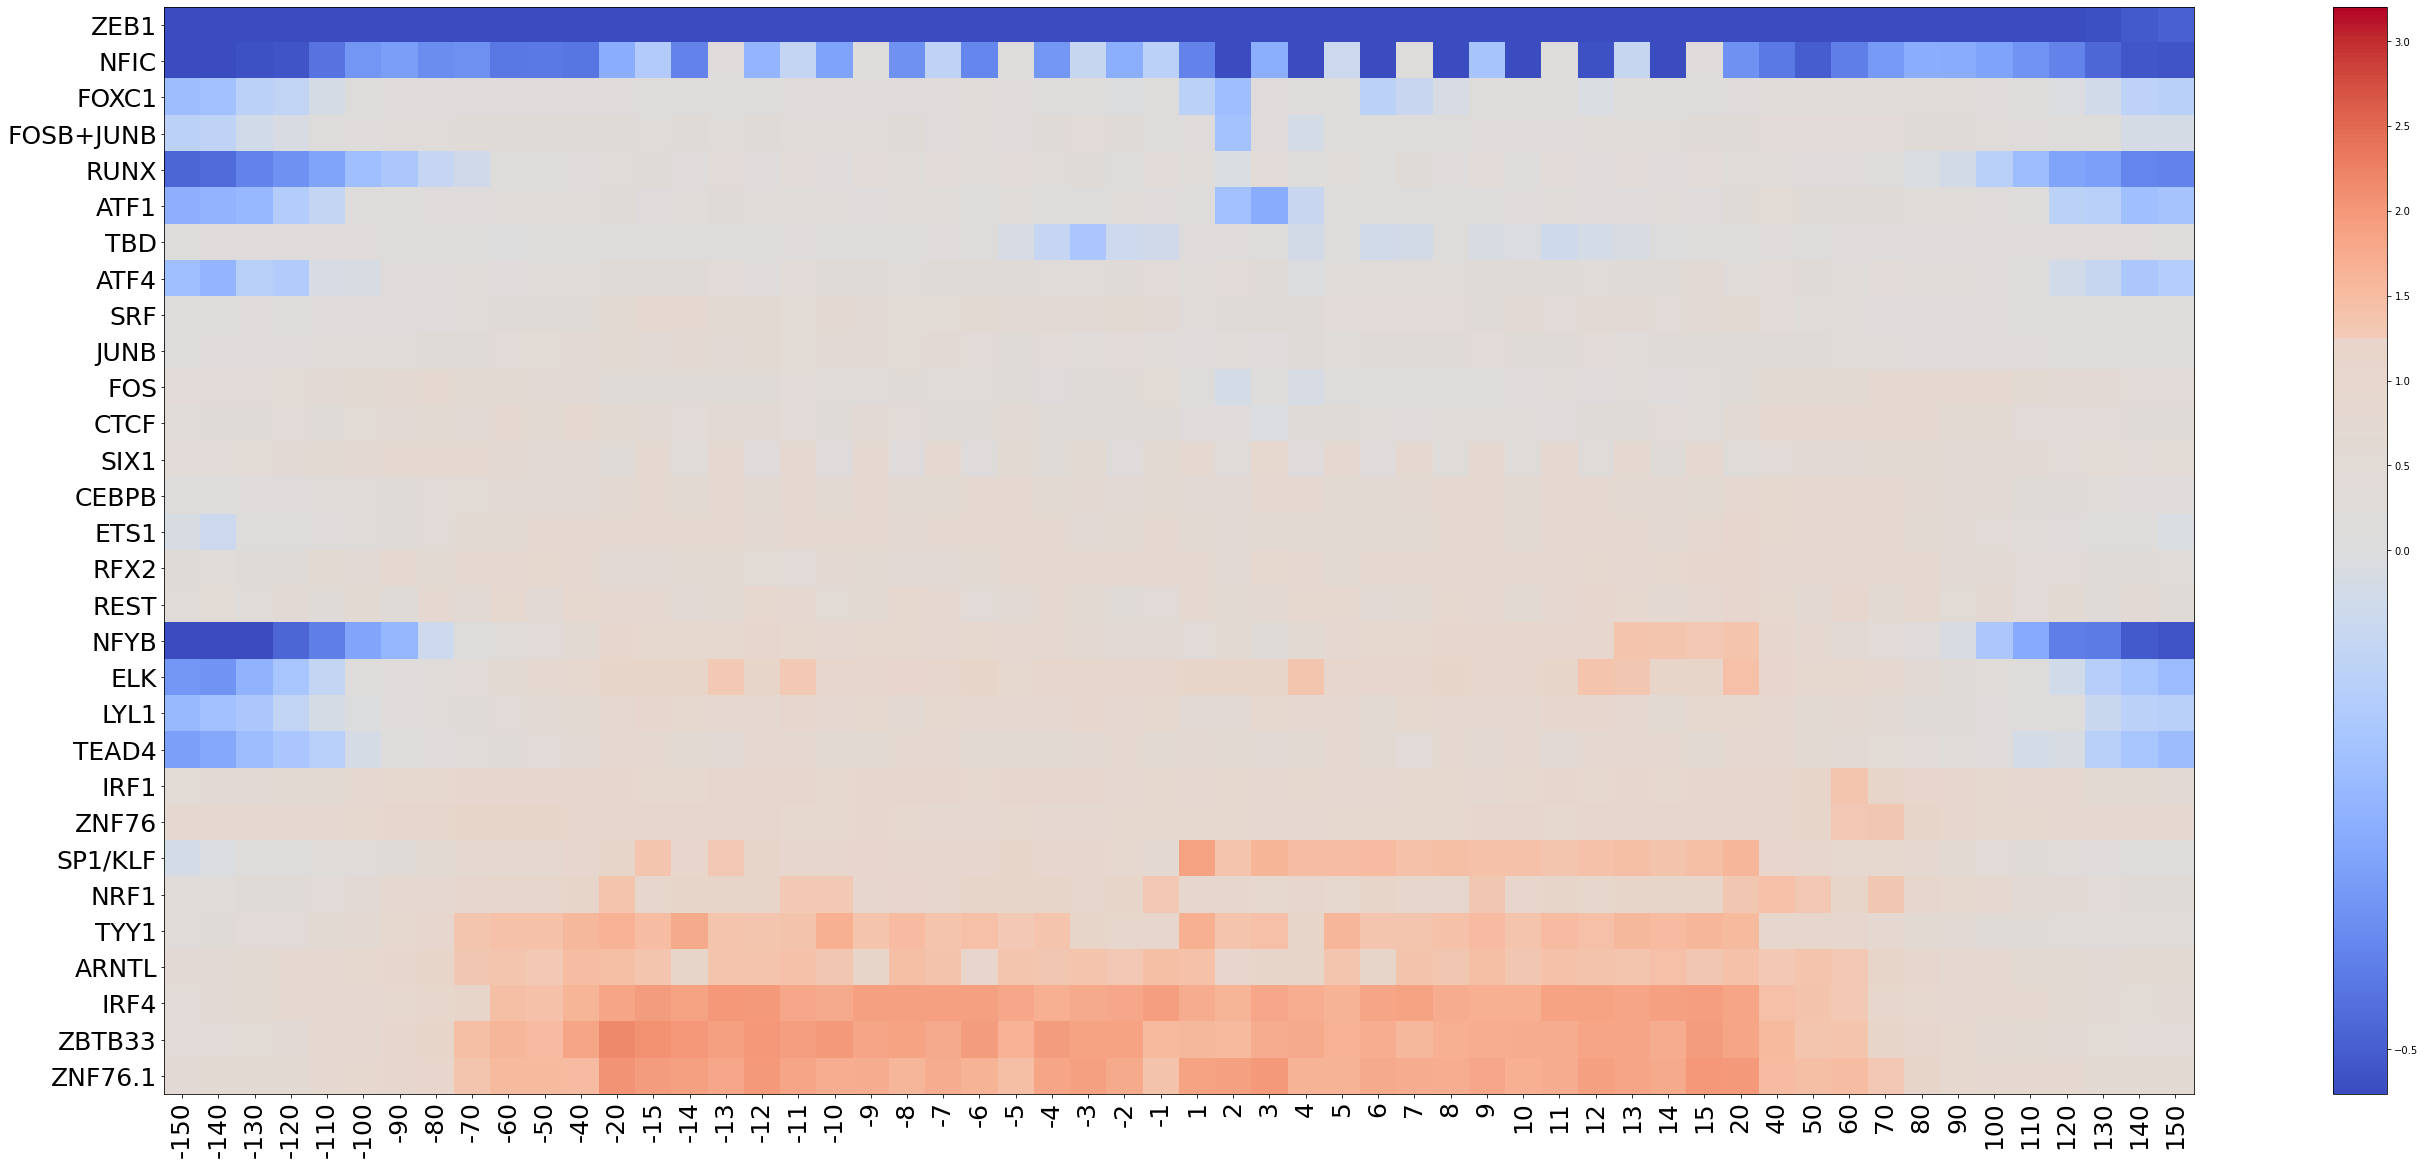

SIX1


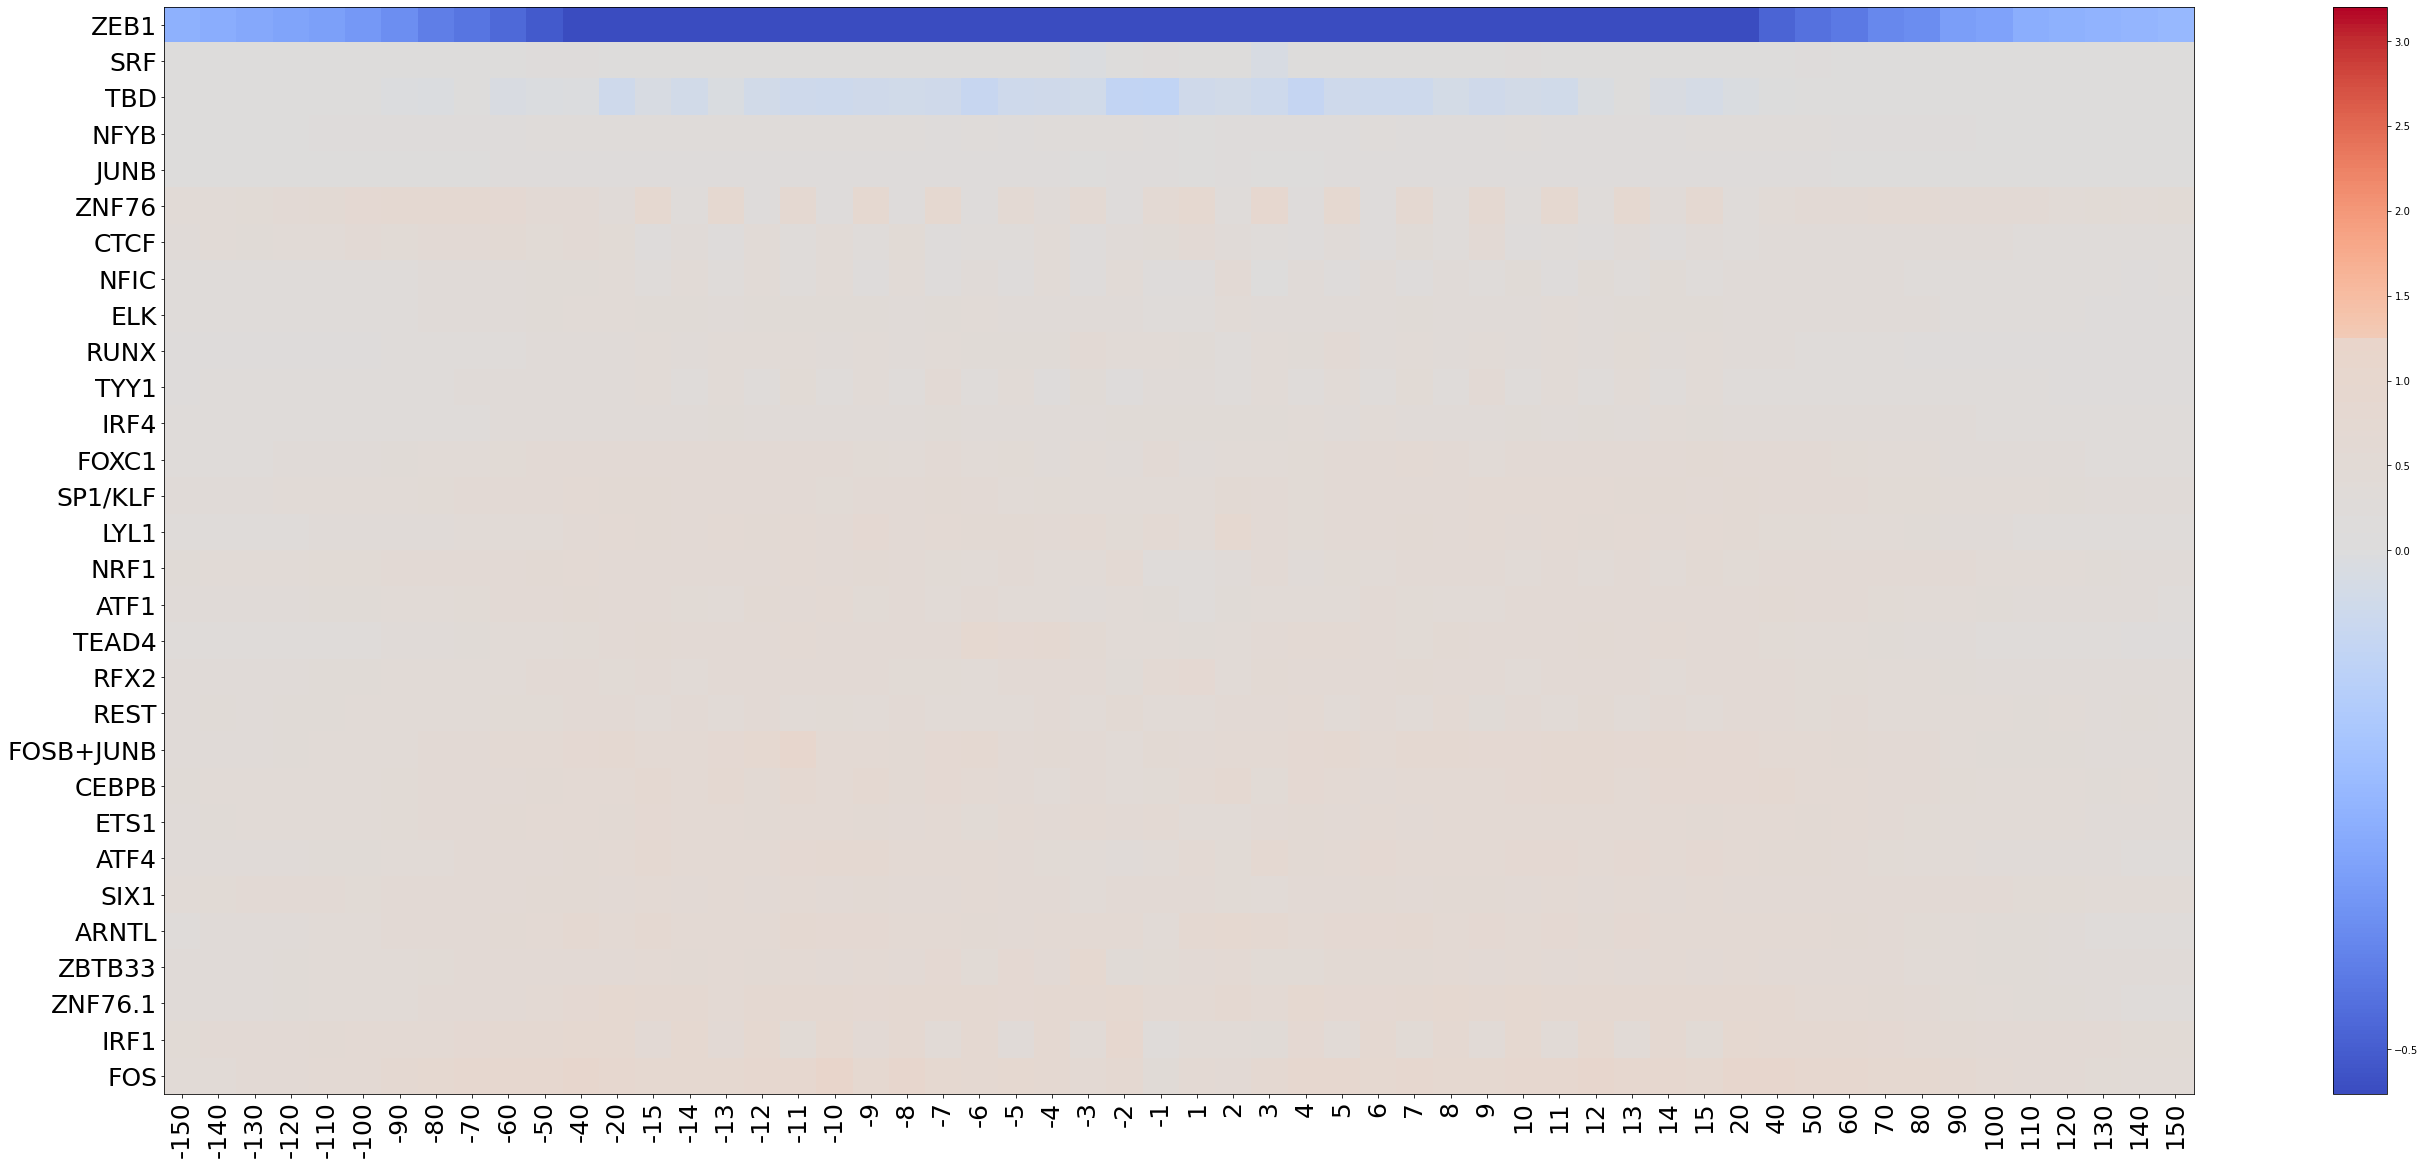

TYY1


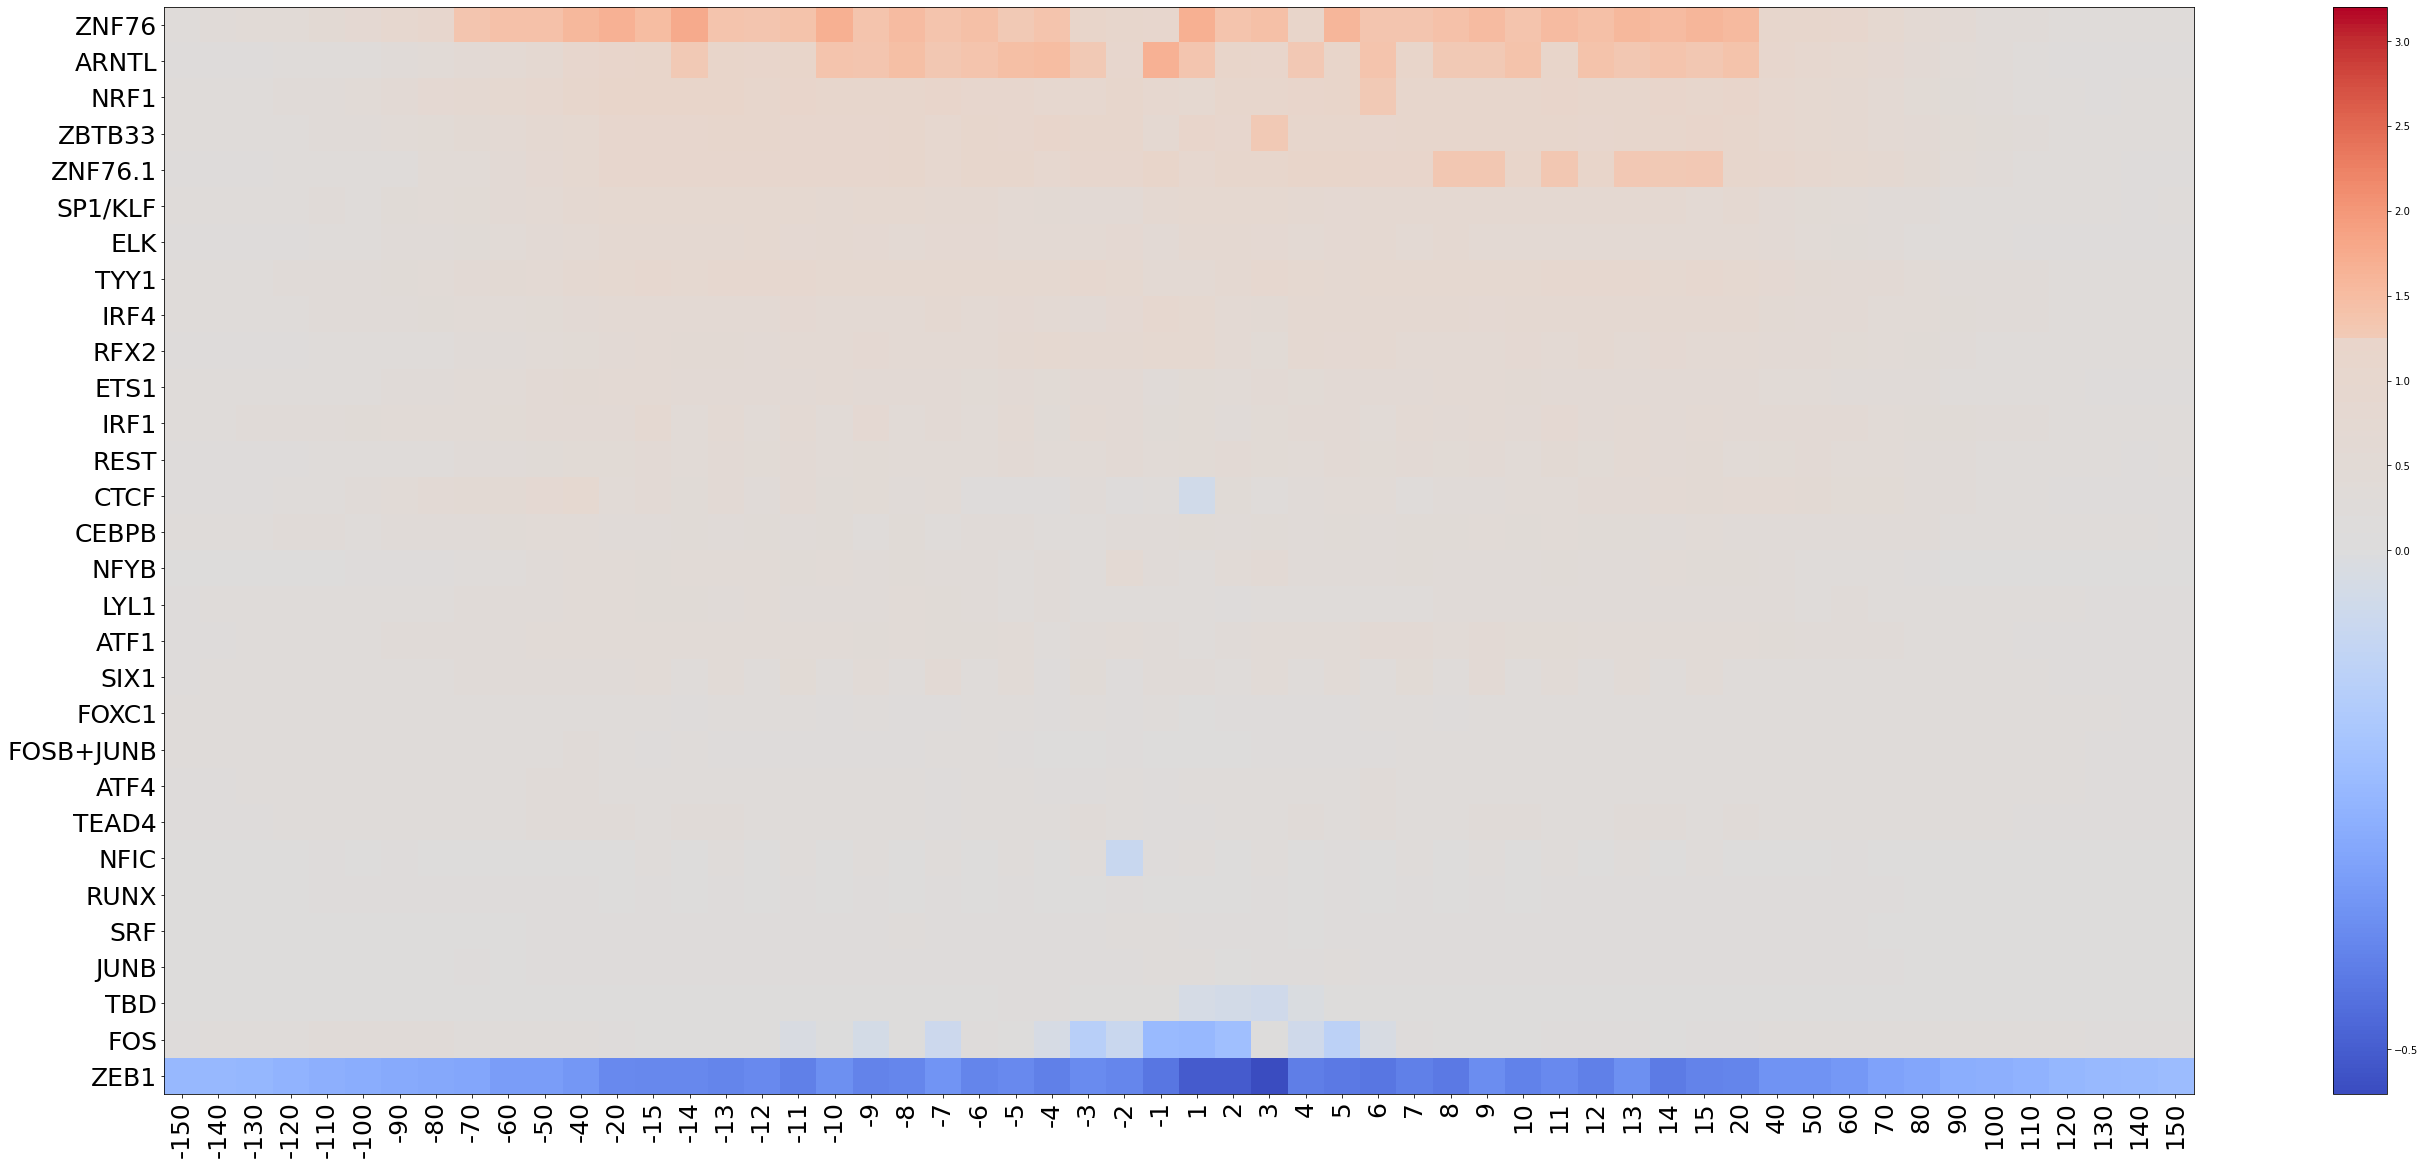

ARNTL


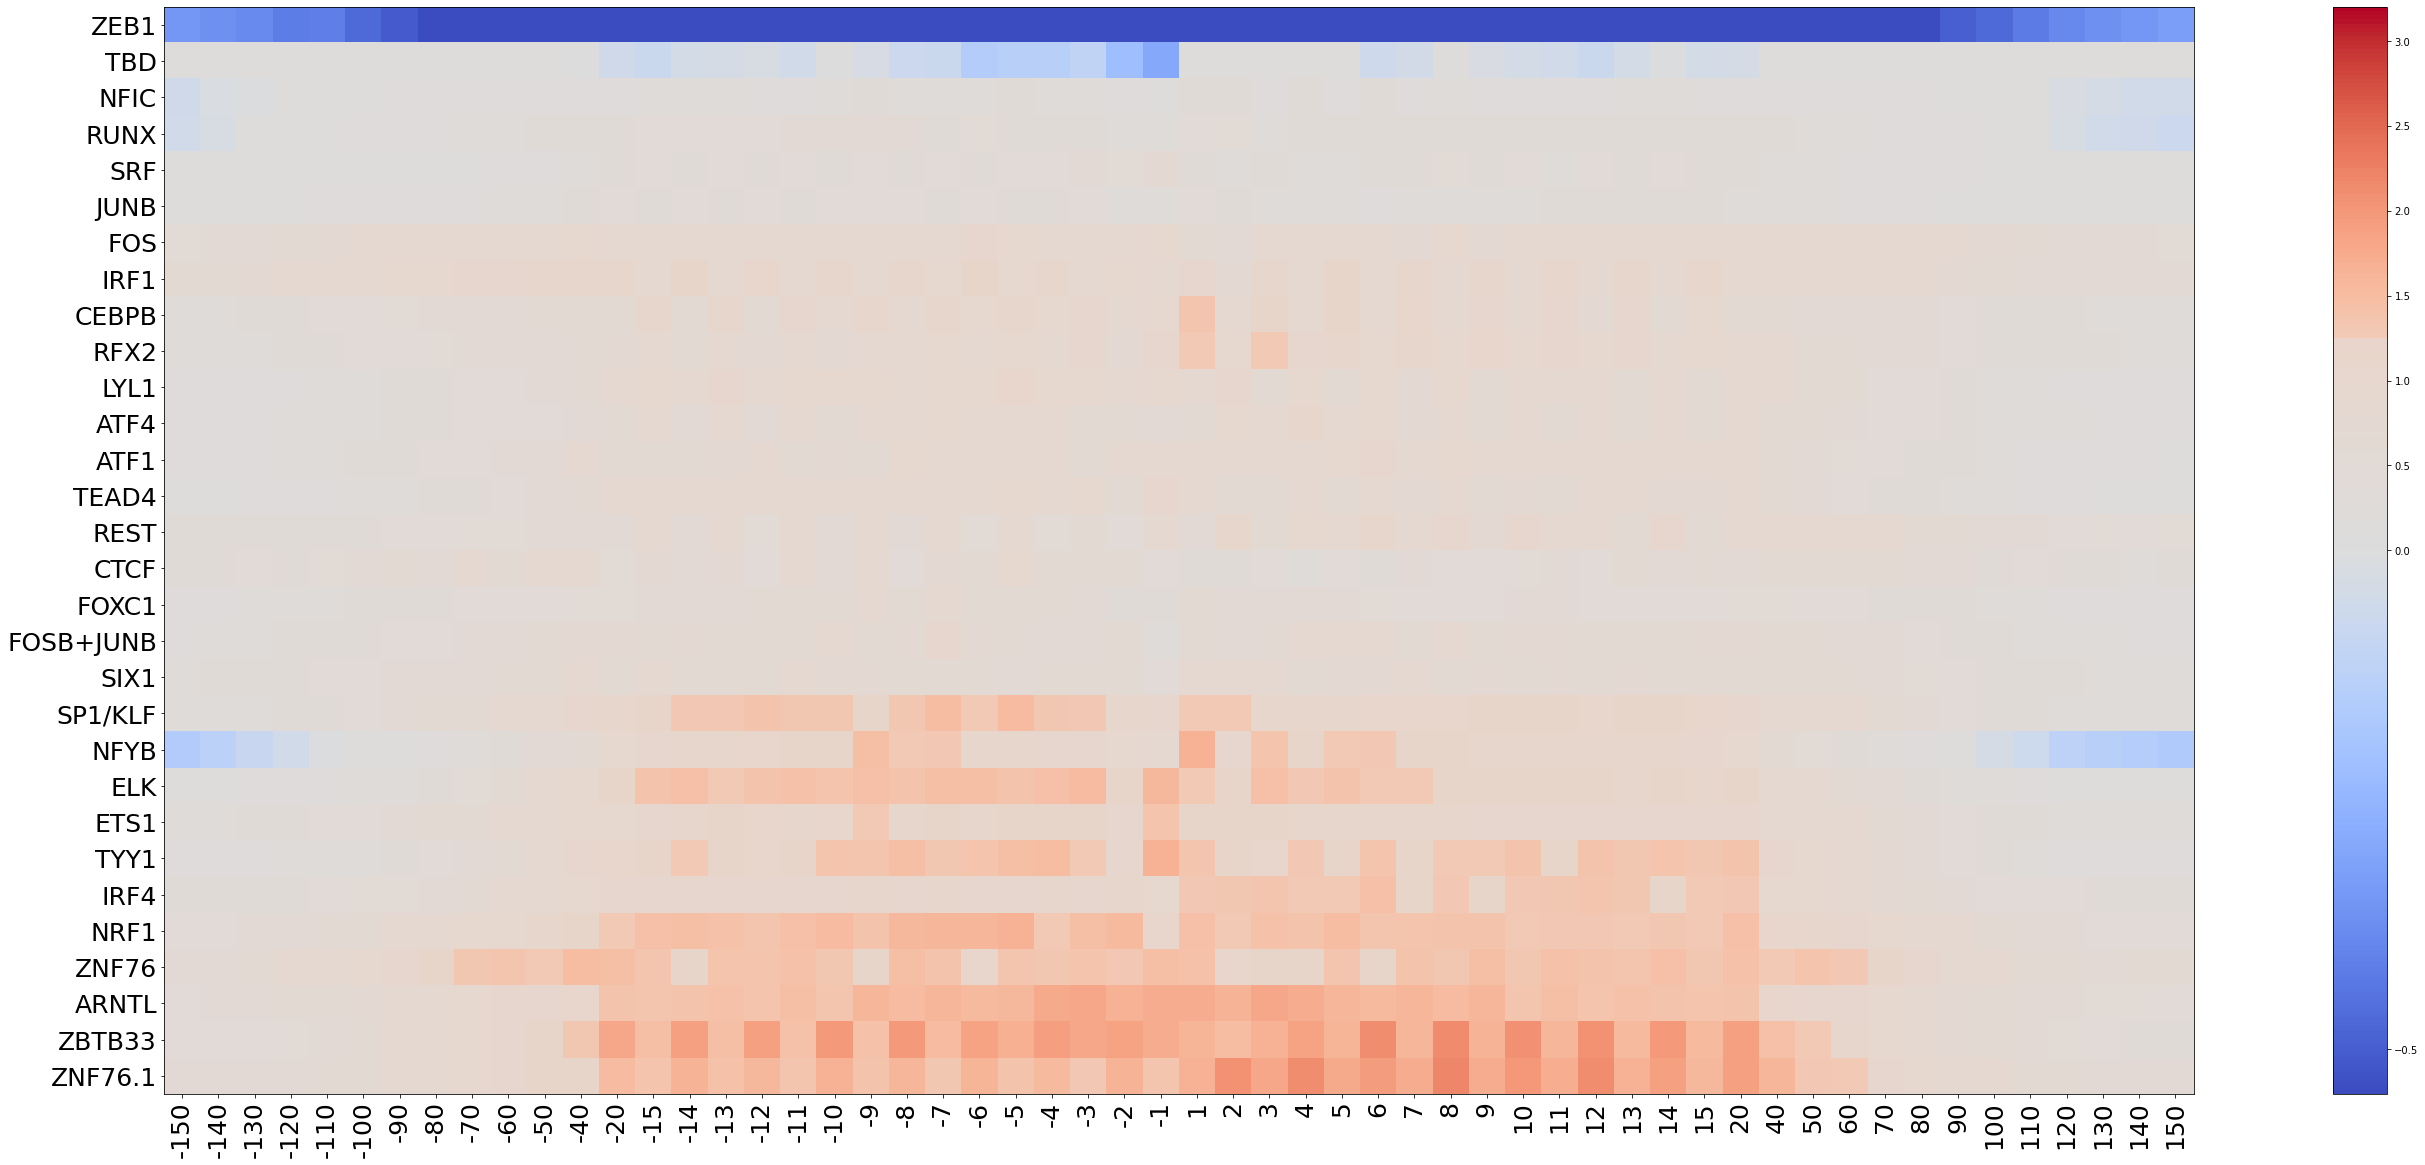

SRF


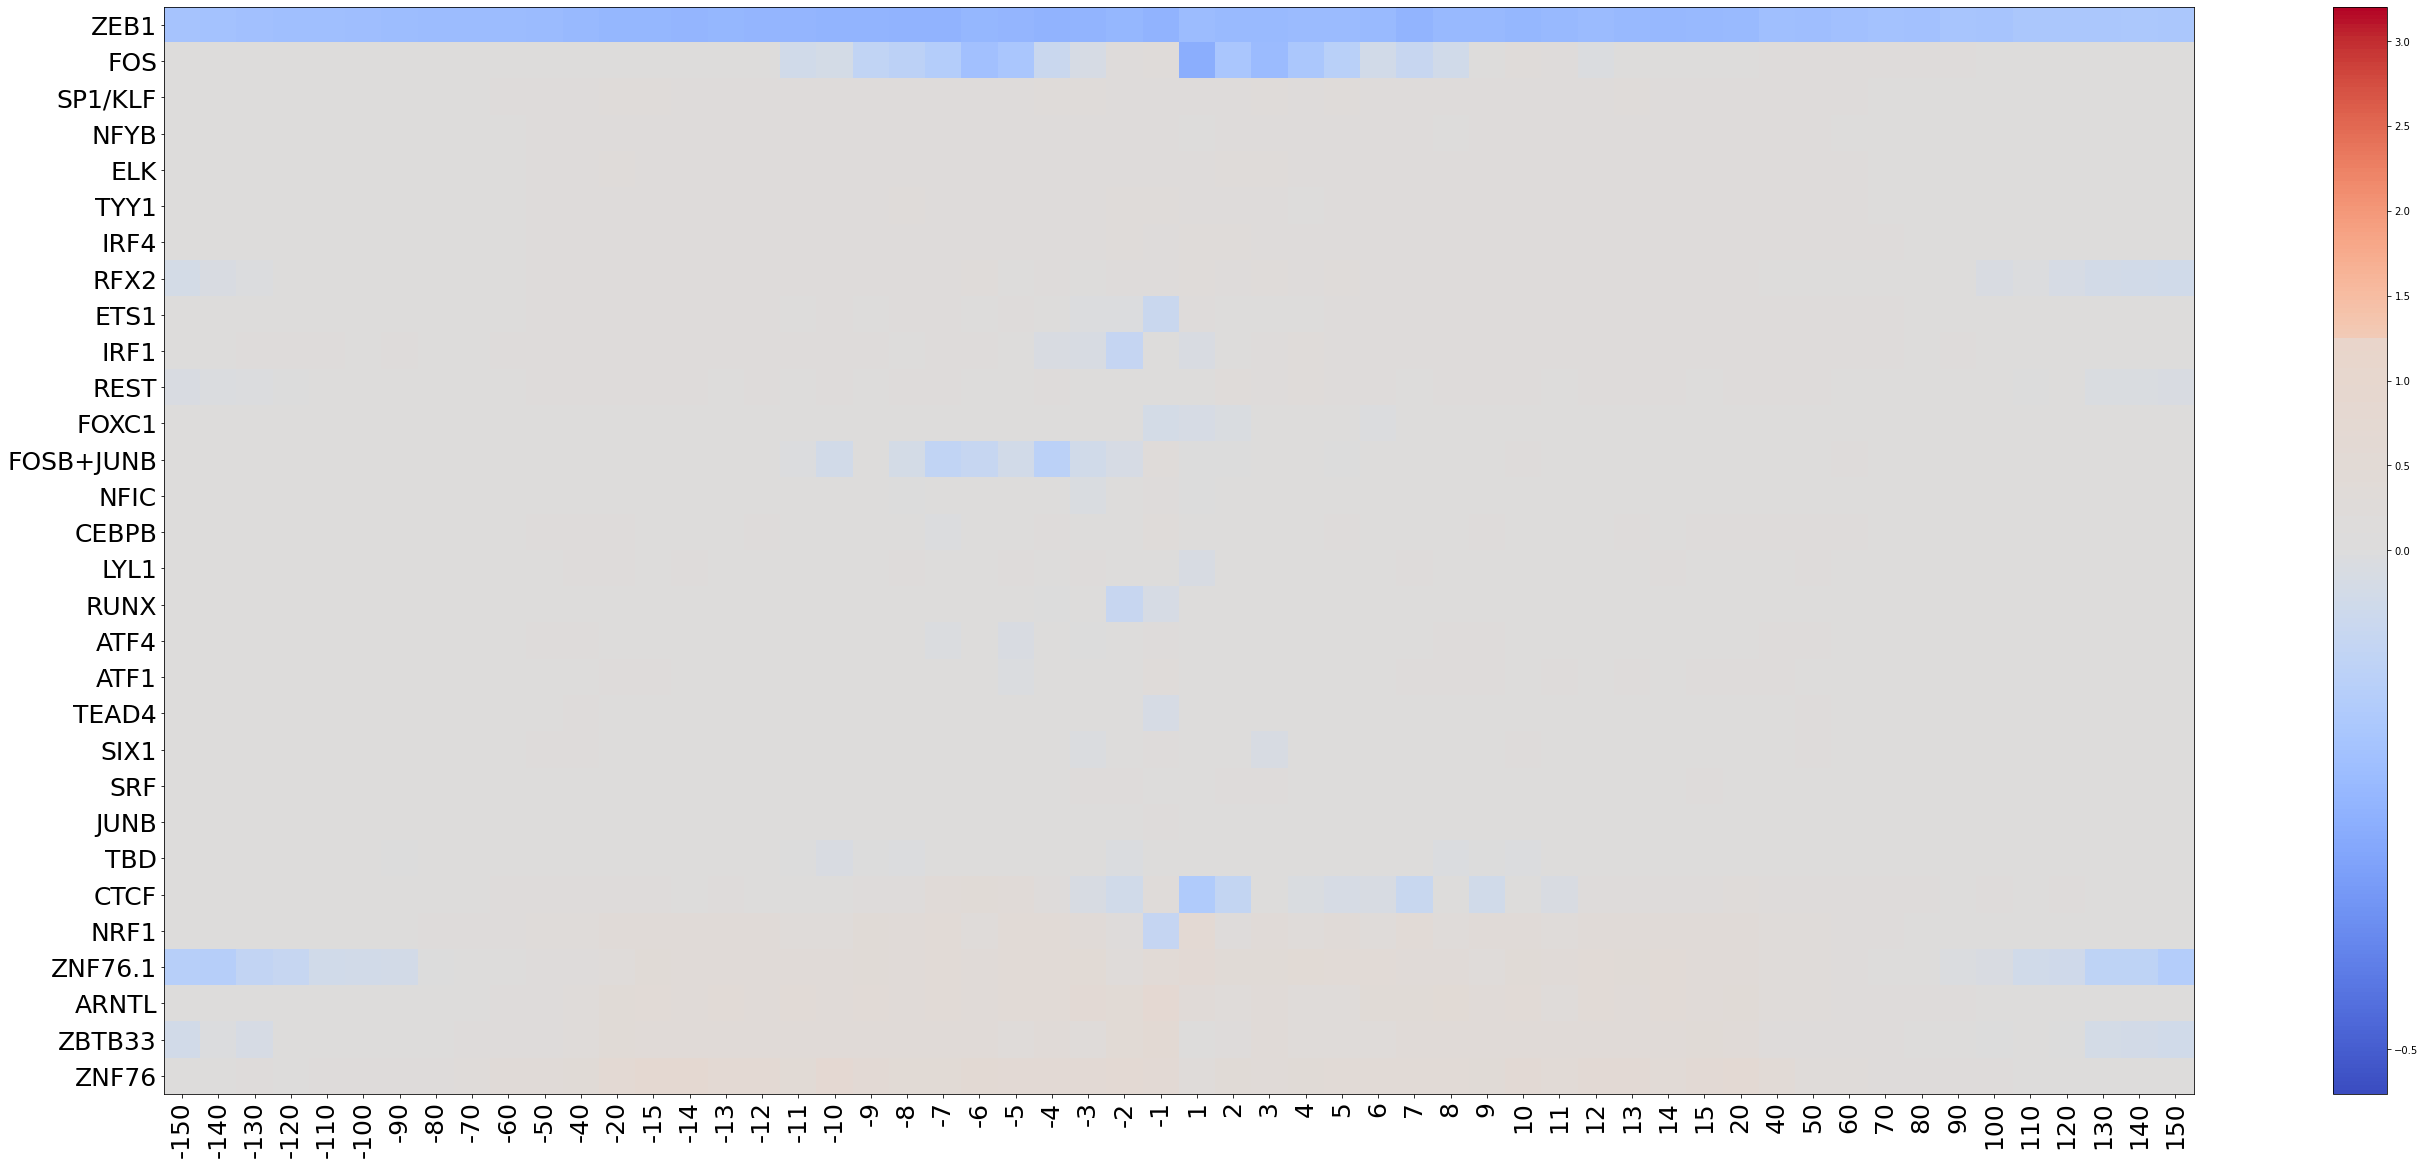

IRF4


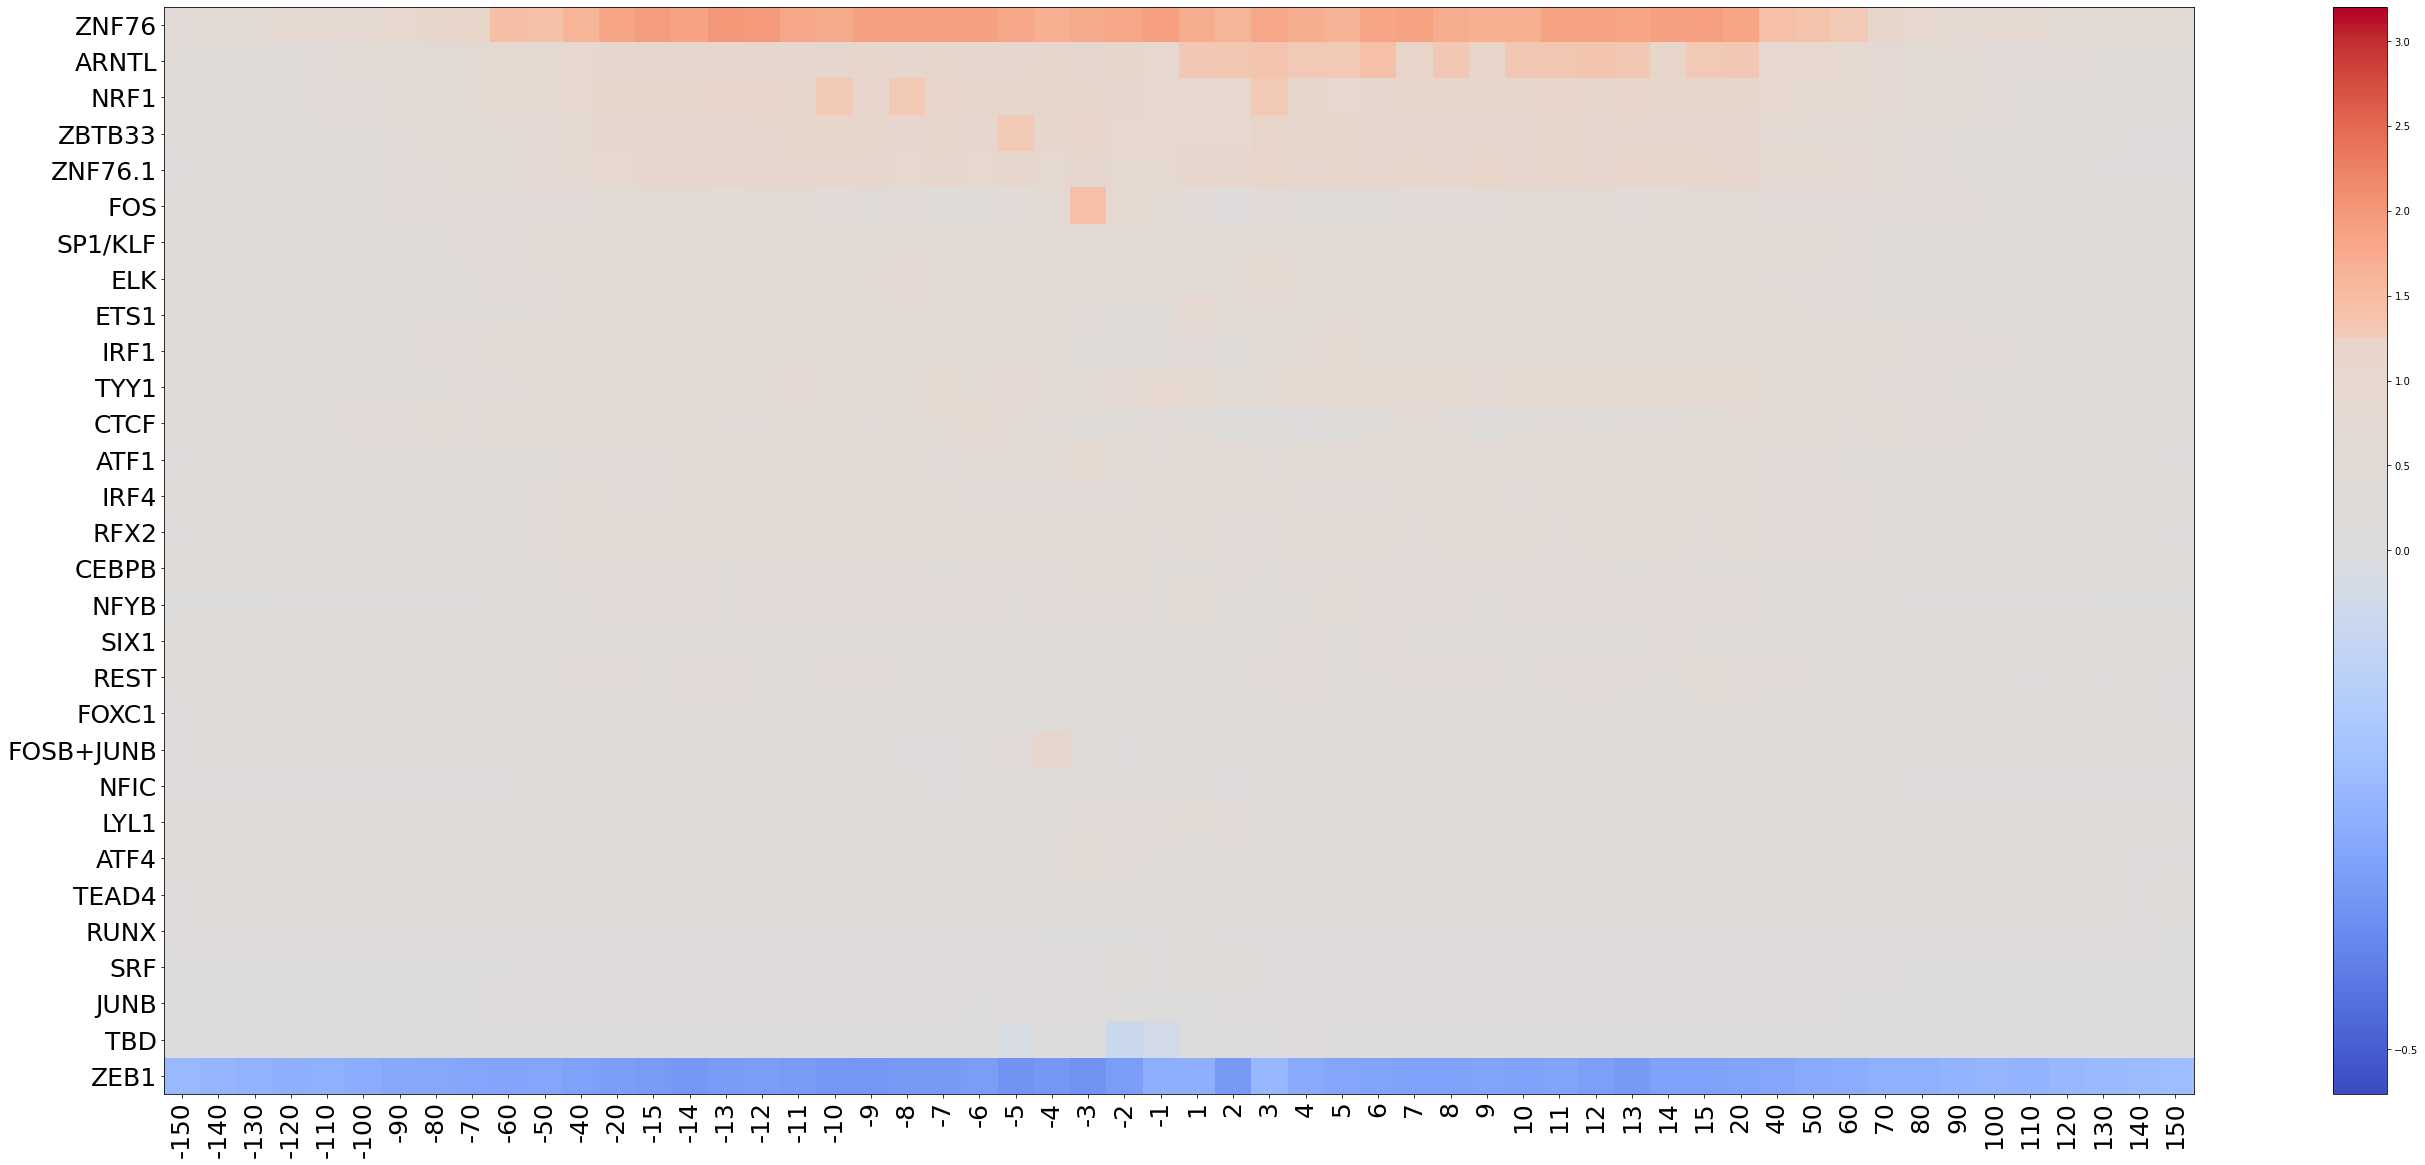

RFX2


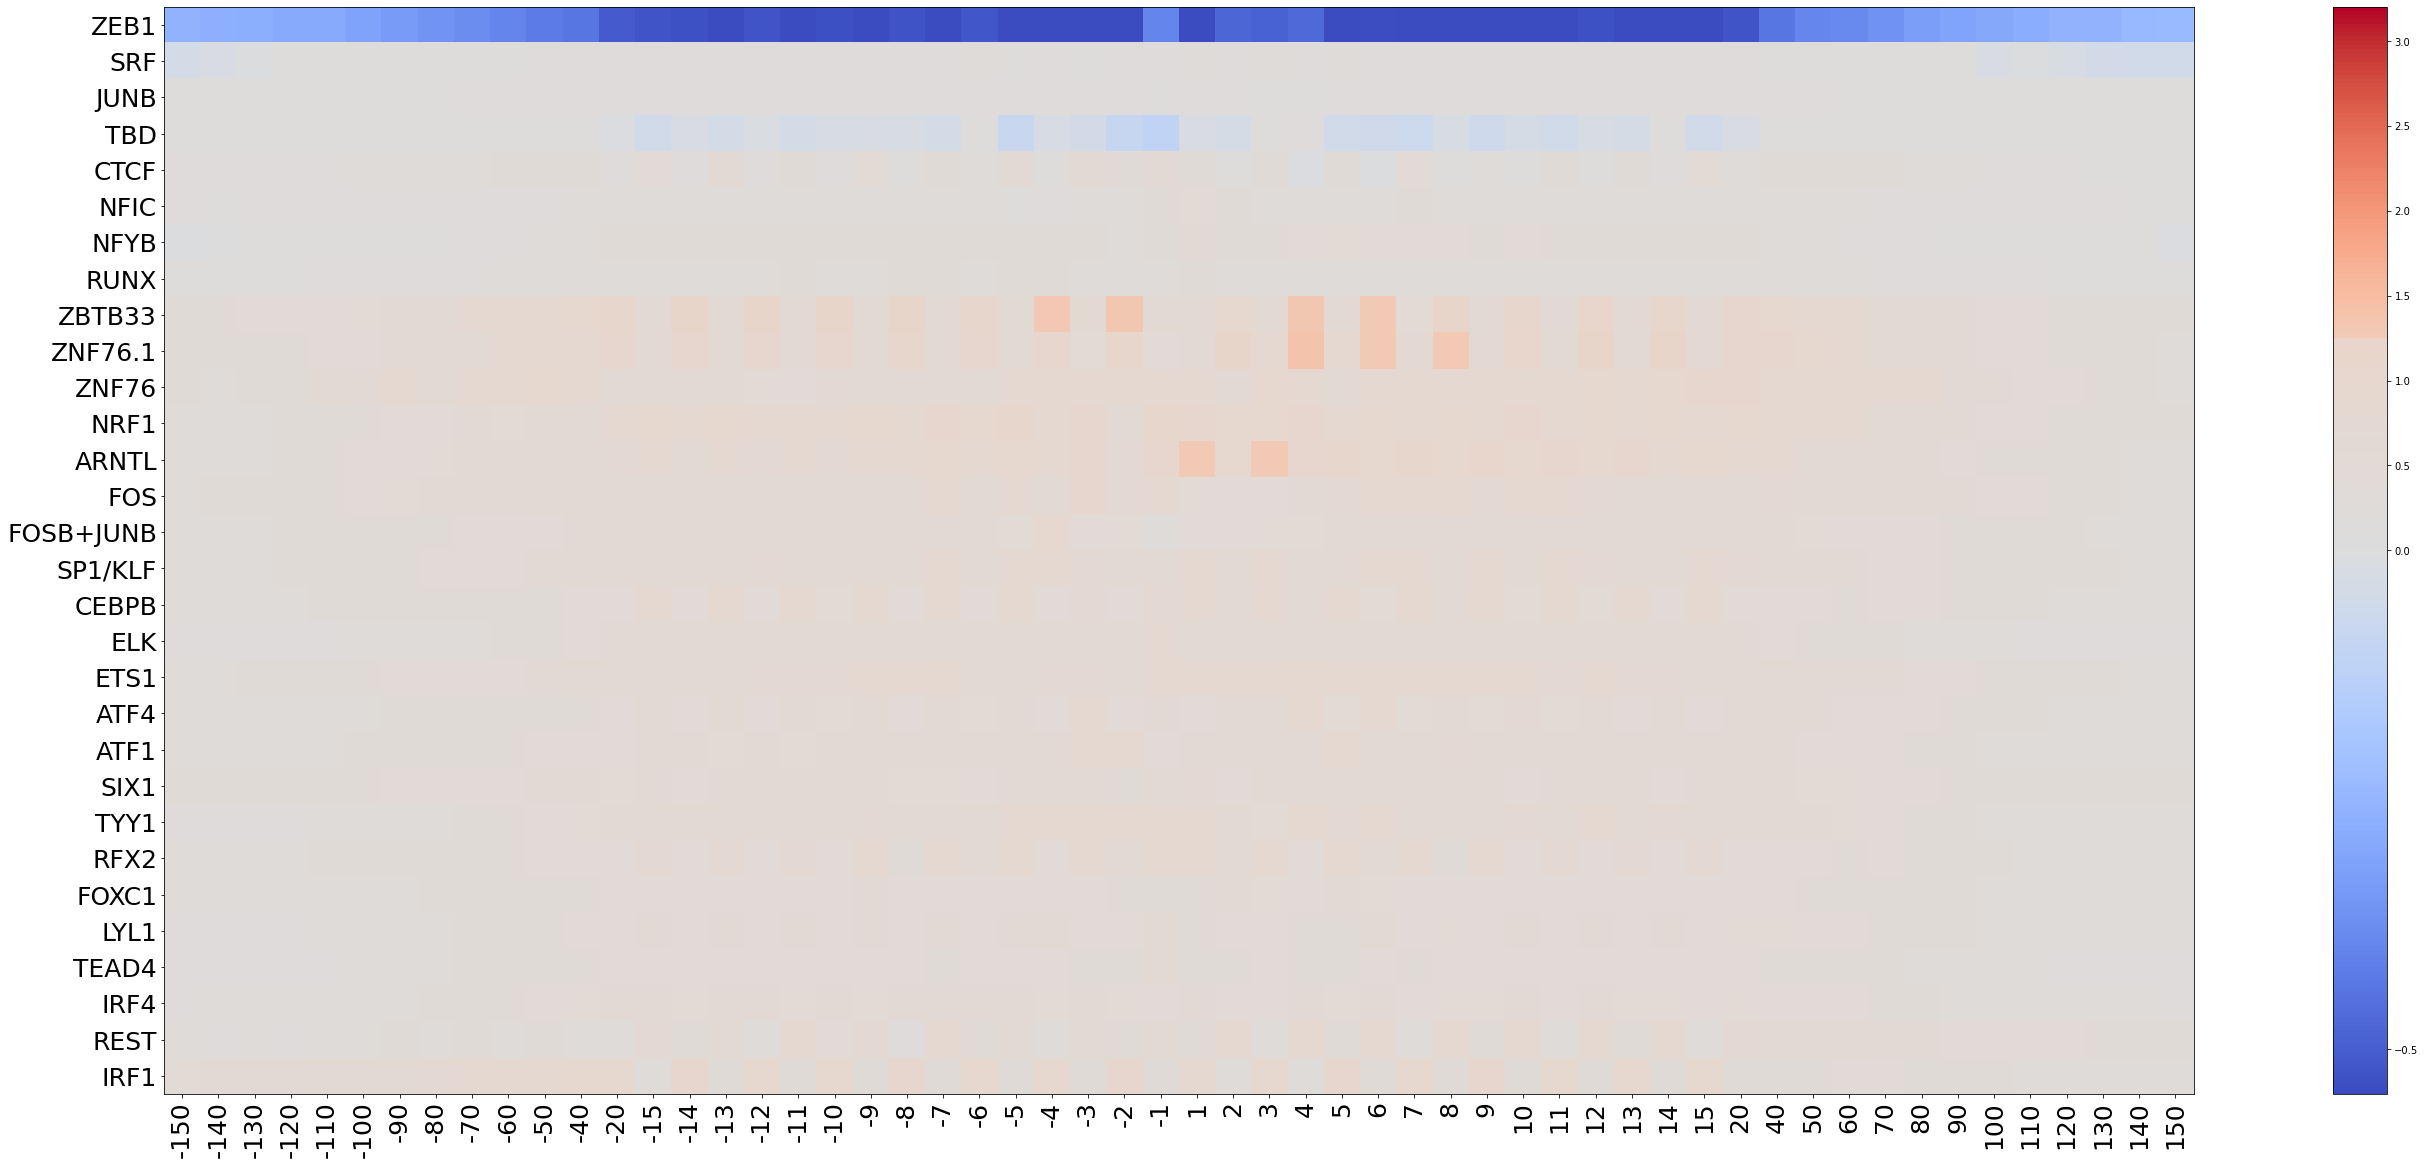

ZBTB33


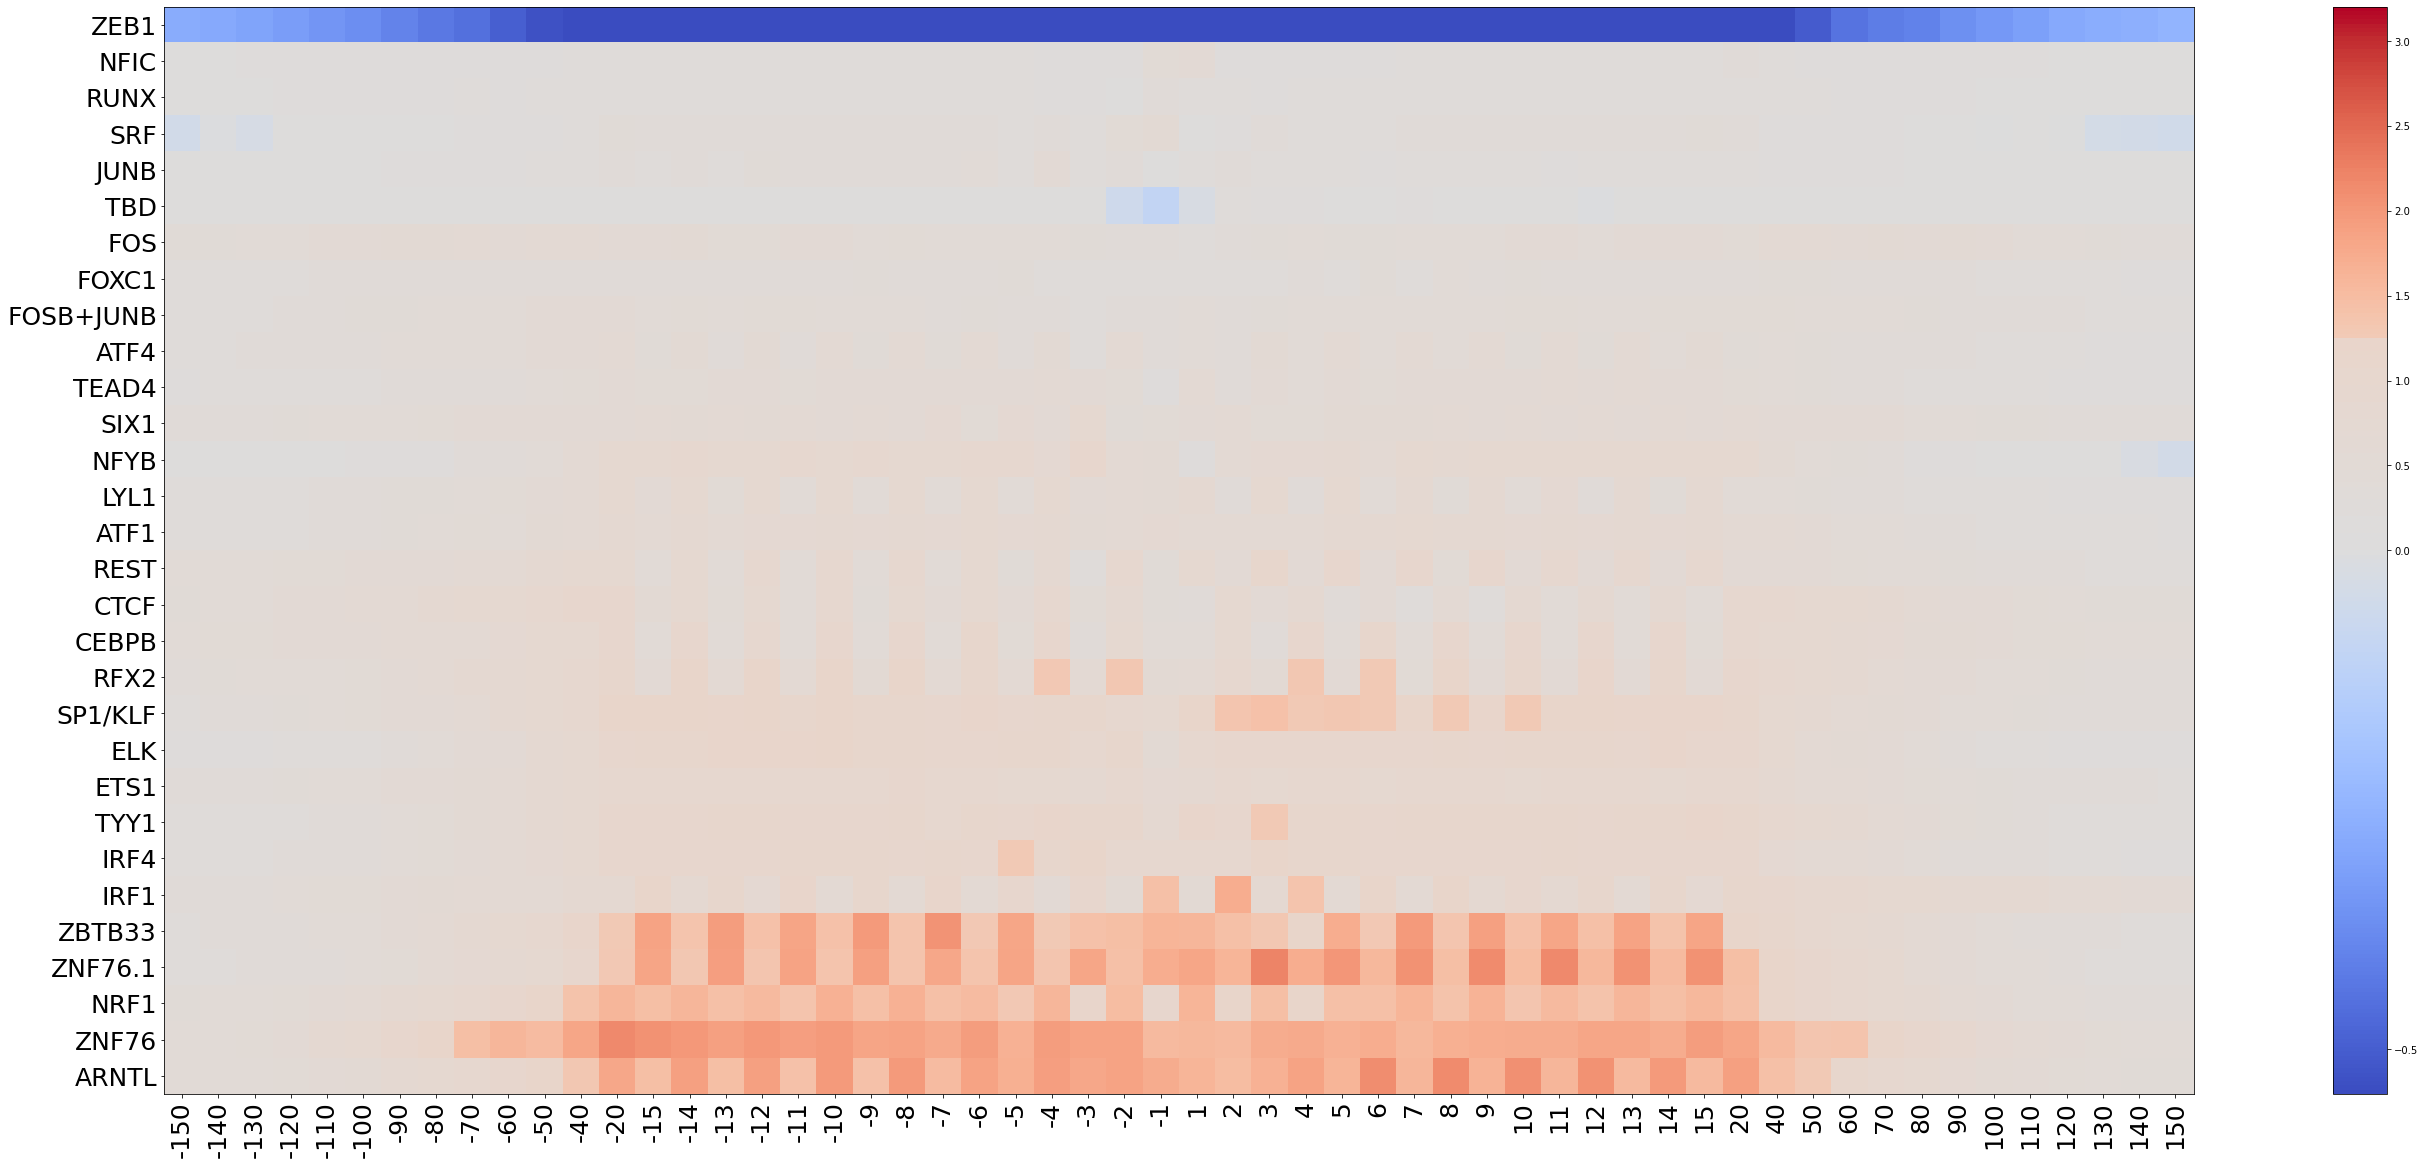

REST


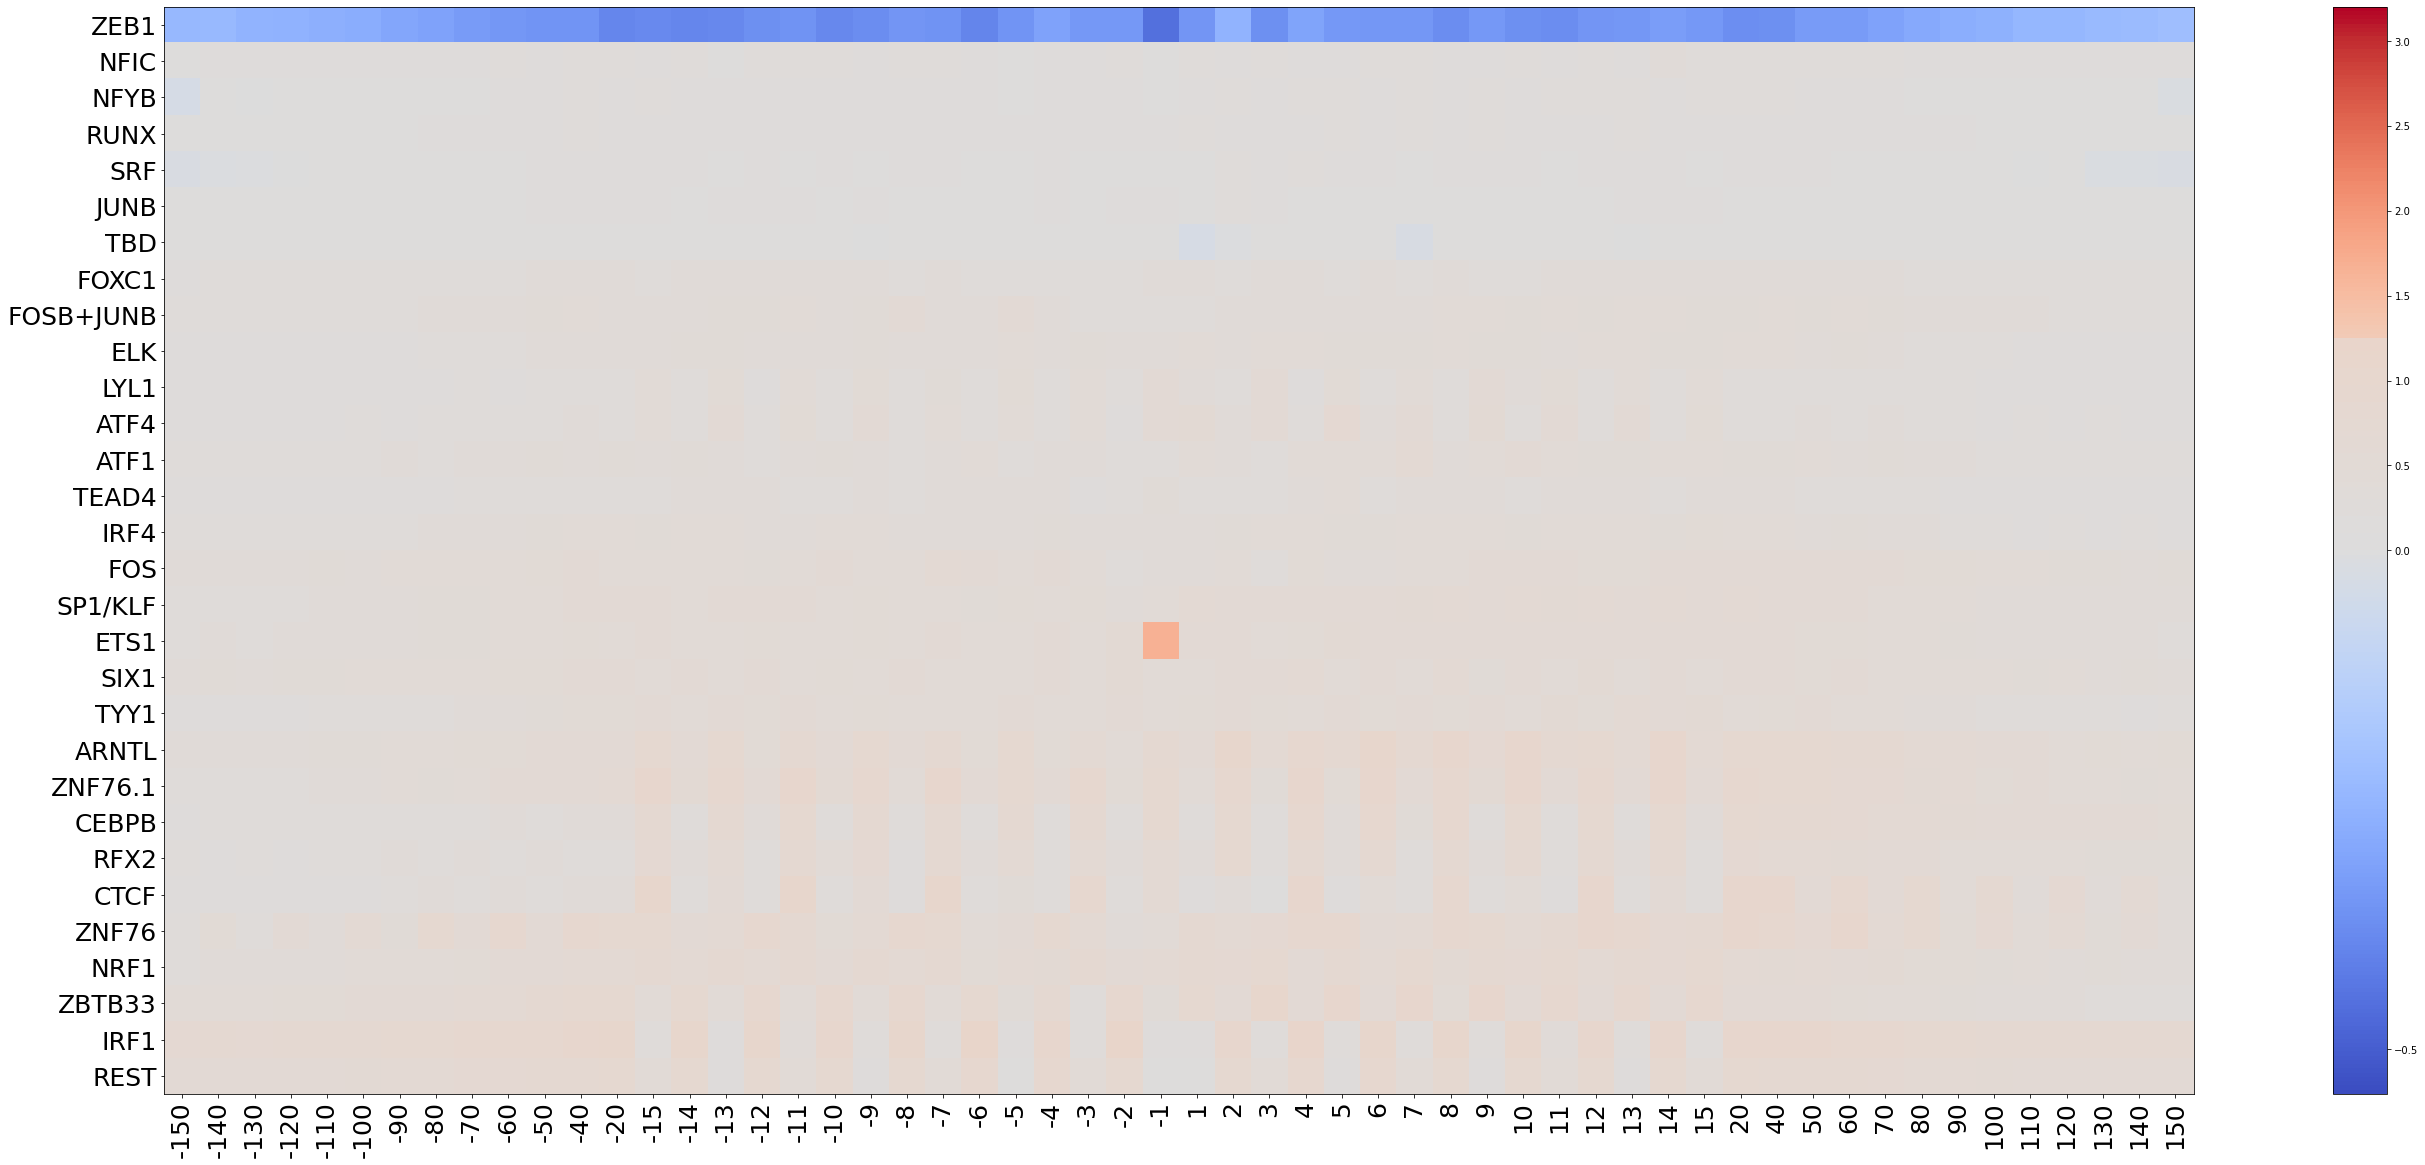

ZNF76.1


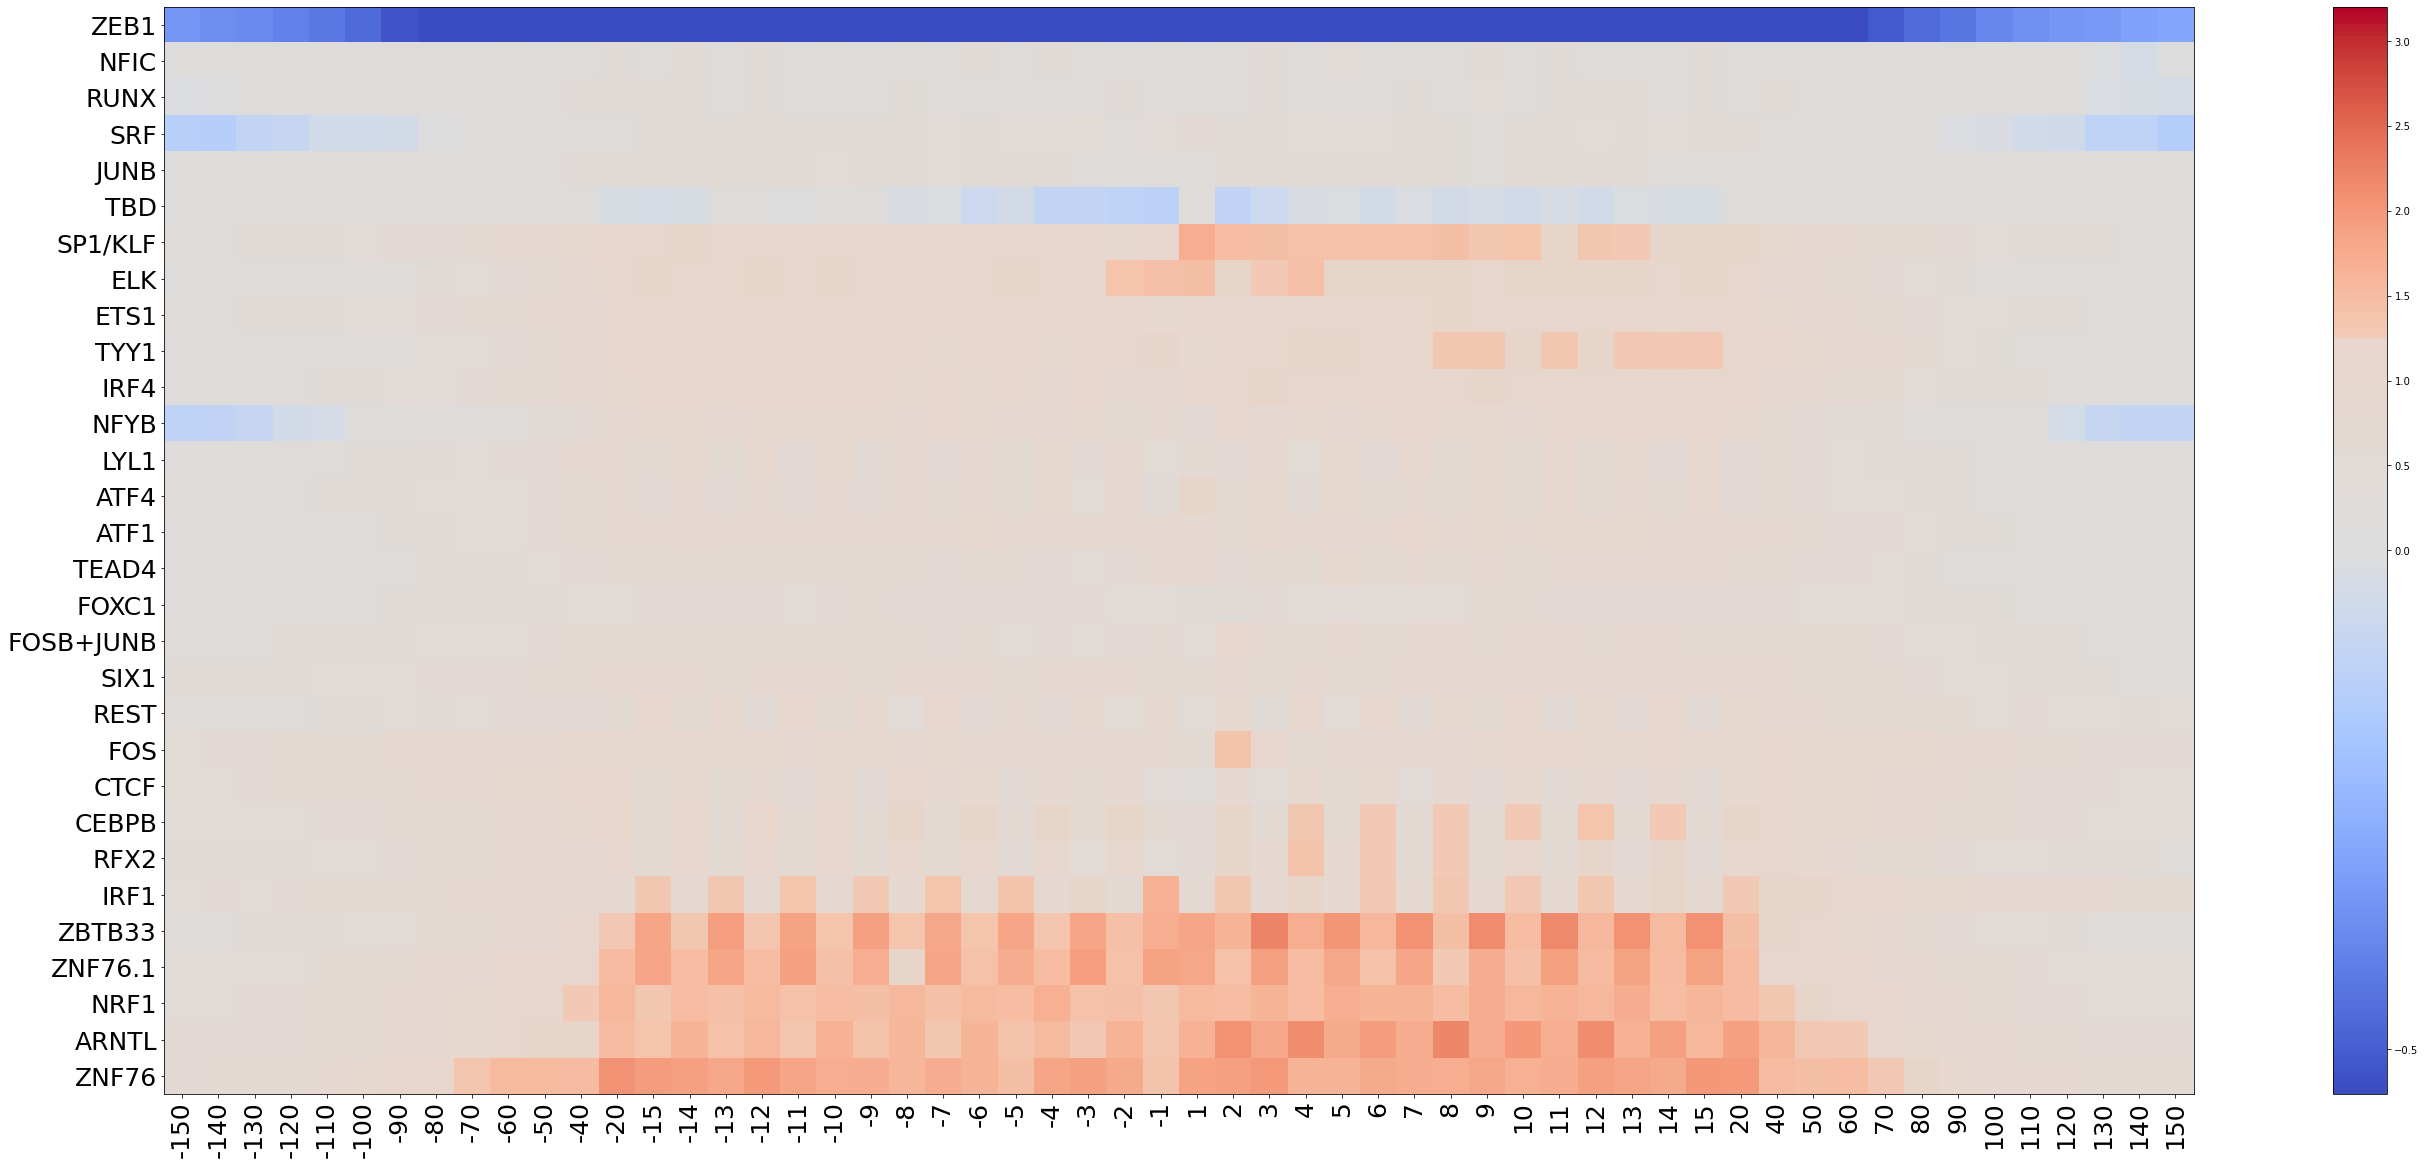

ZEB1


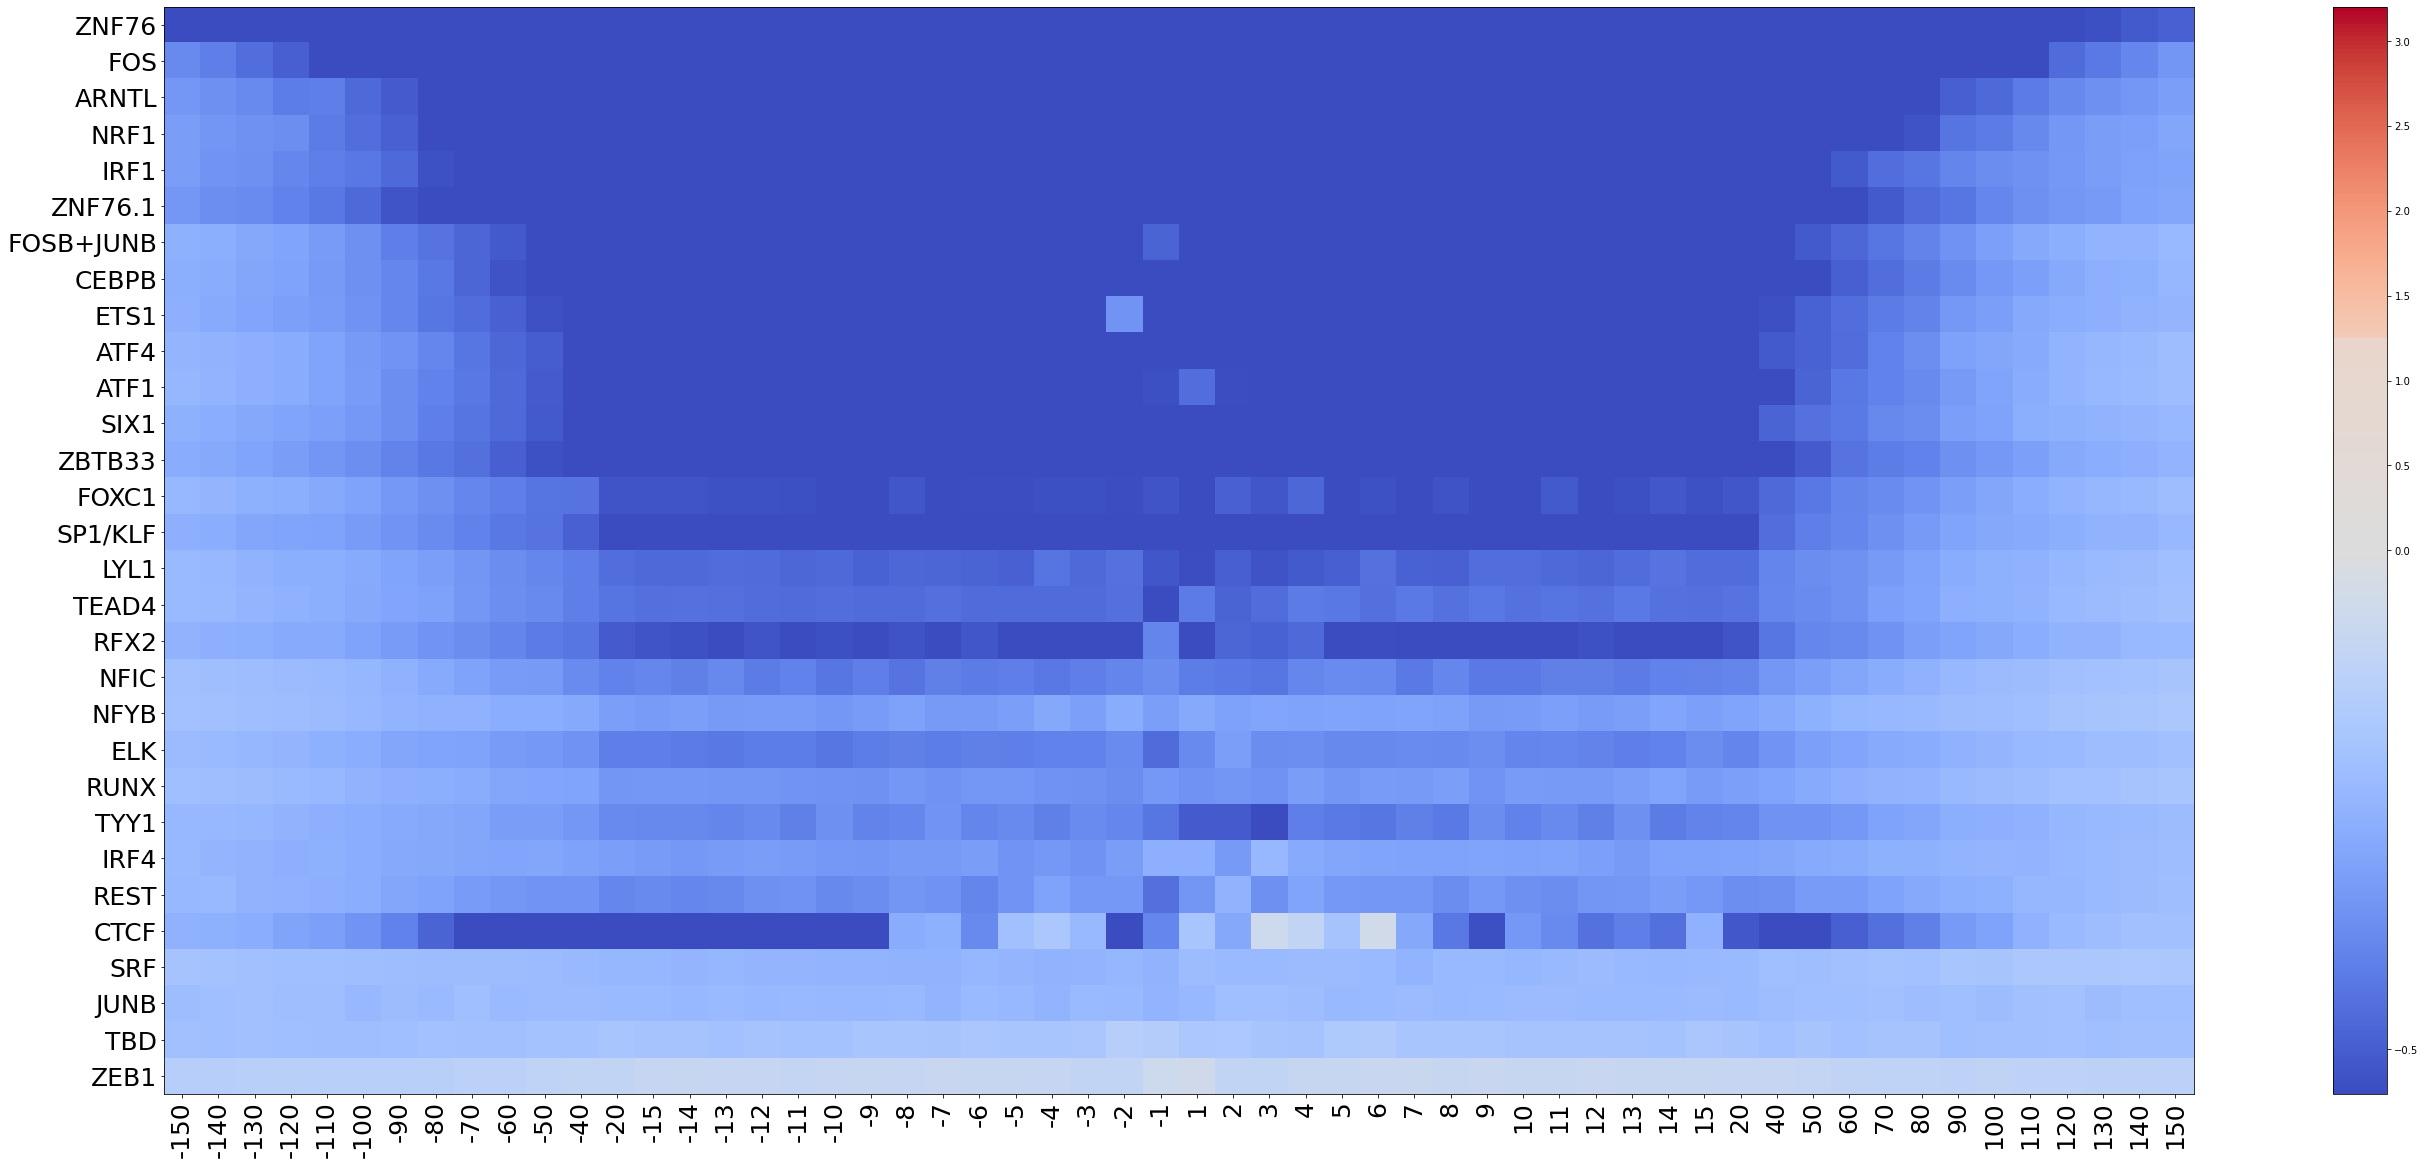

JUNB


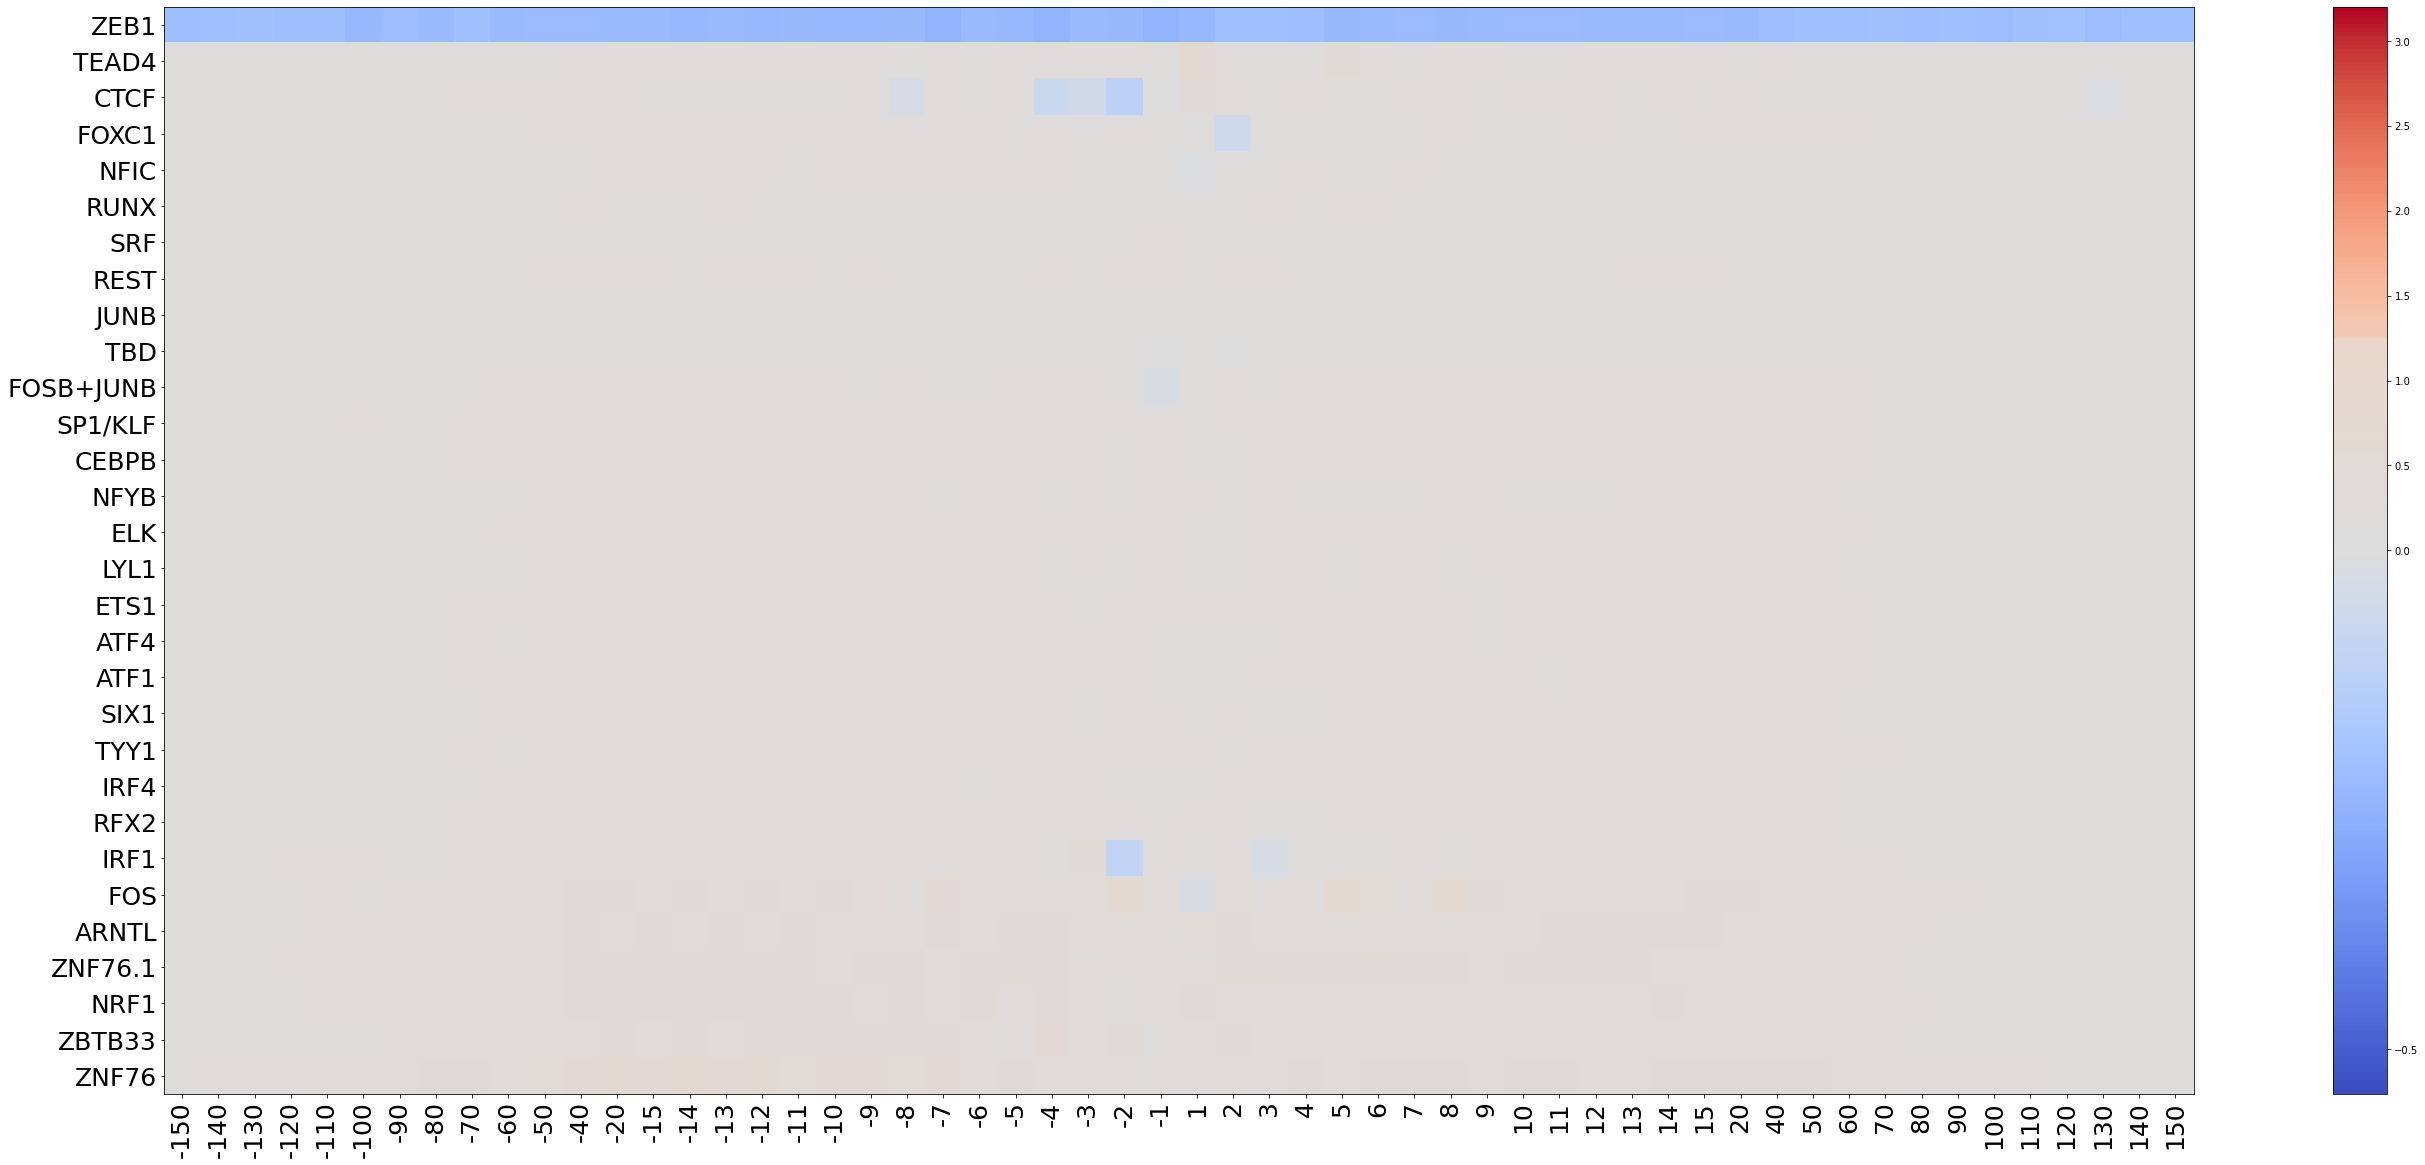

TBD


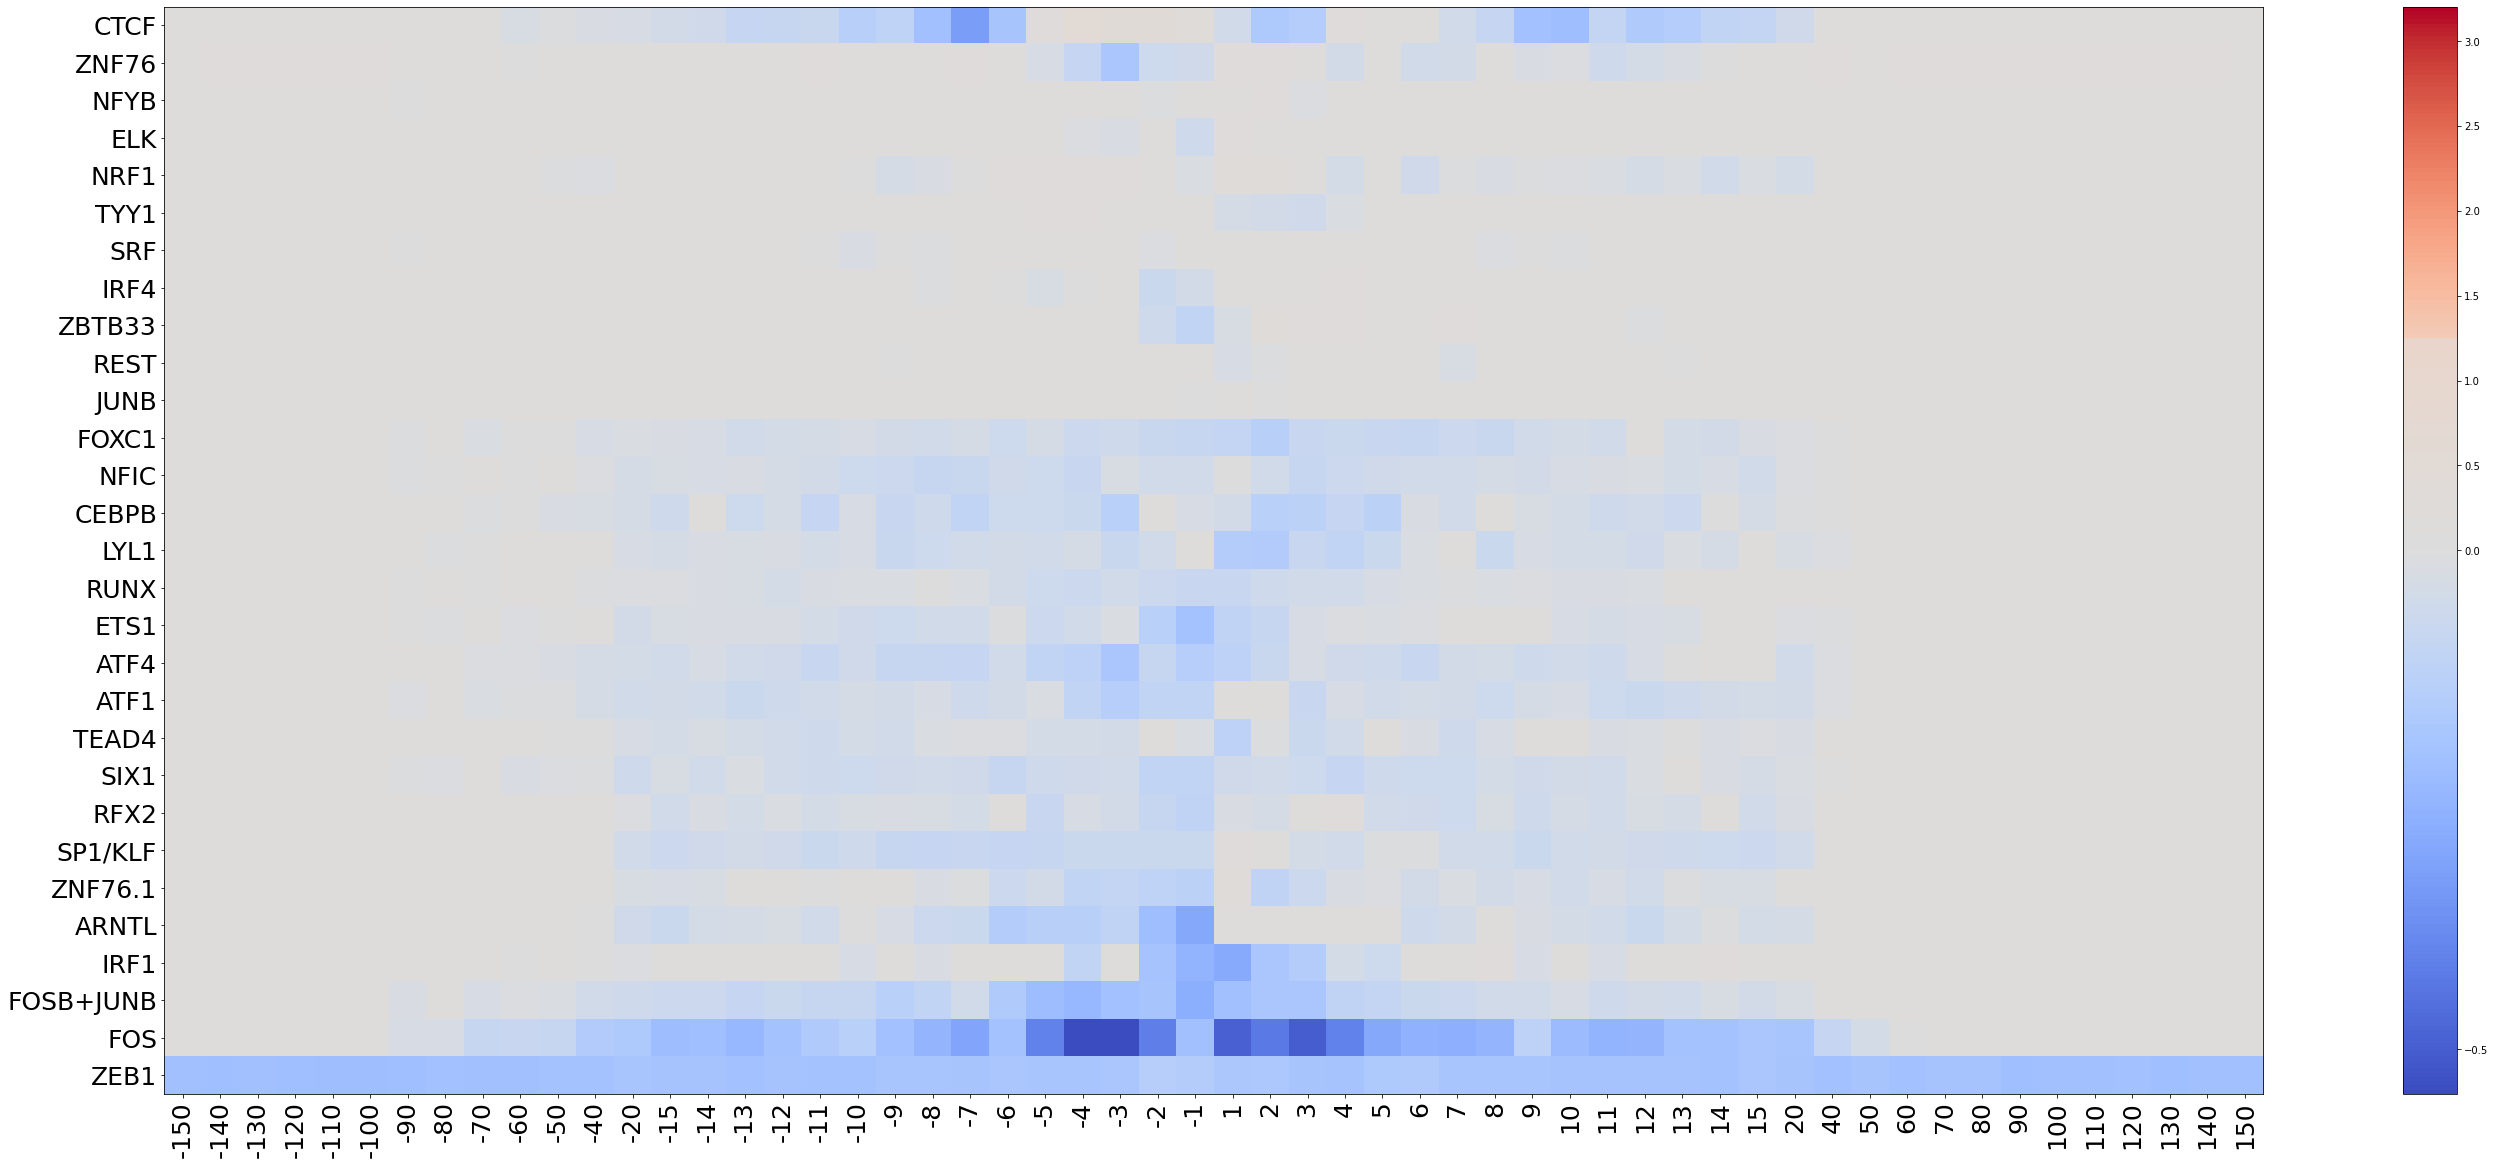

In [108]:
for key in zscores:
    fig, ax = plt.subplots(figsize=(50, 20))
    inds = cluster_matrix_indices(np.array(zscores[key])[:,:,0],10)
    print(key)
    hmap = ax.imshow(np.array(zscores[key])[inds,:,0], cmap=terrain_map, norm=norm)
    cbar = fig.colorbar(hmap, orientation="vertical")
    ax.set_xticks(np.arange(56))
    ax.set_xticklabels(distance, rotation=90, fontsize=25)
    ax.set_yticks(np.arange(len(rlables[key])))
    ax.set_yticklabels(np.array(rlables[key])[inds], fontsize=25)
    plt.show()
    
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(25)

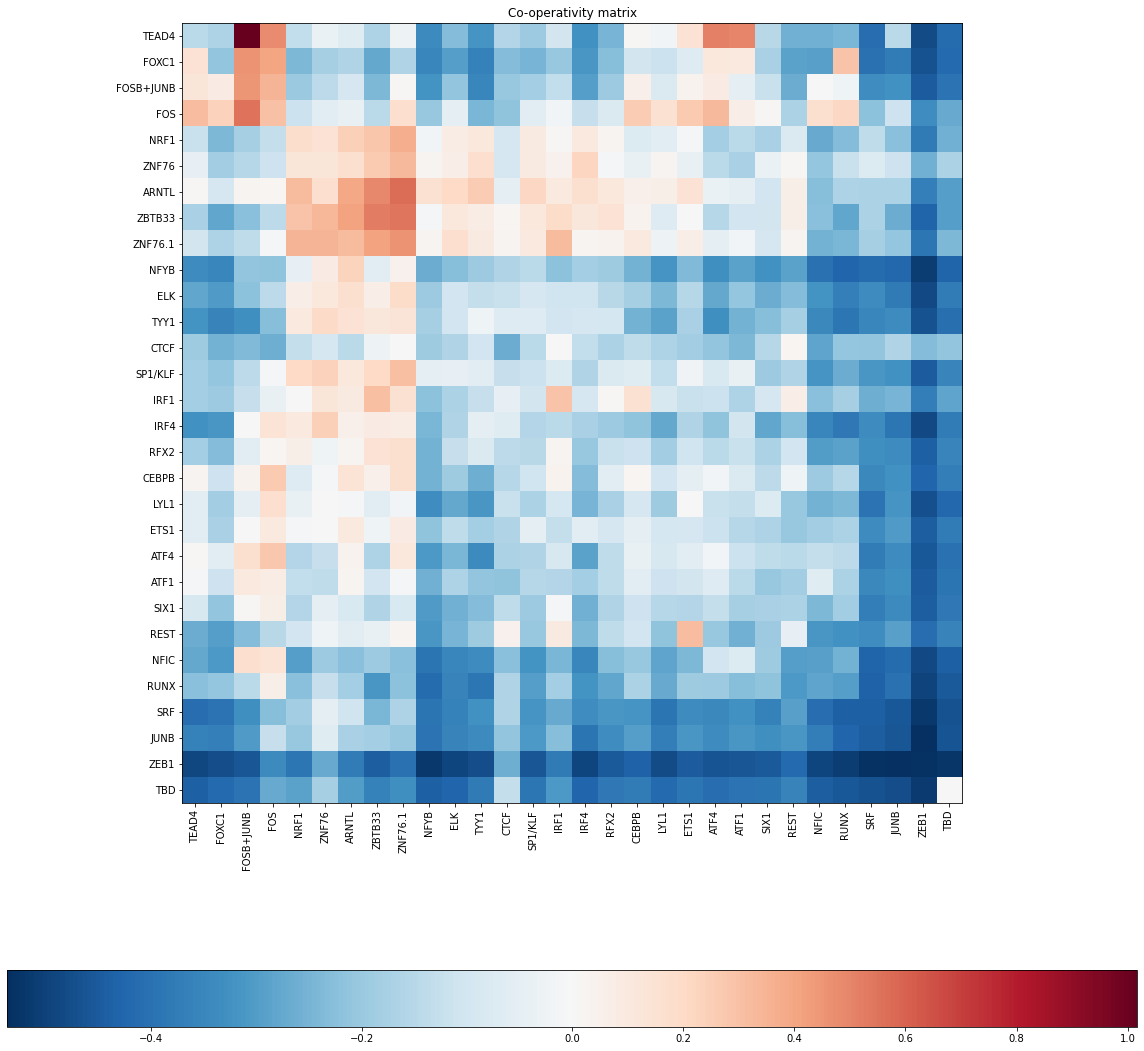

In [51]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(16, 16))

# define the colormap
#cmap = plt.get_cmap('PuOr')

# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


norm = TwoSlopeNorm(vmin=coop_matrix_n.min(), vcenter=0, vmax=coop_matrix_n.max())

inds = cluster_matrix_indices(coop_matrix_n,10)

# Plot the heatmap
# defining light source
#ls = mcolors.LightSource()

hmap = ax.imshow(coop_matrix_n[inds][:,inds], norm=norm, cmap="RdBu_r")
#hmap = ax.imshow(coop_matrix)


# plotting
#hmap = plt.imshow(ls.blend_hsv(z_data_rgb, coop_matrix[inds][:, inds]))


# Set axes on heatmap
ax.set_yticks(np.arange(len(row_names)))
ax.set_yticklabels(np.array(row_names)[inds])
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(np.array(row_names)[inds], rotation=90)

#Loop over data dimensions and create text annotations.
#for i in range(len(row_names)):
#    for j in range(len(row_names)):
#        if np.round(coop_matrix_n[inds][i, j],2) !=0 :
#            ax.text(j, i, np.round(coop_matrix_n[inds][i, j],2), ha="center", va="center")
fig.colorbar(hmap, orientation="horizontal")

ax.set_title("Co-operativity matrix")
fig.tight_layout()

plt.savefig("subfigs/motif_cooperativiity_imr90_2.pdf", dpi=300, transparent=True)


In [87]:
print(coop_matrix_n.max())

1.0178497509763884


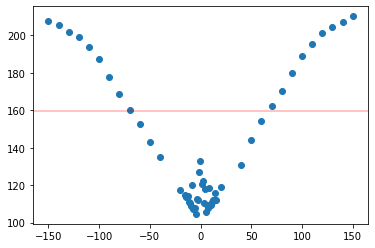

In [81]:
keyd="metacluster_0.pattern_0-metacluster_1.pattern_0"
plt.scatter(values2[keyd][0][3],values2[keyd][0][2])
#plt.axhline(values2[keyd][0]+values2[keyd][1], color="blue", alpha=0.3)
#plt.axhline(values2[keyd][0][0][0], color="green", alpha=0.3)
plt.axhline(np.abs(values2[keyd][0][0][0]-values2[keyd][0][1][0]), color="red", alpha=0.3)
plt.savefig("subfigs/zeb_fos_coord_effect_syntax.pdf", transparent=True, dpi=300)


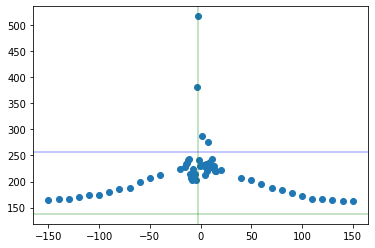

In [79]:
keyd="metacluster_0.pattern_4-metacluster_0.pattern_19"
plt.scatter(values2[keyd][0][3],values2[keyd][0][2])
plt.axhline(values2[keyd][0][0][0]+values2[keyd][0][1][0], color="blue", alpha=0.3)
plt.axhline(values2[keyd][0][0][0], color="green", alpha=0.3)
plt.axvline(-3, color="green", alpha=0.3)

#plt.axhline(np.abs(values2[keyd][0][0][0]-values2[keyd][0][1][0]), color="red", alpha=0.3)


In [77]:
#values2.keys()